In [1]:
# load input data

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

train_df = pd.read_csv("input/train.csv")

X_test = pd.read_csv("input/test.csv")

In [2]:
train_df.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

In [3]:
train_df.head()

id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8  ...     cont5     cont6  \
0   1    A    B    A    A    B    D    A    E    C  ...  0.881122  0.421650   
1   2    B    A    A    A    B    B    A    E    A  ...  0.440011  0.346230   
2   3    A    A    A    C    B    D    A    B    C  ...  0.914155  0.369602   
3   4    A    A    A    C    B    D    A    E    G  ...  0.934138  0.578930   
4   6    A    B    A    A    B    B    A    E    C  ...  0.382600  0.705940   

      cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
0  0.741413  0.895799  0.802461  0.724417  0.701915  0.877618  0.719903   
1  0.278495  0.593413  0.546056  0.613252  0.741289  0.326679  0.808464   
2  0.832564  0.865620  0.825251  0.264104  0.695561  0.869133  0.828352   
3  0.407313  0.868099  0.794402  0.494269  0.698125  0.809799  0.614766   
4  0.325193  0.440967  0.462146  0.724447  0.683073  0.343457  0.297743   

     target  
0  6.994023  
1  8.071256  
2  5.760456  
3  7.806457  
4  6.868974  

[5 rows x 26 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

# 1. Data Prepping

### Target value

Text(0.5, 1.0, 'Target - Histogram')

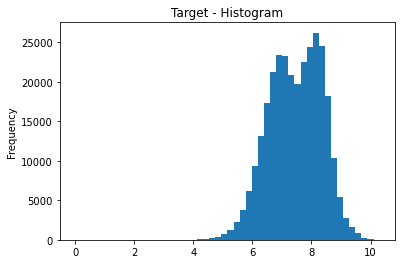

In [5]:
# histogram of target
train_df["target"].plot(kind='hist', bins=50)
plt.title('Target - Histogram')

Text(0.5, 1.0, 'Target - Boxplot')

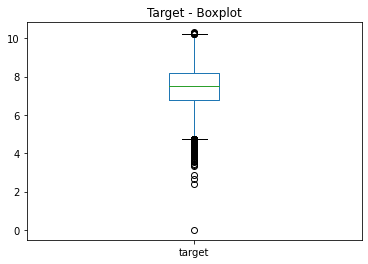

In [6]:
# boxplot of target => looking for outliers
train_df["target"].plot(kind='box')
plt.title('Target - Boxplot')

299116


Text(0.5, 1.0, 'Target - Boxplot')

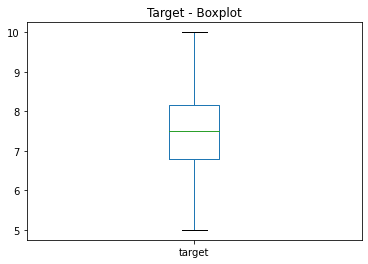

In [7]:
# remove outliers
train_df = train_df[(train_df["target"]>5)&(train_df["target"]<10)]
print(len(train_df))

# boxplot of target after outlier removed
train_df["target"].plot(kind='box')
plt.title('Target - Boxplot')

### Numerical Features

In [2]:
features_num = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
                'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
                'cont13']

In [9]:
'''# plot distribution of numerical features
for f in features_num:
    plt.figure(figsize=(8,4))
    train_df[f].plot(kind='hist', bins=100)
    plt.title(f)'''

"# plot distribution of numerical features\nfor f in features_num:\n    plt.figure(figsize=(8,4))\n    train_df[f].plot(kind='hist', bins=100)\n    plt.title(f)"

Text(0.5, 0.98, 'Histograms of Numerical Features')

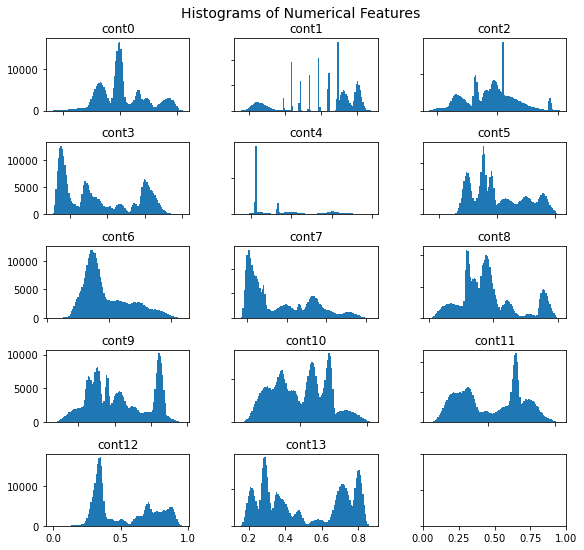

In [10]:
# Histogram for each numeric feature

fig, axs = plt.subplots(5, 3)
fig.set_size_inches(8, 8)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

axs[0, 0].hist(train_df[features_num[0]], bins=100)
axs[0, 0].set_title(f'{features_num[0]}')

axs[0, 1].hist(train_df[features_num[1]], bins=100)
axs[0, 1].set_title(f'{features_num[1]}')

axs[0, 2].hist(train_df[features_num[2]], bins=100)
axs[0, 2].set_title(f'{features_num[2]}')

axs[1, 0].hist(train_df[features_num[3]], bins=100)
axs[1, 0].set_title(f'{features_num[3]}')

axs[1, 1].hist(train_df[features_num[4]], bins=100)
axs[1, 1].set_title(f'{features_num[4]}')

axs[1, 2].hist(train_df[features_num[5]], bins=100)
axs[1, 2].set_title(f'{features_num[5]}')

axs[2, 0].hist(train_df[features_num[6]], bins=100)
axs[2, 0].set_title(f'{features_num[6]}')

axs[2, 1].hist(train_df[features_num[7]], bins=100)
axs[2, 1].set_title(f'{features_num[7]}')

axs[2, 2].hist(train_df[features_num[8]], bins=100)
axs[2, 2].set_title(f'{features_num[8]}')

axs[3, 0].hist(train_df[features_num[9]], bins=100)
axs[3, 0].set_title(f'{features_num[9]}')

axs[3, 1].hist(train_df[features_num[10]], bins=100)
axs[3, 1].set_title(f'{features_num[10]}')

axs[3, 2].hist(train_df[features_num[11]], bins=100)
axs[3, 2].set_title(f'{features_num[11]}')

axs[4, 0].hist(train_df[features_num[12]], bins=100)
axs[4, 0].set_title(f'{features_num[12]}')

axs[4, 1].hist(train_df[features_num[13]], bins=100)
axs[4, 1].set_title(f'{features_num[13]}')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.suptitle("Histograms of Numerical Features", size=14)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

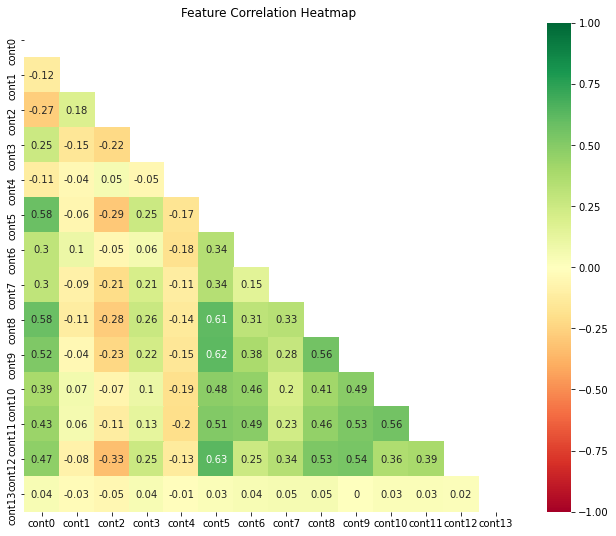

In [11]:
# Correlation Plot 

fig = plt.figure(figsize = (12,9))
matrix = np.triu(train_df[features_num].corr())
sns.heatmap(round(train_df[features_num].corr(),2), vmin=-1, vmax=1, center=0, square=True,
            annot=True, cmap='RdYlGn', mask=matrix)
plt.title('Feature Correlation Heatmap')

### Categorical Features

In [3]:
features_cat = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 
                'cat7', 'cat8', 'cat9']

Text(0.5, 0.98, 'Countplot Categorical Features')

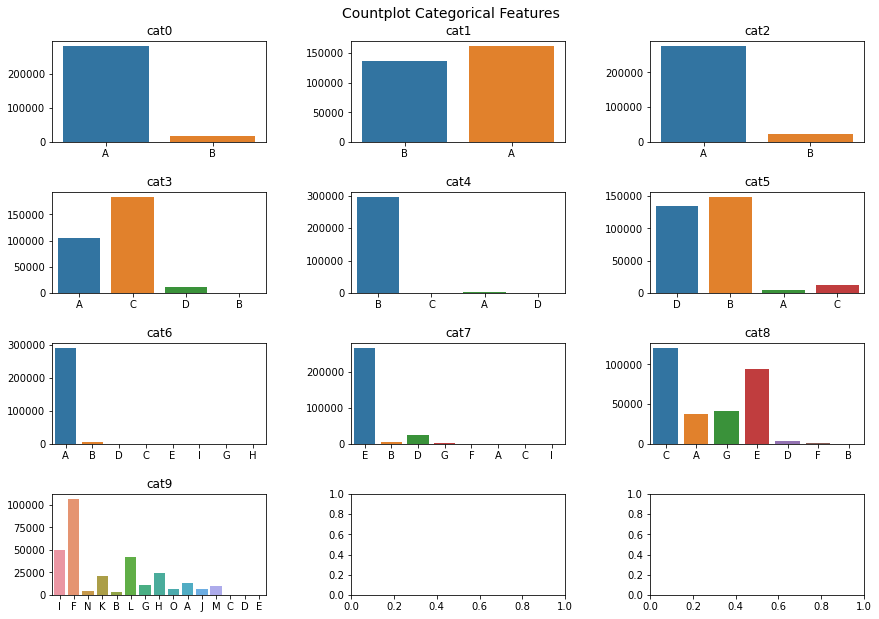

In [13]:
# Countplots for each Categorical Feature
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(12, 9)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(wspace=0.4, hspace=0.5)

sns.countplot(data=train_df, x=features_cat[0], ax=axs.flatten()[0])
axs.flatten()[0].title.set_text(features_cat[0])
axs.flatten()[0].set(xlabel=None)
axs.flatten()[0].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[1], ax=axs.flatten()[1])
axs.flatten()[1].title.set_text(features_cat[1])
axs.flatten()[1].set(xlabel=None)
axs.flatten()[1].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[2], ax=axs.flatten()[2])
axs.flatten()[2].title.set_text(features_cat[2])
axs.flatten()[2].set(xlabel=None)
axs.flatten()[2].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[3], ax=axs.flatten()[3])
axs.flatten()[3].title.set_text(features_cat[3])
axs.flatten()[3].set(xlabel=None)
axs.flatten()[3].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[4], ax=axs.flatten()[4])
axs.flatten()[4].title.set_text(features_cat[4])
axs.flatten()[4].set(xlabel=None)
axs.flatten()[4].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[5], ax=axs.flatten()[5])
axs.flatten()[5].title.set_text(features_cat[5])
axs.flatten()[5].set(xlabel=None)
axs.flatten()[5].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[6], ax=axs.flatten()[6])
axs.flatten()[6].title.set_text(features_cat[6])
axs.flatten()[6].set(xlabel=None)
axs.flatten()[6].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[7], ax=axs.flatten()[7])
axs.flatten()[7].title.set_text(features_cat[7])
axs.flatten()[7].set(xlabel=None)
axs.flatten()[7].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[8], ax=axs.flatten()[8])
axs.flatten()[8].title.set_text(features_cat[8])
axs.flatten()[8].set(xlabel=None)
axs.flatten()[8].set(ylabel=None)

sns.countplot(data=train_df, x=features_cat[9], ax=axs.flatten()[9])
axs.flatten()[9].title.set_text(features_cat[9])
axs.flatten()[9].set(xlabel=None)
axs.flatten()[9].set(ylabel=None)


plt.suptitle("Countplot Categorical Features", size=14)

### Relationship between Features and Target

[Text(0.5, 59.99999999999993, '')]

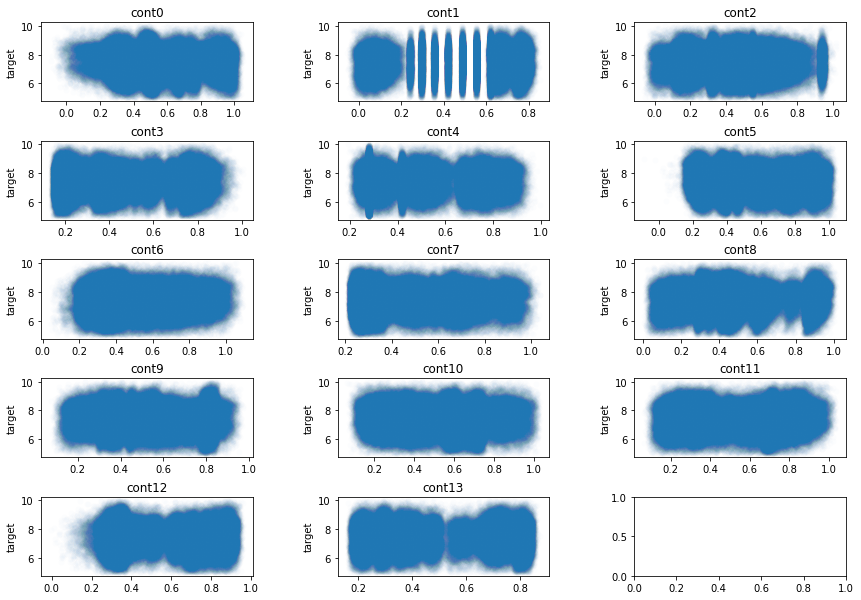

In [14]:
# Scatter Plot for Target and Numeric Feature
fig, axs = plt.subplots(5, 3)
fig.set_size_inches(12, 9)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(wspace=0.4, hspace=0.5)

sns.scatterplot(data=train_df, x=features_num[0], y="target", ax=axs.flatten()[0], alpha=0.01)
axs.flatten()[0].title.set_text(features_num[0])
axs.flatten()[0].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[1], y="target", ax=axs.flatten()[1], alpha=0.01)
axs.flatten()[1].title.set_text(features_num[1])
axs.flatten()[1].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[2], y="target", ax=axs.flatten()[2], alpha=0.01)
axs.flatten()[2].title.set_text(features_num[2])
axs.flatten()[2].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[3], y="target", ax=axs.flatten()[3], alpha=0.01)
axs.flatten()[3].title.set_text(features_num[3])
axs.flatten()[3].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[4], y="target", ax=axs.flatten()[4], alpha=0.01)
axs.flatten()[4].title.set_text(features_num[4])
axs.flatten()[4].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[5], y="target", ax=axs.flatten()[5], alpha=0.01)
axs.flatten()[5].title.set_text(features_num[5])
axs.flatten()[5].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[6], y="target", ax=axs.flatten()[6], alpha=0.01)
axs.flatten()[6].title.set_text(features_num[6])
axs.flatten()[6].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[7], y="target", ax=axs.flatten()[7], alpha=0.01)
axs.flatten()[7].title.set_text(features_num[7])
axs.flatten()[7].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[8], y="target", ax=axs.flatten()[8], alpha=0.01)
axs.flatten()[8].title.set_text(features_num[8])
axs.flatten()[8].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[9], y="target", ax=axs.flatten()[9], alpha=0.01)
axs.flatten()[9].title.set_text(features_num[9])
axs.flatten()[9].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[10], y="target", ax=axs.flatten()[10], alpha=0.01)
axs.flatten()[10].title.set_text(features_num[10])
axs.flatten()[10].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[11], y="target", ax=axs.flatten()[11], alpha=0.01)
axs.flatten()[11].title.set_text(features_num[11])
axs.flatten()[11].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[12], y="target", ax=axs.flatten()[12], alpha=0.01)
axs.flatten()[12].title.set_text(features_num[12])
axs.flatten()[12].set(xlabel=None)

sns.scatterplot(data=train_df, x=features_num[13], y="target", ax=axs.flatten()[13], alpha=0.01)
axs.flatten()[13].title.set_text(features_num[13])
axs.flatten()[13].set(xlabel=None)

# 2. Model Building

In [21]:
X = train_df.drop(columns=["target","id"])
X.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

In [22]:
y = train_df[["target"]]
y.columns

Index(['target'], dtype='object')

In [23]:
X_submit = pd.read_csv("input/test.csv").drop(columns=["id"])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [25]:
len(X_train)

239292

In [26]:
len(X_test)

59824

In [27]:
len(y_train)

239292

In [28]:
len(y_test)

59824

In [29]:
len(X_submit)

200000

### 1. Random Forest (Simple)

In [210]:
# Pipeline
# Standardize numeric values and one-hot encode categorical values
# the Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

# Random Forest Regressor
rnd_reg = RandomForestRegressor(n_estimators=400,verbose=True, n_jobs=-1)

# Full Prediction Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', rnd_reg)])

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit model
model.fit(X_train, np.array(y_train).ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  9.1min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6', 'c

In [211]:
# Predict
y_train_pred = model.predict(X_train)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred, squared=False),4)))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    8.7s


explained_variance_score: 0.873
r2_score: 0.873
mean_absolute_error: 0.2611
root_mean_squared_error: 0.3121


[Parallel(n_jobs=12)]: Done 400 out of 400 | elapsed:   19.1s finished


In [212]:
# predict
y_test = model.predict(X_test)
y_test

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    5.1s
[Parallel(n_jobs=12)]: Done 400 out of 400 | elapsed:   12.3s finished


array([7.41972887, 7.99575107, 7.46536824, ..., 7.37213012, 7.61257345,
       7.4806215 ])

In [214]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_test
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/random_forest_simple_{name_add}.csv", index=False)

### 2. Random Forest (Tuned)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

# Grid Search Parameters
param_grid =  {'n_estimators': [200,400,600,1000,1500], 
               'max_depth': [3,5,10,50,100,None],
               'min_samples_leaf': [1,2,4,6,10],
               'min_samples_split': [2,5,10,20]}

# Full Pipeline
rnd_reg = make_pipeline(preprocessor, 
                        RandomizedSearchCV(RandomForestRegressor(bootstrap=True, max_samples=0.01),
                                           n_iter=100,
                                           param_distributions=param_grid, cv=3, refit=True, 
                                           n_jobs=-1, verbose=10)
                       )

rnd_reg.fit(X_train, np.array(y_train).ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  4.7min
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 121

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6

In [49]:
rnd_reg["randomizedsearchcv"].best_params_

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': None}

In [50]:
# Predict
y_train_pred = rnd_reg.predict(X_train)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred, squared=False),4)))

explained_variance_score: 0.0837
r2_score: 0.0837
mean_absolute_error: 0.7049
root_mean_squared_error: 0.8382


In [54]:
# use optimized parameter and fully train model again


'''# Hyperparameters
params = {'n_estimators': [200,400,600,1000,1500],
          'max_depth': [3,5,10,50,100,None],
          'min_samples_leaf': [1,2,4,6,10],
          'min_samples_split': [2,5,10,20],
          ''
         
         }'''

# Full Pipeline
rnd_reg = make_pipeline(preprocessor, 
                        RandomForestRegressor(n_estimators=1500,
                                              min_samples_split=2,
                                              min_samples_leaf=4,
                                              max_depth=None,
                                              verbose=10)
                       )

rnd_reg.fit(X_train, np.array(y_train).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


building tree 2 of 1500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.1s remaining:    0.0s


building tree 3 of 1500


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.4s remaining:    0.0s


building tree 4 of 1500


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   28.6s remaining:    0.0s


building tree 5 of 1500


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   35.7s remaining:    0.0s


building tree 6 of 1500


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   42.9s remaining:    0.0s


building tree 7 of 1500


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   50.2s remaining:    0.0s


building tree 8 of 1500


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   57.5s remaining:    0.0s


building tree 9 of 1500


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


building tree 10 of 1500
building tree 11 of 1500
building tree 12 of 1500
building tree 13 of 1500
building tree 14 of 1500
building tree 15 of 1500
building tree 16 of 1500
building tree 17 of 1500
building tree 18 of 1500
building tree 19 of 1500
building tree 20 of 1500
building tree 21 of 1500
building tree 22 of 1500
building tree 23 of 1500
building tree 24 of 1500
building tree 25 of 1500
building tree 26 of 1500
building tree 27 of 1500
building tree 28 of 1500
building tree 29 of 1500
building tree 30 of 1500
building tree 31 of 1500
building tree 32 of 1500
building tree 33 of 1500
building tree 34 of 1500
building tree 35 of 1500
building tree 36 of 1500
building tree 37 of 1500
building tree 38 of 1500
building tree 39 of 1500
building tree 40 of 1500
building tree 41 of 1500
building tree 42 of 1500
building tree 43 of 1500
building tree 44 of 1500
building tree 45 of 1500
building tree 46 of 1500
building tree 47 of 1500
building tree 48 of 1500
building tree 49 of 1500


building tree 329 of 1500
building tree 330 of 1500
building tree 331 of 1500
building tree 332 of 1500
building tree 333 of 1500
building tree 334 of 1500
building tree 335 of 1500
building tree 336 of 1500
building tree 337 of 1500
building tree 338 of 1500
building tree 339 of 1500
building tree 340 of 1500
building tree 341 of 1500
building tree 342 of 1500
building tree 343 of 1500
building tree 344 of 1500
building tree 345 of 1500
building tree 346 of 1500
building tree 347 of 1500
building tree 348 of 1500
building tree 349 of 1500
building tree 350 of 1500
building tree 351 of 1500
building tree 352 of 1500
building tree 353 of 1500
building tree 354 of 1500
building tree 355 of 1500
building tree 356 of 1500
building tree 357 of 1500
building tree 358 of 1500
building tree 359 of 1500
building tree 360 of 1500
building tree 361 of 1500
building tree 362 of 1500
building tree 363 of 1500
building tree 364 of 1500
building tree 365 of 1500
building tree 366 of 1500
building tre

building tree 645 of 1500
building tree 646 of 1500
building tree 647 of 1500
building tree 648 of 1500
building tree 649 of 1500
building tree 650 of 1500
building tree 651 of 1500
building tree 652 of 1500
building tree 653 of 1500
building tree 654 of 1500
building tree 655 of 1500
building tree 656 of 1500
building tree 657 of 1500
building tree 658 of 1500
building tree 659 of 1500
building tree 660 of 1500
building tree 661 of 1500
building tree 662 of 1500
building tree 663 of 1500
building tree 664 of 1500
building tree 665 of 1500
building tree 666 of 1500
building tree 667 of 1500
building tree 668 of 1500
building tree 669 of 1500
building tree 670 of 1500
building tree 671 of 1500
building tree 672 of 1500
building tree 673 of 1500
building tree 674 of 1500
building tree 675 of 1500
building tree 676 of 1500
building tree 677 of 1500
building tree 678 of 1500
building tree 679 of 1500
building tree 680 of 1500
building tree 681 of 1500
building tree 682 of 1500
building tre

building tree 961 of 1500
building tree 962 of 1500
building tree 963 of 1500
building tree 964 of 1500
building tree 965 of 1500
building tree 966 of 1500
building tree 967 of 1500
building tree 968 of 1500
building tree 969 of 1500
building tree 970 of 1500
building tree 971 of 1500
building tree 972 of 1500
building tree 973 of 1500
building tree 974 of 1500
building tree 975 of 1500
building tree 976 of 1500
building tree 977 of 1500
building tree 978 of 1500
building tree 979 of 1500
building tree 980 of 1500
building tree 981 of 1500
building tree 982 of 1500
building tree 983 of 1500
building tree 984 of 1500
building tree 985 of 1500
building tree 986 of 1500
building tree 987 of 1500
building tree 988 of 1500
building tree 989 of 1500
building tree 990 of 1500
building tree 991 of 1500
building tree 992 of 1500
building tree 993 of 1500
building tree 994 of 1500
building tree 995 of 1500
building tree 996 of 1500
building tree 997 of 1500
building tree 998 of 1500
building tre

building tree 1266 of 1500
building tree 1267 of 1500
building tree 1268 of 1500
building tree 1269 of 1500
building tree 1270 of 1500
building tree 1271 of 1500
building tree 1272 of 1500
building tree 1273 of 1500
building tree 1274 of 1500
building tree 1275 of 1500
building tree 1276 of 1500
building tree 1277 of 1500
building tree 1278 of 1500
building tree 1279 of 1500
building tree 1280 of 1500
building tree 1281 of 1500
building tree 1282 of 1500
building tree 1283 of 1500
building tree 1284 of 1500
building tree 1285 of 1500
building tree 1286 of 1500
building tree 1287 of 1500
building tree 1288 of 1500
building tree 1289 of 1500
building tree 1290 of 1500
building tree 1291 of 1500
building tree 1292 of 1500
building tree 1293 of 1500
building tree 1294 of 1500
building tree 1295 of 1500
building tree 1296 of 1500
building tree 1297 of 1500
building tree 1298 of 1500
building tree 1299 of 1500
building tree 1300 of 1500
building tree 1301 of 1500
building tree 1302 of 1500
b

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 181.6min finished


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6

In [55]:
# Predict
y_train_pred = rnd_reg.predict(X_train)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred, squared=False),4)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s


explained_variance_score: 0.7273
r2_score: 0.7273
mean_absolute_error: 0.3749
root_mean_squared_error: 0.4573


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  2.1min finished


In [56]:
# predict
y_test = rnd_reg.predict(X_test)
y_test

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.3min finished


array([7.52814464, 7.88982929, 7.56139966, ..., 7.4192657 , 7.6113732 ,
       7.61071846])

In [57]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_test
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/random_forest_tuned_{name_add}.csv", index=False)

### 3. Extremly Randomized Decision Trees

In [41]:
# Pipeline
# Standardize numeric values and one-hot encode categorical values
# the Random Forest Regressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

# Random Forest Regressor
extra_rnd_reg = ExtraTreesRegressor()

# Grid Search Parameters
param_grid =  {'n_estimators': [200,400,600,1000], 
               'max_features': [2,5,10,15,20,None],
               'max_depth': [5,10,50,100,None],
               'min_samples_leaf': [0.01,0.05,0.1,None],
               'min_samples_split': [2,5,10,20]}

# Full Pipeline
model = make_pipeline(preprocessor, 
                        RandomizedSearchCV(extra_rnd_reg,
                                           n_iter=100,
                                           param_distributions=param_grid, cv=3, refit=True, 
                                           n_jobs=-1, verbose=10)
                       )

# Fit model
%time model.fit(X_train, np.array(y_train).ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 54.8min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 64.5min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 78.4min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 109.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 126.7min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:

CPU times: user 16min 46s, sys: 2.2 s, total: 16min 49s
Wall time: 3h 49min 32s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6

In [63]:
model["randomizedsearchcv"].best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 0.01,
 'max_features': None,
 'max_depth': 50}

In [58]:
# Score on Training Data
model.score(X_train, y_train)

0.046206797253744325

In [59]:
# Predict on Test Data
y_test_pred = model.predict(X_test)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_test, y_test_pred),4)))
print("r2_score: " + str(round(r2_score(y_test, y_test_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_test, y_test_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_test, y_test_pred, squared=False),4)))

explained_variance_score: 0.0428
r2_score: 0.0427
mean_absolute_error: 0.7163
root_mean_squared_error: 0.8553


In [60]:
# predict for submission
y_test_submit = model.predict(X_submit)
y_test_submit

array([7.55082493, 7.72041938, 7.65008282, ..., 7.44846948, 7.55988436,
       7.41965781])

In [61]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_test_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/extra_random_{name_add}.csv", index=False)

### 4. XGBoost

In [77]:
# preprocess before XGBoost

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

X_pre = preprocessor.fit_transform(X)

In [78]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.3, shuffle=True, random_state=0)

In [79]:
import xgboost as xgb

# convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [82]:
# baseline model

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'eval_metric':'rmse',
    # Other parameters
    'objective':'reg:squarederror',
}

num_boost_round = 300

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:4.94578
[1]	Test-rmse:3.51384
[2]	Test-rmse:2.53265
[3]	Test-rmse:1.87275
[4]	Test-rmse:1.44325
[5]	Test-rmse:1.17698
[6]	Test-rmse:1.02123
[7]	Test-rmse:0.93561
[8]	Test-rmse:0.89040
[9]	Test-rmse:0.86724
[10]	Test-rmse:0.85562
[11]	Test-rmse:0.84952
[12]	Test-rmse:0.84633
[13]	Test-rmse:0.84460
[14]	Test-rmse:0.84344
[15]	Test-rmse:0.84284
[16]	Test-rmse:0.84232
[17]	Test-rmse:0.84202
[18]	Test-rmse:0.84194
[19]	Test-rmse:0.84162
[20]	Test-rmse:0.84147
[21]	Test-rmse:0.84113
[22]	Test-rmse:0.84103
[23]	Test-rmse:0.84078
[24]	Test-rmse:0.84057
[25]	Test-rmse:0.84036
[26]	Test-rmse:0.84029
[27]	Test-rmse:0.84025
[28]	Test-rmse:0.84001
[29]	Test-rmse:0.83990
[30]	Test-rmse:0.83993
[31]	Test-rmse:0.83970
[32]	Test-rmse:0.83952
[33]	Test-rmse:0.83943
[34]	Test-rmse:0.83943
[35]	Test-rmse:0.83933
[36]	Test-rmse:0.83931
[37]	Test-rmse:0.83931
[38]	Test-rmse:0.83929
[39]	Test-rmse:0.83925
[40]	Test-rmse:0.83928
[41]	Test-rmse:0.83918
[42]	Test-rmse:0.83915
[43]	Test-rmse:0.8390

In [83]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          4.952429        0.000700        4.952493       0.004464
1          3.520318        0.000407        3.520538       0.004396
2          2.538520        0.000227        2.539046       0.004219
3          1.877892        0.000222        1.878950       0.003780
4          1.447294        0.000348        1.449028       0.003001
5          1.179358        0.000410        1.182089       0.002083
6          1.021808        0.000695        1.025664       0.001443
7          0.934314        0.000932        0.939160       0.001363
8          0.887551        0.000925        0.893373       0.001774
9          0.862848        0.000873        0.869547       0.002349
10         0.849809        0.000864        0.857354       0.002786
11         0.842713        0.000845        0.851003       0.002972
12         0.838628        0.000812        0.847671       0.003132
13         0.836013        0.000918        0.845797       0.003217
14         0.834117        0.000954        0.844692       0.003220
15         0.832698        0.001012        0.843941       0.003283
16         0.831406        0.000968        0.843375       0.003369
17         0.830342        0.000892        0.842939       0.003442
18         0.829284        0.000938        0.842695       0.003451
19         0.828437        0.000866        0.842416       0.003602
20         0.827483        0.000921        0.842145       0.003586
21         0.826660        0.000978        0.841888       0.003583
22         0.825748        0.000947        0.841642       0.003575
23         0.825004        0.001008        0.841544       0.003499
24         0.824006        0.001062        0.841176       0.003427
25         0.823250        0.001092        0.841059       0.003386
26         0.822393        0.001048        0.840820       0.003363
27         0.821681        0.001216        0.840745       0.003361
28         0.820838        0.001155        0.840599       0.003428
29         0.820107        0.001062        0.840492       0.003498
30         0.819342        0.001041        0.840376       0.003473
31         0.818684        0.001096        0.840234       0.003520
32         0.817961        0.001043        0.840090       0.003471
33         0.817458        0.000981        0.840038       0.003504
34         0.816735        0.001099        0.839994       0.003450
35         0.816212        0.001084        0.839942       0.003440
36         0.815702        0.001100        0.839907       0.003393
37         0.815114        0.001107        0.839886       0.003379
38         0.814449        0.001073        0.839786       0.003390
39         0.813944        0.001075        0.839718       0.003392
40         0.813350        0.001011        0.839710       0.003398
41         0.812762        0.000995        0.839699       0.003402

<AxesSubplot:ylabel='train-rmse-mean'>

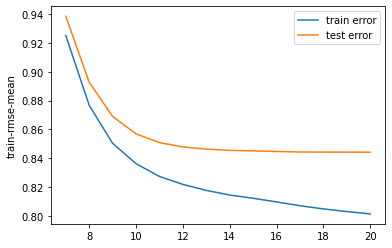

In [91]:
# plot Curve
import seaborn as sns
temp = cv_results[cv_results["train-rmse-mean"]<1]
sns.lineplot(data=temp, x=temp.index, y="train-rmse-mean", label="train error")
sns.lineplot(data=temp, x=temp.index, y="test-rmse-mean", label="test error")

In [87]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(2,9)
    for min_child_weight in range(2,9)
]

# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10,
    )
    
    # Update best RME
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=2, min_child_weight=2
	RMSE 0.836466 for 295 rounds
CV with max_depth=2, min_child_weight=3
	RMSE 0.8364373333333334 for 293 rounds
CV with max_depth=2, min_child_weight=4
	RMSE 0.83656 for 277 rounds
CV with max_depth=2, min_child_weight=5
	RMSE 0.8365459999999999 for 287 rounds
CV with max_depth=2, min_child_weight=6
	RMSE 0.8368953333333334 for 230 rounds
CV with max_depth=2, min_child_weight=7
	RMSE 0.8365393333333334 for 267 rounds
CV with max_depth=2, min_child_weight=8
	RMSE 0.8365723333333334 for 266 rounds
CV with max_depth=3, min_child_weight=2
	RMSE 0.8366516666666666 for 173 rounds
CV with max_depth=3, min_child_weight=3
	RMSE 0.8369263333333334 for 161 rounds
CV with max_depth=3, min_child_weight=4
	RMSE 0.8368983333333334 for 154 rounds
CV with max_depth=3, min_child_weight=5
	RMSE 0.8371763333333333 for 120 rounds
CV with max_depth=3, min_child_weight=6
	RMSE 0.8369713333333332 for 144 rounds
CV with max_depth=3, min_child_weight=7
	RMSE 0.8369083333333

In [88]:
# add best parameters
params['max_depth'] = 2
params['min_child_weight'] = 2

In [92]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	RMSE 0.836466 for 295 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 0.8365396666666666 for 244 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 0.8364743333333333 for 274 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 0.8363359999999999 for 299 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 0.8363743333333332 for 299 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 0.8366349999999999 for 295 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 0.8367533333333332 for 257 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 0.8363936666666666 for 267 rounds
CV with subsample=0.8, colsample=1.0
	RMSE 0.8368713333333333 for 256 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 0.8366340000000001 for 299 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 0.8367133333333333 for 286 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 0.8366563333333333 for 267 rounds
CV with subsample=0.7, colsample=1.0
	RMSE 0.8374990000000001 for 200 rounds
CV with s

In [93]:
# update parameter
params['subsample'] = 1.0
params['colsample_bytree'] = 0.7

In [96]:
# Find best learning rate eta

%time

min_rmse= float("Inf")
best_params = None
for eta in [1, .5, .3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round,seed=42,nfold=3,metrics=['rmse'],early_stopping_rounds=10)
    # Update best score
    mean_rsme = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
CV with eta=1
CPU times: user 2min 33s, sys: 4.05 s, total: 2min 37s
Wall time: 16.5 s
	RMSE 0.836808 for 103 rounds

CV with eta=0.5
CPU times: user 4min 12s, sys: 6.49 s, total: 4min 19s
Wall time: 26.5 s
	RMSE 0.836808 for 161 rounds

CV with eta=0.3
CPU times: user 7min 30s, sys: 10.3 s, total: 7min 40s
Wall time: 45.3 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.2
CPU times: user 7min 29s, sys: 10.7 s, total: 7min 39s
Wall time: 46.1 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.1
CPU times: user 7min 27s, sys: 10.3 s, total: 7min 37s
Wall time: 45.1 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.05
CPU times: user 7min 29s, sys: 10.3 s, total: 7min 39s
Wall time: 45.1 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.01
CPU times: user 7min 28s, sys: 10.4 s, total: 7min 39s
Wall time: 45.3 s
	RMSE 0.836808 for 299 rounds

CV with eta=0.005
CPU times: user 7min 28s, sys: 10.4 s, total: 7min 38s
Wall time: 45.2 s
	RMSE

NameError: name 'min_mae' is not defined

In [97]:
params['eta'] = .3

In [98]:
# final parameter
params

{'max_depth': 2,
 'min_child_weight': 2,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'eval_metric': 'rmse',
 'objective': 'reg:squarederror'}

In [99]:
final_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best RMSE: {:.2f} in {} rounds".format(final_model.best_score, final_model.best_iteration+1))

[0]	Test-rmse:4.94618
[1]	Test-rmse:3.51513
[2]	Test-rmse:2.53501
[3]	Test-rmse:1.87663
[4]	Test-rmse:1.44875
[5]	Test-rmse:1.18411
[6]	Test-rmse:1.02999
[7]	Test-rmse:0.94517
[8]	Test-rmse:0.90047
[9]	Test-rmse:0.87723
[10]	Test-rmse:0.86544
[11]	Test-rmse:0.85930
[12]	Test-rmse:0.85601
[13]	Test-rmse:0.85410
[14]	Test-rmse:0.85288
[15]	Test-rmse:0.85207
[16]	Test-rmse:0.85149
[17]	Test-rmse:0.85105
[18]	Test-rmse:0.85057
[19]	Test-rmse:0.85012
[20]	Test-rmse:0.84980
[21]	Test-rmse:0.84941
[22]	Test-rmse:0.84909
[23]	Test-rmse:0.84877
[24]	Test-rmse:0.84840
[25]	Test-rmse:0.84812
[26]	Test-rmse:0.84786
[27]	Test-rmse:0.84756
[28]	Test-rmse:0.84725
[29]	Test-rmse:0.84700
[30]	Test-rmse:0.84674
[31]	Test-rmse:0.84649
[32]	Test-rmse:0.84629
[33]	Test-rmse:0.84609
[34]	Test-rmse:0.84590
[35]	Test-rmse:0.84576
[36]	Test-rmse:0.84559
[37]	Test-rmse:0.84535
[38]	Test-rmse:0.84518
[39]	Test-rmse:0.84501
[40]	Test-rmse:0.84485
[41]	Test-rmse:0.84474
[42]	Test-rmse:0.84463
[43]	Test-rmse:0.8445

In [100]:
# prediction with final_model
X_submit_pre = preprocessor.transform(X_submit)

y_submit = final_model.predict(xgb.DMatrix(X_submit_pre))
y_submit

array([7.596984 , 7.7184544, 7.566323 , ..., 7.5610046, 7.4194016,
       7.389242 ], dtype=float32)

In [103]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/xgboost_tuned_{name_add}.csv", index=False)

## 4. Bagging and other bootstrapping models (simple)

In [127]:
# preprocess before model building

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

X_pre = preprocessor.fit_transform(X)
X_submit_pre = preprocessor.transform(X_submit)

In [119]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.4, shuffle=True, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [117]:
print(X_train.shape)

(179469, 1)


In [120]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Bagging

bagging_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    bootstrap=True, max_samples=0.3, 
    #bootstrap_features = True, max_features=1.0,
    n_jobs=-1, verbose=3
)

bagging_reg.fit(X_train, y_train)
y_pred = bagging_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  3.2min remaining:  6.5min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  3.3min remaining:  1.1min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  3.4min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   26.0s remaining:   52.1s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   36.3s remaining:   12.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   39.7s finished


RMSE: 0.8434959569551181


In [128]:
import datetime as datetime

y_submit = bagging_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/bagging_simple_{name_add}.csv", index=False)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   56.8s remaining:  1.9min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  1.1min remaining:   21.7s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.1min finished


In [121]:
# Pasting

pasting_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    bootstrap=False, max_samples=0.3, 
    #bootstrap_features = True, max_features=1.0,
    n_jobs=-1, verbose=3
)

pasting_reg.fit(X_train, y_train)
y_pred = pasting_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  3.7min remaining:  7.4min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  3.8min remaining:  1.3min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  3.8min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   28.0s remaining:   55.9s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   36.2s remaining:   12.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   39.8s finished


RMSE: 0.8433322216169691


In [129]:
import datetime as datetime

y_submit = pasting_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/pasting_simple_{name_add}.csv", index=False)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   51.2s remaining:  1.7min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  1.1min remaining:   22.9s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.2min finished


In [122]:
# Random Subspace

rnd_subspace_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    #bootstrap=False, max_samples=0.3, 
    bootstrap_features = True, max_features=0.3,
    n_jobs=-1, verbose=3
)

rnd_subspace_reg.fit(X_train, y_train)
y_pred = rnd_subspace_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  2.6min remaining:  5.1min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  2.9min remaining:   57.4s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  3.0min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   24.1s remaining:   48.1s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   31.8s remaining:   10.6s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   33.9s finished


RMSE: 0.8510052704005299


In [130]:
import datetime as datetime

y_submit = rnd_subspace_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/random_subspace_simple_{name_add}.csv", index=False)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   32.3s remaining:  1.1min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   50.5s remaining:   16.8s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   56.0s finished


In [125]:
# Random Patch

rnd_patch_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=1000,
    bootstrap=True, max_samples=0.4, 
    bootstrap_features = True, max_features=0.4,
    n_jobs=-1, verbose=3
)

rnd_patch_reg.fit(X_train, y_train)
y_pred = rnd_patch_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:  3.2min remaining:  6.4min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  3.5min remaining:  1.2min
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  3.6min finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   28.2s remaining:   56.5s
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:   43.4s remaining:   14.5s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:   45.8s finished


RMSE: 0.8475154222477036


In [131]:
import datetime as datetime

y_submit = rnd_patch_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/random_patch_simple_{name_add}.csv", index=False)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   4 out of  12 | elapsed:   49.8s remaining:  1.7min
[Parallel(n_jobs=12)]: Done   9 out of  12 | elapsed:  1.3min remaining:   26.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:  1.4min finished


### Bagging models using GridSearch

In [135]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Grid Search Parameters
param_grid =  {'n_estimators': [200,400,600], 
               'max_samples': [0.1,0.3,0.6]}

# Bagging
bagging_reg = BaggingRegressor(DecisionTreeRegressor(), bootstrap=True)

bagging_reg_grid = GridSearchCV(bagging_reg, param_grid=param_grid, cv=3, verbose=10, n_jobs=-1)

best_bagging_reg = bagging_reg_grid.fit(X_train, y_train)

print("Best Logistic Regression Score: " + str(best_bagging_reg.best_score_))
print("Best Parameter:  " + str(best_bagging_reg.best_params_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   7 out of  27 | elapsed: 10.0min remaining: 28.6min
[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed: 11.7min remaining: 20.0min
[Parallel(n_jobs=-1)]: Done  13 out of  27 | elapsed: 22.5min remaining: 24.2min
[Parallel(n_jobs=-1)]: Done  16 out of  27 | elapsed: 25.4min remaining: 17.5min
[Parallel(n_jobs=-1)]: Done  19 out of  27 | elapsed: 32.9min remaining: 13.9min
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed: 37.6min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  25 out of  27 | elapsed: 50.8min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 51.0min finished


Best Logistic Regression Score: 0.07268147671945265
Best Parameter:  {'max_samples': 0.1, 'n_estimators': 600}


In [136]:
y_pred = best_bagging_reg.predict(X_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

RMSE: 0.8430529403176706


In [137]:
import datetime as datetime

y_submit = best_bagging_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/baggin_tuned_{name_add}.csv", index=False)

### Random Patch with Grid Search

In [138]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Grid Search Parameters
param_grid =  {'n_estimators': [400,600, 800, 1000], 
               'max_samples': [0.01, 0.05, 0.1,0.3,0.6],
              'max_features': [0.1,0.3,0.6,0.8,1.0]
              }

# Random Patch
rnd_patch_reg = BaggingRegressor(DecisionTreeRegressor(), bootstrap=True, bootstrap_features=True)

rnd_patch_reg_grid = GridSearchCV(rnd_patch_reg, param_grid=param_grid, cv=3, verbose=10, n_jobs=-1)

best_rnd_patch_reg = rnd_patch_reg_grid.fit(X_train, y_train)

print("Best Parameter:  " + str(best_rnd_patch_reg.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 52.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 66.7min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 84.9min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 115.0min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 

Best Parameter:  {'max_features': 1.0, 'max_samples': 0.3, 'n_estimators': 1000}


In [139]:
y_pred = best_rnd_patch_reg.predict(X_test)
print("RMSE Test score: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

RMSE: 0.8429562709940001


In [140]:
import datetime as datetime

y_submit = best_rnd_patch_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/random_patch_tuned_{name_add}.csv", index=False)

## 5. Boosting

In [38]:
# preprocess before model building

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)
X_submit_pre = preprocessor.transform(X_submit)

In [39]:
print("dimensionality before preprocessing: " + str(X_train.shape[1]))
print("after preprocessing: " + str(X_train_pre.shape[1]))

dimensionality before preprocessing: 24
after preprocessing: 70


In [44]:
X_train_pre.shape

(239292, 70)

In [49]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

### 5.1 AdaBoost (Simple)

In [53]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3), # decision stumps
    n_estimators = 500,
    learning_rate=5,
    random_state=0
)

%time ada_reg.fit(X_train_pre, y_train)
print("Number of estimators: " + str(len(ada_reg.estimators_)))
print("Training score: " + str(mean_squared_error(y_train, ada_reg.predict(X_train_pre), squared=False)))
print("Validation score: " + str(mean_squared_error(y_test, ada_reg.predict(X_test_pre), squared=False)))

CPU times: user 9.71 s, sys: 167 ms, total: 9.88 s
Wall time: 9.9 s
Number of estimators: 4
Training score: 0.8633499837066865
Validation score: 0.8626204468894944


In [54]:
import datetime as datetime

y_submit = ada_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/adaboost_simple_{name_add}.csv", index=False)

### 5.2 AdaBoost (Tuned)

### 5.3 Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=500, learning_rate=0.1, verbose=1)

%time gbrt.fit(X_train_pre, y_train)

print("Training score: " + str(mean_squared_error(y_train, gbrt.predict(X_train_pre), squared=False)))
print("Validation score: " + str(mean_squared_error(y_test, gbrt.predict(X_test_pre), squared=False)))

      Iter       Train Loss   Remaining Time 
         1           0.7581           11.95m
         2           0.7531           11.80m
         3           0.7499           11.71m
         4           0.7472           11.69m
         5           0.7448           11.74m
         6           0.7424           11.75m
         7           0.7402           11.77m
         8           0.7383           11.73m
         9           0.7365           11.76m
        10           0.7350           11.69m
        20           0.7230           11.43m
        30           0.7166           11.01m
        40           0.7125           10.61m
        50           0.7097           10.27m
        60           0.7076            9.98m
        70           0.7061            9.71m
        80           0.7042            9.44m
        90           0.7027            9.26m
       100           0.7013            9.07m
       200           0.6928            6.81m
       300           0.6893            4.57m
       40

[learning_curve] Training set sizes: [  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100 15100 16100 17100 18100 19100]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    5.2s remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   54.5s remaining:  6.1min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:  1.7min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:  2.5min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  3.4min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  4.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  5.1min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  5.7min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  6.8min remaining:   45.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.8min finished


Text(0.5, 1.0, 'Learning Curve for final model')

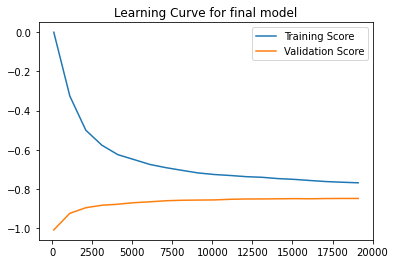

In [81]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(GradientBoostingRegressor(max_depth=3, n_estimators=500, learning_rate=0.1),
                                                         X_train_pre, y_train,
                                                         train_sizes=[np.arange(100,20000,1000)],
                                                         scoring="neg_root_mean_squared_error",
                                                         cv=5, n_jobs=-1, verbose=10)
import seaborn as sns
sns.lineplot(x=train_sizes, y=train_scores[:,0], label="Training Score")
sns.lineplot(x=train_sizes, y=valid_scores[:,0], label="Validation Score")
plt.title("Learning Curve for final model")

In [86]:
print("Mean RMSE Training: " + str(-1*train_scores.mean()))
print("Mean RMSE Validation: " + str(-1*valid_scores.mean()))

Mean RMSE Training: 0.6412894655726002
Mean RMSE Validation: 0.8671301004848908


In [87]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=500, max_features=0.6,
                                 subsample=0.6, learning_rate=0.1, verbose=1)

%time gbrt.fit(X_train_pre, y_train)

print("Training score: " + str(mean_squared_error(y_train, gbrt.predict(X_train_pre), squared=False)))
print("Validation score: " + str(mean_squared_error(y_test, gbrt.predict(X_test_pre), squared=False)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7654           0.0041            6.98m
         2           0.7583           0.0034            6.78m
         3           0.7556           0.0029            6.52m
         4           0.7550           0.0024            6.47m
         5           0.7516           0.0021            6.41m
         6           0.7506           0.0018            6.30m
         7           0.7481           0.0016            6.23m
         8           0.7465           0.0015            6.22m
         9           0.7461           0.0013            6.12m
        10           0.7458           0.0013            6.12m
        20           0.7337           0.0007            6.27m
        30           0.7266           0.0005            6.02m
        40           0.7200           0.0004            5.79m
        50           0.7178           0.0003            5.63m
        60           0.7153           0.0003            5.52m
       

[learning_curve] Training set sizes: [  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100 15100 16100 17100 18100 19100]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    4.6s remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   24.5s remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   47.3s remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:  1.1min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  1.5min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  1.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  2.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  2.5min remaining:   39.5s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  2.9min remaining:   19.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished


Text(0.5, 1.0, 'Learning Curve for final model')

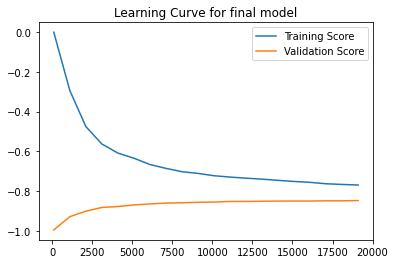

In [88]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(gbrt,
                                                         X_train_pre, y_train,
                                                         train_sizes=[np.arange(100,20000,1000)],
                                                         scoring="neg_root_mean_squared_error",
                                                         cv=5, n_jobs=-1, verbose=10)
import seaborn as sns
sns.lineplot(x=train_sizes, y=train_scores[:,0], label="Training Score")
sns.lineplot(x=train_sizes, y=valid_scores[:,0], label="Validation Score")
plt.title("Learning Curve for final model")

In [89]:
print("Mean RMSE Training: " + str(-1*train_scores.mean()))
print("Mean RMSE Validation: " + str(-1*valid_scores.mean()))

Mean RMSE Training: 0.6373970591713989
Mean RMSE Validation: 0.8699746191709593


In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Grid Search Parameters
param_grid =  {'n_estimators': [100,200,500,1000],
               'max_depth': [0.2, 0.6, 1],
               'max_features':[0.2, 0.6, 1],
               'subsample': [0.2, 0.6, 1],
               'learning_rate': [0.1, 0.3, 0.5, 1,3]
              }

gbrt = GradientBoostingRegressor(verbose=1)

grid_search = GridSearchCV(gbrt, param_grid=param_grid, cv=5, verbose=10, n_jobs=-1)

model = grid_search.fit(X_train_pre, y_train)

print("Best Parameter:  " + str(model.best_params_))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

      Iter       Train Loss   Remaining Time 
         1           0.7588            6.41m
         2           0.7539            6.81m
         3           0.7515            6.64m
         4           0.7492            6.53m
         5           0.7470            6.56m
         6           0.7449            6.50m
         7           0.7428            6.49m
         8           0.7412            6.51m
         9           0.7398            6.36m
        10           0.7385            6.44m
        20           0.7274            6.40m
        30           0.7214            6.40m
        40           0.7178            6.33m
        50           0.7153            6.34m
        60           0.7135            6.26m
        70           0.7120            6.21m
        80           0.7109            6.14m
        90           0.7099            6.08m
       100           0.7091            6.05m
       200           0.7042            5.43m
       300           0.7018            4.79m
       40

In [ ]:
# Best Parameter:  {'learning_rate': 0.5, 'max_depth': 1, 'max_features': 0.6, 'n_estimators': 1000, 'subsample': 1}

[learning_curve] Training set sizes: [  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100 15100 16100 17100 18100 19100]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    5.7s remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   31.2s remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   59.3s remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:  1.4min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  1.8min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  2.3min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  2.7min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  3.1min remaining:   49.3s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  3.6min remaining:   24.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.1min finished


Text(0.5, 1.0, 'Learning Curve for final model')

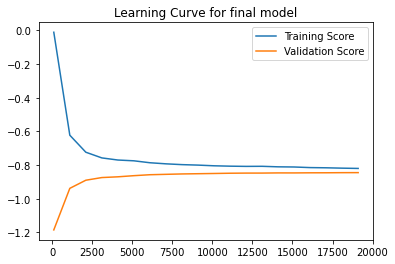

In [99]:
# Retrain using best parameters
gbrt_tuned = GradientBoostingRegressor(learning_rate=0.5, max_depth=1, max_features=0.6, n_estimators=1000,
                                 subsample=1, verbose=1)


from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(gbrt_tuned,
                                                         X_train_pre, y_train,
                                                         train_sizes=[np.arange(100,20000,1000)],
                                                         scoring="neg_root_mean_squared_error",
                                                         cv=5, n_jobs=-1, verbose=10)
import seaborn as sns
sns.lineplot(x=train_sizes, y=train_scores[:,0], label="Training Score")
sns.lineplot(x=train_sizes, y=valid_scores[:,0], label="Validation Score")
plt.title("Learning Curve for final model")

[learning_curve] Training set sizes: [  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100 15100 16100 17100 18100 19100]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    5.4s remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:   30.3s remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   57.2s remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:  1.3min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  1.8min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  2.2min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  2.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  3.0min remaining:   47.6s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  3.5min remaining:   23.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.0min finished


Text(0.5, 1.0, 'Learning Curve for final model')

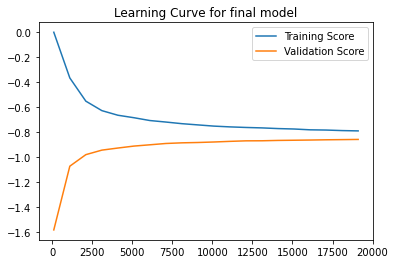

In [103]:
# Retrain using best parameters
gbrt_tuned = GradientBoostingRegressor(learning_rate=1.5, max_depth=1, max_features=0.6, n_estimators=1000,
                                 subsample=1, verbose=1)


from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(gbrt_tuned,
                                                         X_train_pre, y_train,
                                                         train_sizes=[np.arange(100,20000,1000)],
                                                         scoring="neg_root_mean_squared_error",
                                                         cv=5, n_jobs=-1, verbose=10)
import seaborn as sns
sns.lineplot(x=train_sizes, y=train_scores[:,0], label="Training Score")
sns.lineplot(x=train_sizes, y=valid_scores[:,0], label="Validation Score")
plt.title("Learning Curve for final model")

In [104]:
gbrt_tuned.fit(X_train_pre, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7588            7.27m
         2           0.7565            8.09m
         3           0.7530            7.89m
         4           0.7501            7.78m
         5           0.7477            7.84m
         6           0.7456            7.95m
         7           0.7432            7.83m
         8           0.7413            7.75m
         9           0.7403            7.62m
        10           0.7389            7.52m
        20           0.7272            7.14m
        30           0.7203            6.94m
        40           0.7166            7.10m
        50           0.7136            6.90m
        60           0.7115            6.85m
        70           0.7093            6.75m
        80           0.7079            6.80m
        90           0.7064            6.71m
       100           0.7053            6.70m
       200           0.6986            5.99m
       300           0.6960            5.16m
       40

GradientBoostingRegressor(learning_rate=1.5, max_depth=1, max_features=0.6,
                          n_estimators=1000, subsample=1, verbose=1)

In [105]:
print("Training score: " + str(mean_squared_error(y_train, gbrt_tuned.predict(X_train_pre), squared=False)))
print("Validation score: " + str(mean_squared_error(y_test, gbrt_tuned.predict(X_test_pre), squared=False)))

Training score: 0.8301284169414473
Validation score: 0.8362638757710368


In [106]:
import datetime as datetime

y_submit = gbrt_tuned.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/gbrt_tuned_{name_add}.csv", index=False)

[learning_curve] Training set sizes: [  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100 15100 16100 17100 18100 19100]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    9.6s remaining:  7.9min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:  1.0min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:  2.0min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:  2.9min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:  4.0min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:  4.9min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:  5.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:  6.7min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:  7.8min remaining:   52.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.8min finished


Text(0.5, 1.0, 'Learning Curve for final model')

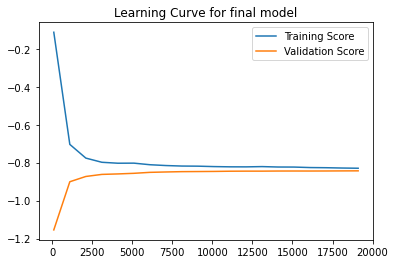

In [107]:
# Retrain with lower learning rate
gbrt_tuned_2 = GradientBoostingRegressor(learning_rate=0.1, max_depth=1, max_features=0.6, n_estimators=2000,
                                 subsample=1, verbose=1)


from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(gbrt_tuned_2,
                                                         X_train_pre, y_train,
                                                         train_sizes=[np.arange(100,20000,1000)],
                                                         scoring="neg_root_mean_squared_error",
                                                         cv=5, n_jobs=-1, verbose=10)
import seaborn as sns
sns.lineplot(x=train_sizes, y=train_scores[:,0], label="Training Score")
sns.lineplot(x=train_sizes, y=valid_scores[:,0], label="Validation Score")
plt.title("Learning Curve for final model")

In [108]:
gbrt_tuned_2.fit(X_train_pre, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7652           15.61m
         2           0.7635           14.50m
         3           0.7621           14.71m
         4           0.7607           14.38m
         5           0.7596           14.54m
         6           0.7585           14.70m
         7           0.7576           14.56m
         8           0.7568           14.82m
         9           0.7561           14.76m
        10           0.7554           14.53m
        20           0.7501           14.18m
        30           0.7461           13.91m
        40           0.7427           13.82m
        50           0.7398           13.60m
        60           0.7373           13.38m
        70           0.7351           13.53m
        80           0.7331           13.34m
        90           0.7314           13.46m
       100           0.7298           13.38m
       200           0.7201           12.13m
       300           0.7153           11.23m
       40

GradientBoostingRegressor(max_depth=1, max_features=0.6, n_estimators=2000,
                          subsample=1, verbose=1)

In [109]:
print("Training score: " + str(mean_squared_error(y_train, gbrt_tuned_2.predict(X_train_pre), squared=False)))
print("Validation score: " + str(mean_squared_error(y_test, gbrt_tuned_2.predict(X_test_pre), squared=False)))

Training score: 0.8372506828421838
Validation score: 0.8376899430575974


In [110]:
import datetime as datetime

y_submit = gbrt_tuned_2.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/gbrt_tuned_2_{name_add}.csv", index=False)

In [112]:
# save the model to disk
import pickle
filename = f"output/gbrt_tuned_2_{name_add}.sav"
pickle.dump(model, open(filename, 'wb'))

In [114]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_pre, y_test)
print(result)

0.08582037434466505


In [125]:
# Grid Search 2

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Grid Search Parameters
param_grid =  {'max_depth': [1,3,5],
               'max_features':[0.2, 0.5, 1],
               'min_samples_split':[0.1, 0.3, 0.6],
               'min_samples_leaf':[0.1, 0.3, 0.6],
              }

gbrt_2 = GradientBoostingRegressor(learning_rate=0.3, n_estimators=1000, subsample=1, verbose=1)

grid_search_2 = GridSearchCV(gbrt_2, param_grid=param_grid, cv=3, verbose=10, n_jobs=-1)

%time grid_search_2.fit(X_train_pre, y_train)

print("Best Parameter:  " + str(grid_search_2.best_params_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 57.4min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 67.9min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 9

      Iter       Train Loss   Remaining Time 
         1           0.7590           15.15m
         2           0.7536           13.76m
         3           0.7499           13.64m
         4           0.7475           13.32m
         5           0.7453           13.33m
         6           0.7426           13.17m
         7           0.7407           13.09m
         8           0.7391           13.30m
         9           0.7372           13.36m
        10           0.7360           13.21m
        20           0.7269           13.22m
        30           0.7217           12.94m
        40           0.7187           12.98m
        50           0.7166           12.65m
        60           0.7149           12.55m
        70           0.7137           12.34m
        80           0.7125           12.30m
        90           0.7115           12.28m
       100           0.7104           12.25m
       200           0.7054           11.18m
       300           0.7029            9.70m
       40

In [126]:
print("Training RMSE: " + str(mean_squared_error(y_train, grid_search_2.predict(X_train_pre), squared=False)))
print("Validation RMSE: " + str(mean_squared_error(y_test, grid_search_2.predict(X_test_pre), squared=False)))

Training score: 0.8335121100668117
Validation score: 0.8400823114247763


### 5.4 LightGBM

[learning_curve] Training set sizes: [  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100 15100 16100 17100 18100 19100]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    4.4s remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    5.0s remaining:   33.5s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    5.9s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:    6.9s remaining:   12.9s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:    7.8s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:    8.9s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   10.0s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   11.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   12.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.9s finished


Text(0.5, 1.0, 'Learning Curve for final model')

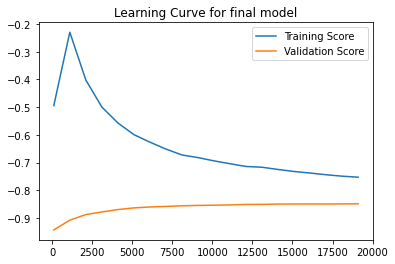

In [127]:
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor(verbose=10)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(lgbmr,
                                                         X_train_pre, y_train,
                                                         train_sizes=[np.arange(100,20000,1000)],
                                                         scoring="neg_root_mean_squared_error",
                                                         cv=5, n_jobs=-1, verbose=10)
import seaborn as sns
sns.lineplot(x=train_sizes, y=train_scores[:,0], label="Training Score")
sns.lineplot(x=train_sizes, y=valid_scores[:,0], label="Validation Score")
plt.title("Learning Curve for final model")

In [131]:
%time lgbmr.fit(X_train_pre, y_train)
print("Training RMSE: " + str(mean_squared_error(y_train, lgbmr.predict(X_train_pre), squared=False)))
print("Validation RMSE: " + str(mean_squared_error(y_test, lgbmr.predict(X_test_pre), squared=False)))

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.969754
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.485218
[LightGBM] [Debug] init for col-wise cost 0.007641 seconds, init for row-wise cost 0.045167 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 3668
[LightGBM] [Info] Number of data points in the train set: 239292, number of used features: 63
[LightGBM] [Info] Start training from score 7.464961
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 11
[LightGB

In [132]:
import datetime as datetime

y_submit = lgbmr.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/lightgbm_simple_{name_add}.csv", index=False)

#### Tuned

In [162]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

max_bin = np.arange(10,800,10)

scores = pd.DataFrame(columns=["max_bin", "train_RMSE", "test_RMSE"])

for i in range(len(max_bin)):
    scores.at[i, "max_bin"] = max_bin[i]
    lgbmr = LGBMRegressor(max_bin=max_bin[i])
    lgbmr.fit(X_train_pre, y_train)
    scores.at[i, "train_RMSE"] = mean_squared_error(y_train, lgbmr.predict(X_train_pre), squared=False)
    scores.at[i, "test_RMSE"] = mean_squared_error(y_test, lgbmr.predict(X_test_pre), squared=False)

scores.head(10)

max_bin train_RMSE test_RMSE
0      10   0.836047  0.841297
1      20   0.832220  0.838354
2      30   0.830505  0.837068
3      40   0.829834  0.836943
4      50   0.829560  0.836716
5      60   0.829170  0.836339
6      70   0.828927  0.836409
7      80   0.828852  0.836463
8      90   0.828690  0.836131
9     100   0.828394  0.835951

In [163]:
scores["train_RMSE"] = scores.train_RMSE.astype(float)
scores["test_RMSE"] = scores.test_RMSE.astype(float)
scores.dtypes

max_bin        object
train_RMSE    float64
test_RMSE     float64
dtype: object

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scores depending on max_bin')

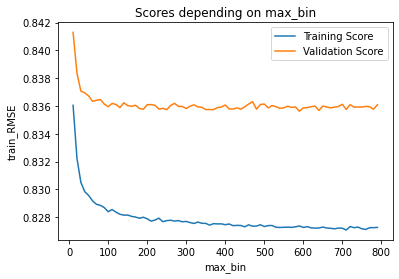

In [164]:
import seaborn as sns
sns.lineplot(scores["max_bin"], scores["train_RMSE"], label="Training Score")
sns.lineplot(x=scores["max_bin"], y=scores["test_RMSE"], label="Validation Score")
plt.title("Scores depending on max_bin")

In [176]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

num_leaves = np.arange(2,60,1)

scores = pd.DataFrame(columns=["num_leaves", "train_RMSE", "test_RMSE"])

for i in range(len(num_leaves)):
    print(num_leaves[i])
    scores.at[i, "num_leaves"] = num_leaves[i]
    lgbmr = LGBMRegressor(num_leaves=num_leaves[i])
    lgbmr.fit(X_train_pre, y_train)
    scores.at[i, "train_RMSE"] = mean_squared_error(y_train, lgbmr.predict(X_train_pre), squared=False)
    scores.at[i, "test_RMSE"] = mean_squared_error(y_test, lgbmr.predict(X_test_pre), squared=False)

scores["train_RMSE"] = scores.train_RMSE.astype(float)
scores["test_RMSE"] = scores.test_RMSE.astype(float)

scores.head(10)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


num_leaves  train_RMSE  test_RMSE
0          2    0.854353   0.853027
1          3    0.847801   0.846847
2          4    0.844677   0.844109
3          5    0.842657   0.842359
4          6    0.841217   0.841368
5          7    0.839928   0.840569
6          8    0.838991   0.839803
7          9    0.838281   0.839409
8         10    0.837527   0.839057
9         11    0.836792   0.838561

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scores depending on num_leaves')

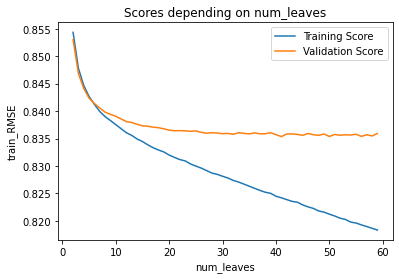

In [177]:
import seaborn as sns
sns.lineplot(scores["num_leaves"], scores["train_RMSE"], label="Training Score")
sns.lineplot(x=scores["num_leaves"], y=scores["test_RMSE"], label="Validation Score")
plt.title("Scores depending on num_leaves")

In [184]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

num_iterations = np.arange(1,200,10)

scores = pd.DataFrame(columns=["num_iterations", "train_RMSE", "test_RMSE"])

for i in range(len(num_iterations)):
    print(num_iterations[i])
    scores.at[i, "num_iterations"] = num_iterations[i]
    lgbmr = LGBMRegressor(num_iterations=num_iterations[i])
    lgbmr.fit(X_train_pre, y_train)
    scores.at[i, "train_RMSE"] = mean_squared_error(y_train, lgbmr.predict(X_train_pre), squared=False)
    scores.at[i, "test_RMSE"] = mean_squared_error(y_test, lgbmr.predict(X_test_pre), squared=False)

scores["train_RMSE"] = scores.train_RMSE.astype(float)
scores["test_RMSE"] = scores.test_RMSE.astype(float)

scores.head(10)

1


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


11


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


21


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


31


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


41


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


51


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


61


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


71


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


81


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


91


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


101


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


111


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


121


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


131


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


141


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


151


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


161


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


171


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


181


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


191


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


num_iterations  train_RMSE  test_RMSE
0              1    0.872391   0.870853
1             11    0.854343   0.854009
2             21    0.846612   0.847337
3             31    0.841916   0.843678
4             41    0.838548   0.841387
5             51    0.836047   0.839842
6             61    0.833933   0.838569
7             71    0.832093   0.837613
8             81    0.830428   0.836863
9             91    0.829009   0.836354

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scores depending on num_iterations')

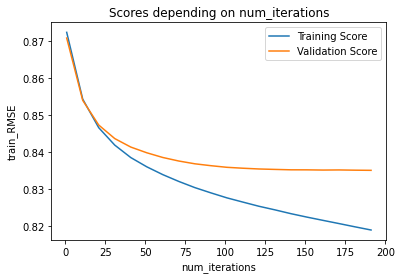

In [185]:
import seaborn as sns
sns.lineplot(scores["num_iterations"], scores["train_RMSE"], label="Training Score")
sns.lineplot(x=scores["num_iterations"], y=scores["test_RMSE"], label="Validation Score")
plt.title("Scores depending on num_iterations")

In [182]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

learning_rate = np.arange(0.01,0.2,0.02)

scores = pd.DataFrame(columns=["learning_rate", "train_RMSE", "test_RMSE"])

for i in range(len(learning_rate)):
    print(learning_rate[i])
    scores.at[i, "learning_rate"] = learning_rate[i]
    lgbmr = LGBMRegressor(learning_rate=learning_rate[i])
    lgbmr.fit(X_train_pre, y_train)
    scores.at[i, "train_RMSE"] = mean_squared_error(y_train, lgbmr.predict(X_train_pre), squared=False)
    scores.at[i, "test_RMSE"] = mean_squared_error(y_test, lgbmr.predict(X_test_pre), squared=False)

scores["train_RMSE"] = scores.train_RMSE.astype(float)
scores["test_RMSE"] = scores.test_RMSE.astype(float)

scores.head(10)

0.01
0.03
0.049999999999999996
0.06999999999999999
0.08999999999999998
0.10999999999999997
0.12999999999999998
0.15
0.16999999999999998
0.18999999999999997


learning_rate  train_RMSE  test_RMSE
0          0.01    0.855776   0.855437
1          0.03    0.842379   0.844124
2          0.05    0.836174   0.839892
3          0.07    0.832076   0.837755
4          0.09    0.829129   0.836480
5          0.11    0.826525   0.835563
6          0.13    0.824529   0.835369
7          0.15    0.822891   0.835573
8          0.17    0.821127   0.835625
9          0.19    0.819727   0.835696

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scores depending on learning_rate')

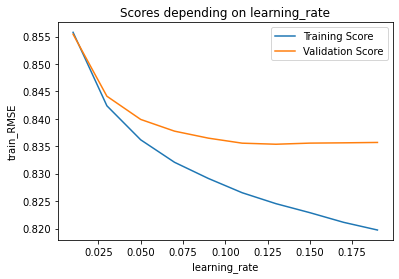

In [183]:
import seaborn as sns
sns.lineplot(scores["learning_rate"], scores["train_RMSE"], label="Training Score")
sns.lineplot(x=scores["learning_rate"], y=scores["test_RMSE"], label="Validation Score")
plt.title("Scores depending on learning_rate")

In [187]:
# Grid Search
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Grid Search Parameters
param_grid =  {"max_bin":[20,25,30,35,40,45],
               "num_leaves": [10,20,25,30,35,40],
               "num_iterations": [50,75,100,125,150,175,200],
               "learning_rate":[0.075,0.1,0.125,0.15,0.175],
              }

lgbmr = LGBMRegressor(verbose=10)

grid_search = GridSearchCV(lgbmr, param_grid=param_grid, cv=5, verbose=10, n_jobs=-1)

%time grid_search.fit(X_train_pre, y_train)

print("Best Parameter:  " + str(grid_search.best_params_))

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.969754
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.485218
[LightGBM] [Debug] init for col-wise cost 0.007423 seconds, init for row-wise cost 0.031806 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 239292, number of used features: 63
[LightGBM] [Info] Start training from score 7.464961
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [

[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 4
[LightGBM] [Debug] Trained a tree 

In [188]:
print("Training RMSE: " + str(mean_squared_error(y_train, grid_search.predict(X_train_pre), squared=False)))
print("Validation RMSE: " + str(mean_squared_error(y_test, grid_search.predict(X_test_pre), squared=False)))

Training RMSE: 0.8297128951929549
Validation RMSE: 0.83568088316504


In [189]:
import datetime as datetime

y_submit = grid_search.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/lightgbm_tuned_{name_add}.csv", index=False)

## Dimensionality Reduction in Pre-Processing

In [199]:
# preprocess before model building

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)
X_submit_pre = preprocessor.transform(X_submit)

print("dimensionality before preprocessing: " + str(X_train.shape[1]))
print("after preprocessing: " + str(X_train_pre.shape[1]))

# PCA
pca = PCA(n_components=0.95)
X_train_pre = pca.fit_transform(X_train_pre)
X_test_pre = pca.transform(X_test_pre)
X_submit_pre = pca.transform(X_submit_pre)

print("after pca: " + str(X_train_pre.shape[1]))


y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

dimensionality before preprocessing: 24
after preprocessing: 70
after pca: 23


[learning_curve] Training set sizes: [  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100 15100 16100 17100 18100 19100]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    1.2s remaining:   58.4s
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    1.5s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:    2.5s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:    3.6s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:    4.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:    5.9s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:    7.8s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:    9.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   10.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.9s finished


Text(0.5, 1.0, 'Learning Curve for final model')

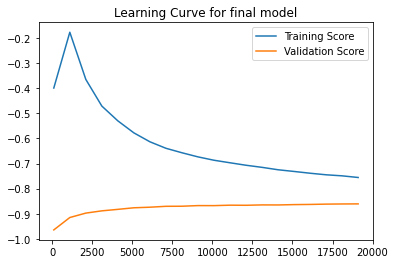

In [203]:
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor(verbose=10)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(lgbmr,
                                                         X_train_pre, y_train,
                                                         train_sizes=[np.arange(100,20000,1000)],
                                                         scoring="neg_root_mean_squared_error",
                                                         cv=5, n_jobs=-1, verbose=10)
import seaborn as sns
sns.lineplot(x=train_sizes, y=train_scores[:,0], label="Training Score")
sns.lineplot(x=train_sizes, y=valid_scores[:,0], label="Validation Score")
plt.title("Learning Curve for final model")

In [204]:
%time lgbmr.fit(X_train_pre, y_train)
print("Training RMSE: " + str(mean_squared_error(y_train, lgbmr.predict(X_train_pre), squared=False)))
print("Validation RMSE: " + str(mean_squared_error(y_test, lgbmr.predict(X_test_pre), squared=False)))

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000007 seconds, init for row-wise cost 0.009694 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 5865
[LightGBM] [Info] Number of data points in the train set: 239292, number of used features: 23
[LightGBM] [Info] Start training from score 7.464961
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and max_depth = 9
[LightGBM] [Debug] Trai

In [201]:
# Grid Search
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Grid Search Parameters
param_grid =  {"max_bin":[40,50,60],
               "num_leaves": [2,4,6,10],
               "num_iterations": [150,175,200,225],
               "learning_rate":[0.05,0.15,0.175,0.2,0.225,0.25],
              }

lgbmr = LGBMRegressor(verbose=10)

grid_search = GridSearchCV(lgbmr, param_grid=param_grid, cv=5, verbose=10, n_jobs=-1)

%time grid_search.fit(X_train_pre, y_train)

print("Best Parameter:  " + str(grid_search.best_params_))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000005 seconds, init for row-wise cost 0.009188 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 239292, number of used features: 23
[LightGBM] [Info] Start training from score 7.464961
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 4
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 4
[LightGBM] [Debug] Trai

[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 5
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 10 and max_depth = 7
[LightGBM] [Debug] Trained a tree 

In [202]:
print("Training RMSE: " + str(mean_squared_error(y_train, grid_search.predict(X_train_pre), squared=False)))
print("Validation RMSE: " + str(mean_squared_error(y_test, grid_search.predict(X_test_pre), squared=False)))

Training RMSE: 0.8424239455761812
Validation RMSE: 0.8504954422340573


## XGBoost part 2

In [205]:
# preprocess before XGBoost

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

X_pre = preprocessor.fit_transform(X)

In [207]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, shuffle=True, random_state=0)

In [210]:
import xgboost as xgb

# convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [232]:
# baseline model
num_boost_round = 300

params = {
    'max_depth':2, 
    'eta':0.3, 
    'booster':'dart',
    'reg':'squarederror',
    'verbose':1
    }

# train the model
%time model = xgb.train(dtrain=dtrain, params=params, num_boost_round=num_boost_round, evals=[(dtest, "Test")])

[19:48:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:4.94417
[1]	Test-rmse:3.51333
[2]	Test-rmse:2.53323
[3]	Test-rmse:1.87496
[4]	Test-rmse:1.44731
[5]	Test-rmse:1.18291
[6]	Test-rmse:1.02879
[7]	Test-rmse:0.94417
[8]	Test-rmse:0.89959
[9]	Test-rmse:0.87672
[10]	Test-rmse:0.86511
[11]	Test-rmse:0.85862
[12]	Test-rmse:0.85550
[13]	Test-rmse:0.85380
[14]	Test-rmse:0.85251
[15]	Test-rmse:0.85167
[16]	Test-rmse:0.85104
[17]	Test-rmse:0.85019
[18]	Test-rmse:0.84971
[19]	Test-rmse:0.84928
[20]	Test-rmse:0.84892
[21]	Test-rmse:0.84855
[22]	Test-rmse:0.84818
[23]	Test-rmse:0.84781
[24]	Test-rmse:0.84737
[25]	Test-rmse:0.84711
[26]	Test-rmse:0.84683
[27]	Test-rmse:0.84647
[28]

[331]	Test-rmse:0.83478
[332]	Test-rmse:0.83479
[333]	Test-rmse:0.83479
[334]	Test-rmse:0.83479
[335]	Test-rmse:0.83481
[336]	Test-rmse:0.83479
[337]	Test-rmse:0.83480
[338]	Test-rmse:0.83481
[339]	Test-rmse:0.83481
[340]	Test-rmse:0.83481
[341]	Test-rmse:0.83481
[342]	Test-rmse:0.83481
[343]	Test-rmse:0.83482
[344]	Test-rmse:0.83481
[345]	Test-rmse:0.83481
[346]	Test-rmse:0.83480
[347]	Test-rmse:0.83479
[348]	Test-rmse:0.83476
[349]	Test-rmse:0.83473
[350]	Test-rmse:0.83473
[351]	Test-rmse:0.83471
[352]	Test-rmse:0.83470
[353]	Test-rmse:0.83470
[354]	Test-rmse:0.83469
[355]	Test-rmse:0.83467
[356]	Test-rmse:0.83467
[357]	Test-rmse:0.83468
[358]	Test-rmse:0.83468
[359]	Test-rmse:0.83468
[360]	Test-rmse:0.83469
[361]	Test-rmse:0.83468
[362]	Test-rmse:0.83468
[363]	Test-rmse:0.83468
[364]	Test-rmse:0.83469
[365]	Test-rmse:0.83468
[366]	Test-rmse:0.83467
[367]	Test-rmse:0.83467
[368]	Test-rmse:0.83467
[369]	Test-rmse:0.83467
[370]	Test-rmse:0.83466
[371]	Test-rmse:0.83466
[372]	Test-rmse:

In [233]:
from sklearn.metrics import mean_squared_error
print("Training score: " + str(mean_squared_error(y_train, model.predict(dtrain), squared=False)))
print("Validation score: " + str(mean_squared_error(y_test, model.predict(dtest), squared=False)))

Training score: 0.8256106338189806
Validation score: 0.8343473453315419


In [237]:
import pandas as pd
from sklearn.metrics import mean_squared_error

scores = pd.DataFrame(columns=["etas", "train_RMSE", "test_RMSE"])

# eta values
num_boost_round = 200

params = {
    'max_depth':2, 
    'eta':0.3, 
    'booster':'dart',
    'reg':'squarederror'
    }

etas = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

i = 0
                      
# train the model
for eta in etas:
    
    print(eta)
    scores.at[i,"etas"] = eta         
    params["eta"] = eta
                      
    model = xgb.train(dtrain=dtrain, params=params, num_boost_round=num_boost_round, evals=[(dtest, "Test")])
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

0.01
[20:05:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:6.94195
[1]	Test-rmse:6.87353
[2]	Test-rmse:6.80581
[3]	Test-rmse:6.73879
[4]	Test-rmse:6.67243
[5]	Test-rmse:6.60676
[6]	Test-rmse:6.54175
[7]	Test-rmse:6.47741
[8]	Test-rmse:6.41372
[9]	Test-rmse:6.35067
[10]	Test-rmse:6.28828
[11]	Test-rmse:6.22651
[12]	Test-rmse:6.16538
[13]	Test-rmse:6.10487
[14]	Test-rmse:6.04497
[15]	Test-rmse:5.98569
[16]	Test-rmse:5.92701
[17]	Test-rmse:5.86893
[18]	Test-rmse:5.81145
[19]	Test-rmse:5.75455
[20]	Test-rmse:5.69823
[21]	Test-rmse:5.64249
[22]	Test-rmse:5.58733
[23]	Test-rmse:5.53272
[24]	Test-rmse:5.47868
[25]	Test-rmse:5.42518
[26]	Test-rmse:5.37224
[27]	Test-rmse:5.31984
[28]	Tes

[121]	Test-rmse:0.84993
[122]	Test-rmse:0.84986
[123]	Test-rmse:0.84978
[124]	Test-rmse:0.84971
[125]	Test-rmse:0.84964
[126]	Test-rmse:0.84955
[127]	Test-rmse:0.84949
[128]	Test-rmse:0.84942
[129]	Test-rmse:0.84936
[130]	Test-rmse:0.84930
[131]	Test-rmse:0.84925
[132]	Test-rmse:0.84919
[133]	Test-rmse:0.84913
[134]	Test-rmse:0.84906
[135]	Test-rmse:0.84901
[136]	Test-rmse:0.84894
[137]	Test-rmse:0.84889
[138]	Test-rmse:0.84882
[139]	Test-rmse:0.84875
[140]	Test-rmse:0.84869
[141]	Test-rmse:0.84862
[142]	Test-rmse:0.84857
[143]	Test-rmse:0.84852
[144]	Test-rmse:0.84847
[145]	Test-rmse:0.84841
[146]	Test-rmse:0.84834
[147]	Test-rmse:0.84827
[148]	Test-rmse:0.84819
[149]	Test-rmse:0.84813
[150]	Test-rmse:0.84809
[151]	Test-rmse:0.84803
[152]	Test-rmse:0.84799
[153]	Test-rmse:0.84794
[154]	Test-rmse:0.84789
[155]	Test-rmse:0.84785
[156]	Test-rmse:0.84780
[157]	Test-rmse:0.84776
[158]	Test-rmse:0.84771
[159]	Test-rmse:0.84766
[160]	Test-rmse:0.84762
[161]	Test-rmse:0.84755
[162]	Test-rmse:

[40]	Test-rmse:0.84949
[41]	Test-rmse:0.84925
[42]	Test-rmse:0.84907
[43]	Test-rmse:0.84885
[44]	Test-rmse:0.84867
[45]	Test-rmse:0.84855
[46]	Test-rmse:0.84840
[47]	Test-rmse:0.84819
[48]	Test-rmse:0.84803
[49]	Test-rmse:0.84785
[50]	Test-rmse:0.84768
[51]	Test-rmse:0.84755
[52]	Test-rmse:0.84739
[53]	Test-rmse:0.84724
[54]	Test-rmse:0.84713
[55]	Test-rmse:0.84697
[56]	Test-rmse:0.84686
[57]	Test-rmse:0.84677
[58]	Test-rmse:0.84653
[59]	Test-rmse:0.84637
[60]	Test-rmse:0.84630
[61]	Test-rmse:0.84620
[62]	Test-rmse:0.84602
[63]	Test-rmse:0.84591
[64]	Test-rmse:0.84579
[65]	Test-rmse:0.84566
[66]	Test-rmse:0.84557
[67]	Test-rmse:0.84548
[68]	Test-rmse:0.84540
[69]	Test-rmse:0.84528
[70]	Test-rmse:0.84516
[71]	Test-rmse:0.84509
[72]	Test-rmse:0.84497
[73]	Test-rmse:0.84482
[74]	Test-rmse:0.84472
[75]	Test-rmse:0.84464
[76]	Test-rmse:0.84459
[77]	Test-rmse:0.84447
[78]	Test-rmse:0.84440
[79]	Test-rmse:0.84427
[80]	Test-rmse:0.84418
[81]	Test-rmse:0.84411
[82]	Test-rmse:0.84398
[83]	Test-r

[174]	Test-rmse:0.83811
[175]	Test-rmse:0.83810
[176]	Test-rmse:0.83801
[177]	Test-rmse:0.83800
[178]	Test-rmse:0.83793
[179]	Test-rmse:0.83789
[180]	Test-rmse:0.83787
[181]	Test-rmse:0.83788
[182]	Test-rmse:0.83786
[183]	Test-rmse:0.83782
[184]	Test-rmse:0.83781
[185]	Test-rmse:0.83779
[186]	Test-rmse:0.83778
[187]	Test-rmse:0.83774
[188]	Test-rmse:0.83771
[189]	Test-rmse:0.83769
[190]	Test-rmse:0.83768
[191]	Test-rmse:0.83764
[192]	Test-rmse:0.83760
[193]	Test-rmse:0.83758
[194]	Test-rmse:0.83757
[195]	Test-rmse:0.83750
[196]	Test-rmse:0.83750
[197]	Test-rmse:0.83748
[198]	Test-rmse:0.83747
[199]	Test-rmse:0.83744
0.25
[20:07:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:5.28

[95]	Test-rmse:0.83891
[96]	Test-rmse:0.83877
[97]	Test-rmse:0.83875
[98]	Test-rmse:0.83869
[99]	Test-rmse:0.83866
[100]	Test-rmse:0.83855
[101]	Test-rmse:0.83852
[102]	Test-rmse:0.83840
[103]	Test-rmse:0.83833
[104]	Test-rmse:0.83827
[105]	Test-rmse:0.83807
[106]	Test-rmse:0.83798
[107]	Test-rmse:0.83790
[108]	Test-rmse:0.83784
[109]	Test-rmse:0.83783
[110]	Test-rmse:0.83778
[111]	Test-rmse:0.83774
[112]	Test-rmse:0.83774
[113]	Test-rmse:0.83771
[114]	Test-rmse:0.83771
[115]	Test-rmse:0.83771
[116]	Test-rmse:0.83770
[117]	Test-rmse:0.83761
[118]	Test-rmse:0.83756
[119]	Test-rmse:0.83751
[120]	Test-rmse:0.83745
[121]	Test-rmse:0.83737
[122]	Test-rmse:0.83731
[123]	Test-rmse:0.83728
[124]	Test-rmse:0.83728
[125]	Test-rmse:0.83726
[126]	Test-rmse:0.83724
[127]	Test-rmse:0.83725
[128]	Test-rmse:0.83721
[129]	Test-rmse:0.83718
[130]	Test-rmse:0.83717
[131]	Test-rmse:0.83715
[132]	Test-rmse:0.83713
[133]	Test-rmse:0.83711
[134]	Test-rmse:0.83711
[135]	Test-rmse:0.83710
[136]	Test-rmse:0.837

[13]	Test-rmse:0.84767
[14]	Test-rmse:0.84713
[15]	Test-rmse:0.84664
[16]	Test-rmse:0.84630
[17]	Test-rmse:0.84577
[18]	Test-rmse:0.84547
[19]	Test-rmse:0.84504
[20]	Test-rmse:0.84483
[21]	Test-rmse:0.84456
[22]	Test-rmse:0.84427
[23]	Test-rmse:0.84410
[24]	Test-rmse:0.84386
[25]	Test-rmse:0.84367
[26]	Test-rmse:0.84333
[27]	Test-rmse:0.84315
[28]	Test-rmse:0.84306
[29]	Test-rmse:0.84263
[30]	Test-rmse:0.84244
[31]	Test-rmse:0.84227
[32]	Test-rmse:0.84205
[33]	Test-rmse:0.84196
[34]	Test-rmse:0.84177
[35]	Test-rmse:0.84159
[36]	Test-rmse:0.84129
[37]	Test-rmse:0.84123
[38]	Test-rmse:0.84111
[39]	Test-rmse:0.84075
[40]	Test-rmse:0.84063
[41]	Test-rmse:0.84040
[42]	Test-rmse:0.84035
[43]	Test-rmse:0.84009
[44]	Test-rmse:0.84010
[45]	Test-rmse:0.83999
[46]	Test-rmse:0.83985
[47]	Test-rmse:0.83978
[48]	Test-rmse:0.83963
[49]	Test-rmse:0.83957
[50]	Test-rmse:0.83945
[51]	Test-rmse:0.83940
[52]	Test-rmse:0.83939
[53]	Test-rmse:0.83927
[54]	Test-rmse:0.83920
[55]	Test-rmse:0.83899
[56]	Test-r

[148]	Test-rmse:0.83624
[149]	Test-rmse:0.83622
[150]	Test-rmse:0.83622
[151]	Test-rmse:0.83623
[152]	Test-rmse:0.83619
[153]	Test-rmse:0.83617
[154]	Test-rmse:0.83617
[155]	Test-rmse:0.83620
[156]	Test-rmse:0.83621
[157]	Test-rmse:0.83622
[158]	Test-rmse:0.83623
[159]	Test-rmse:0.83625
[160]	Test-rmse:0.83625
[161]	Test-rmse:0.83625
[162]	Test-rmse:0.83625
[163]	Test-rmse:0.83625
[164]	Test-rmse:0.83621
[165]	Test-rmse:0.83618
[166]	Test-rmse:0.83619
[167]	Test-rmse:0.83620
[168]	Test-rmse:0.83618
[169]	Test-rmse:0.83618
[170]	Test-rmse:0.83618
[171]	Test-rmse:0.83620
[172]	Test-rmse:0.83621
[173]	Test-rmse:0.83611
[174]	Test-rmse:0.83610
[175]	Test-rmse:0.83611
[176]	Test-rmse:0.83611
[177]	Test-rmse:0.83611
[178]	Test-rmse:0.83615
[179]	Test-rmse:0.83612
[180]	Test-rmse:0.83610
[181]	Test-rmse:0.83610
[182]	Test-rmse:0.83612
[183]	Test-rmse:0.83616
[184]	Test-rmse:0.83618
[185]	Test-rmse:0.83618
[186]	Test-rmse:0.83616
[187]	Test-rmse:0.83617
[188]	Test-rmse:0.83617
[189]	Test-rmse:

[68]	Test-rmse:0.83786
[69]	Test-rmse:0.83784
[70]	Test-rmse:0.83771
[71]	Test-rmse:0.83766
[72]	Test-rmse:0.83764
[73]	Test-rmse:0.83767
[74]	Test-rmse:0.83767
[75]	Test-rmse:0.83762
[76]	Test-rmse:0.83766
[77]	Test-rmse:0.83757
[78]	Test-rmse:0.83750
[79]	Test-rmse:0.83750
[80]	Test-rmse:0.83741
[81]	Test-rmse:0.83740
[82]	Test-rmse:0.83746
[83]	Test-rmse:0.83745
[84]	Test-rmse:0.83741
[85]	Test-rmse:0.83737
[86]	Test-rmse:0.83746
[87]	Test-rmse:0.83746
[88]	Test-rmse:0.83740
[89]	Test-rmse:0.83740
[90]	Test-rmse:0.83738
[91]	Test-rmse:0.83736
[92]	Test-rmse:0.83742
[93]	Test-rmse:0.83739
[94]	Test-rmse:0.83719
[95]	Test-rmse:0.83707
[96]	Test-rmse:0.83708
[97]	Test-rmse:0.83708
[98]	Test-rmse:0.83708
[99]	Test-rmse:0.83703
[100]	Test-rmse:0.83712
[101]	Test-rmse:0.83711
[102]	Test-rmse:0.83714
[103]	Test-rmse:0.83711
[104]	Test-rmse:0.83712
[105]	Test-rmse:0.83709
[106]	Test-rmse:0.83701
[107]	Test-rmse:0.83708
[108]	Test-rmse:0.83708
[109]	Test-rmse:0.83716
[110]	Test-rmse:0.83715


In [243]:
scores

etas train_RMSE test_RMSE
0   0.01   1.269854  1.263365
1   0.05   0.846117  0.845658
2   0.10   0.840635  0.841019
3   0.15   0.837304  0.838483
4   0.20   0.835376  0.837439
5   0.25   0.833895  0.836168
6   0.30   0.832513  0.835546
7   0.40   0.831288  0.835027
8   0.50   0.830449  0.835252
9   0.60   0.829534  0.836163
10  0.70   0.828777  0.836160
11  0.80   0.828419  0.837464

<AxesSubplot:xlabel='etas', ylabel='train_RMSE'>

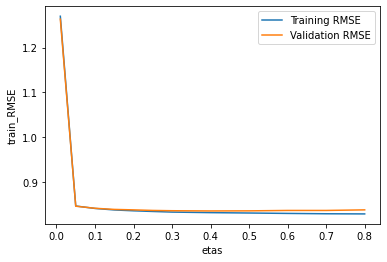

In [242]:
import seaborn as sns
sns.lineplot(x=scores["etas"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["etas"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

In [245]:
import pandas as pd
from sklearn.metrics import mean_squared_error

scores = pd.DataFrame(columns=["gamma", "train_RMSE", "test_RMSE"])

# gamma values
num_boost_round = 200

params = {
    'max_depth':2, 
    'eta':0.4, 
    'booster':'dart',
    'reg':'squarederror'
    }

gammas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

i = 0
                      
# train the model
for gamma in gammas:
    
    print(gamma)
    scores.at[i,"gammas"] = gamma         
    params["gamma"] = gamma
                      
    model = xgb.train(dtrain=dtrain, params=params, num_boost_round=num_boost_round, evals=[(dtest, "Test")])
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

0
[20:21:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:4.26013
[1]	Test-rmse:2.64503
[2]	Test-rmse:1.72744
[3]	Test-rmse:1.24179
[4]	Test-rmse:1.01178
[5]	Test-rmse:0.91497
[6]	Test-rmse:0.87705
[7]	Test-rmse:0.86257
[8]	Test-rmse:0.85664
[9]	Test-rmse:0.85372
[10]	Test-rmse:0.85208
[11]	Test-rmse:0.85113
[12]	Test-rmse:0.85035
[13]	Test-rmse:0.84963
[14]	Test-rmse:0.84920
[15]	Test-rmse:0.84864
[16]	Test-rmse:0.84814
[17]	Test-rmse:0.84778
[18]	Test-rmse:0.84742
[19]	Test-rmse:0.84699
[20]	Test-rmse:0.84669
[21]	Test-rmse:0.84648
[22]	Test-rmse:0.84614
[23]	Test-rmse:0.84566
[24]	Test-rmse:0.84537
[25]	Test-rmse:0.84496
[26]	Test-rmse:0.84471
[27]	Test-rmse:0.84451
[28]	Test-r

[121]	Test-rmse:0.83641
[122]	Test-rmse:0.83641
[123]	Test-rmse:0.83645
[124]	Test-rmse:0.83642
[125]	Test-rmse:0.83640
[126]	Test-rmse:0.83638
[127]	Test-rmse:0.83636
[128]	Test-rmse:0.83637
[129]	Test-rmse:0.83638
[130]	Test-rmse:0.83635
[131]	Test-rmse:0.83630
[132]	Test-rmse:0.83624
[133]	Test-rmse:0.83618
[134]	Test-rmse:0.83616
[135]	Test-rmse:0.83615
[136]	Test-rmse:0.83614
[137]	Test-rmse:0.83607
[138]	Test-rmse:0.83600
[139]	Test-rmse:0.83596
[140]	Test-rmse:0.83595
[141]	Test-rmse:0.83591
[142]	Test-rmse:0.83586
[143]	Test-rmse:0.83584
[144]	Test-rmse:0.83573
[145]	Test-rmse:0.83566
[146]	Test-rmse:0.83560
[147]	Test-rmse:0.83556
[148]	Test-rmse:0.83552
[149]	Test-rmse:0.83549
[150]	Test-rmse:0.83547
[151]	Test-rmse:0.83546
[152]	Test-rmse:0.83548
[153]	Test-rmse:0.83543
[154]	Test-rmse:0.83537
[155]	Test-rmse:0.83539
[156]	Test-rmse:0.83539
[157]	Test-rmse:0.83533
[158]	Test-rmse:0.83531
[159]	Test-rmse:0.83526
[160]	Test-rmse:0.83525
[161]	Test-rmse:0.83524
[162]	Test-rmse:

[40]	Test-rmse:0.84221
[41]	Test-rmse:0.84205
[42]	Test-rmse:0.84181
[43]	Test-rmse:0.84161
[44]	Test-rmse:0.84149
[45]	Test-rmse:0.84141
[46]	Test-rmse:0.84131
[47]	Test-rmse:0.84124
[48]	Test-rmse:0.84117
[49]	Test-rmse:0.84098
[50]	Test-rmse:0.84095
[51]	Test-rmse:0.84089
[52]	Test-rmse:0.84081
[53]	Test-rmse:0.84061
[54]	Test-rmse:0.84055
[55]	Test-rmse:0.84042
[56]	Test-rmse:0.84036
[57]	Test-rmse:0.84016
[58]	Test-rmse:0.84005
[59]	Test-rmse:0.83993
[60]	Test-rmse:0.83983
[61]	Test-rmse:0.83975
[62]	Test-rmse:0.83953
[63]	Test-rmse:0.83934
[64]	Test-rmse:0.83927
[65]	Test-rmse:0.83920
[66]	Test-rmse:0.83917
[67]	Test-rmse:0.83914
[68]	Test-rmse:0.83902
[69]	Test-rmse:0.83898
[70]	Test-rmse:0.83893
[71]	Test-rmse:0.83890
[72]	Test-rmse:0.83882
[73]	Test-rmse:0.83874
[74]	Test-rmse:0.83869
[75]	Test-rmse:0.83854
[76]	Test-rmse:0.83847
[77]	Test-rmse:0.83845
[78]	Test-rmse:0.83833
[79]	Test-rmse:0.83825
[80]	Test-rmse:0.83817
[81]	Test-rmse:0.83813
[82]	Test-rmse:0.83812
[83]	Test-r

[174]	Test-rmse:0.83561
[175]	Test-rmse:0.83561
[176]	Test-rmse:0.83561
[177]	Test-rmse:0.83561
[178]	Test-rmse:0.83561
[179]	Test-rmse:0.83561
[180]	Test-rmse:0.83561
[181]	Test-rmse:0.83561
[182]	Test-rmse:0.83561
[183]	Test-rmse:0.83561
[184]	Test-rmse:0.83561
[185]	Test-rmse:0.83561
[186]	Test-rmse:0.83561
[187]	Test-rmse:0.83561
[188]	Test-rmse:0.83561
[189]	Test-rmse:0.83561
[190]	Test-rmse:0.83561
[191]	Test-rmse:0.83561
[192]	Test-rmse:0.83561
[193]	Test-rmse:0.83561
[194]	Test-rmse:0.83561
[195]	Test-rmse:0.83561
[196]	Test-rmse:0.83561
[197]	Test-rmse:0.83561
[198]	Test-rmse:0.83561
[199]	Test-rmse:0.83561
5
[20:24:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:4.26013

[95]	Test-rmse:0.83731
[96]	Test-rmse:0.83727
[97]	Test-rmse:0.83724
[98]	Test-rmse:0.83722
[99]	Test-rmse:0.83717
[100]	Test-rmse:0.83716
[101]	Test-rmse:0.83708
[102]	Test-rmse:0.83705
[103]	Test-rmse:0.83697
[104]	Test-rmse:0.83689
[105]	Test-rmse:0.83686
[106]	Test-rmse:0.83686
[107]	Test-rmse:0.83680
[108]	Test-rmse:0.83679
[109]	Test-rmse:0.83669
[110]	Test-rmse:0.83666
[111]	Test-rmse:0.83659
[112]	Test-rmse:0.83658
[113]	Test-rmse:0.83656
[114]	Test-rmse:0.83652
[115]	Test-rmse:0.83651
[116]	Test-rmse:0.83648
[117]	Test-rmse:0.83647
[118]	Test-rmse:0.83644
[119]	Test-rmse:0.83644
[120]	Test-rmse:0.83644
[121]	Test-rmse:0.83644
[122]	Test-rmse:0.83644
[123]	Test-rmse:0.83644
[124]	Test-rmse:0.83644
[125]	Test-rmse:0.83644
[126]	Test-rmse:0.83644
[127]	Test-rmse:0.83644
[128]	Test-rmse:0.83644
[129]	Test-rmse:0.83644
[130]	Test-rmse:0.83644
[131]	Test-rmse:0.83644
[132]	Test-rmse:0.83644
[133]	Test-rmse:0.83644
[134]	Test-rmse:0.83644
[135]	Test-rmse:0.83644
[136]	Test-rmse:0.836

[13]	Test-rmse:0.84963
[14]	Test-rmse:0.84920
[15]	Test-rmse:0.84864
[16]	Test-rmse:0.84814
[17]	Test-rmse:0.84778
[18]	Test-rmse:0.84742
[19]	Test-rmse:0.84699
[20]	Test-rmse:0.84669
[21]	Test-rmse:0.84648
[22]	Test-rmse:0.84614
[23]	Test-rmse:0.84566
[24]	Test-rmse:0.84537
[25]	Test-rmse:0.84496
[26]	Test-rmse:0.84471
[27]	Test-rmse:0.84451
[28]	Test-rmse:0.84423
[29]	Test-rmse:0.84404
[30]	Test-rmse:0.84381
[31]	Test-rmse:0.84375
[32]	Test-rmse:0.84358
[33]	Test-rmse:0.84337
[34]	Test-rmse:0.84317
[35]	Test-rmse:0.84306
[36]	Test-rmse:0.84288
[37]	Test-rmse:0.84267
[38]	Test-rmse:0.84245
[39]	Test-rmse:0.84237
[40]	Test-rmse:0.84221
[41]	Test-rmse:0.84205
[42]	Test-rmse:0.84181
[43]	Test-rmse:0.84161
[44]	Test-rmse:0.84149
[45]	Test-rmse:0.84141
[46]	Test-rmse:0.84131
[47]	Test-rmse:0.84124
[48]	Test-rmse:0.84117
[49]	Test-rmse:0.84098
[50]	Test-rmse:0.84095
[51]	Test-rmse:0.84089
[52]	Test-rmse:0.84081
[53]	Test-rmse:0.84061
[54]	Test-rmse:0.84055
[55]	Test-rmse:0.84042
[56]	Test-r

[148]	Test-rmse:0.83774
[149]	Test-rmse:0.83774
[150]	Test-rmse:0.83774
[151]	Test-rmse:0.83774
[152]	Test-rmse:0.83774
[153]	Test-rmse:0.83774
[154]	Test-rmse:0.83774
[155]	Test-rmse:0.83774
[156]	Test-rmse:0.83774
[157]	Test-rmse:0.83774
[158]	Test-rmse:0.83774
[159]	Test-rmse:0.83774
[160]	Test-rmse:0.83774
[161]	Test-rmse:0.83774
[162]	Test-rmse:0.83774
[163]	Test-rmse:0.83774
[164]	Test-rmse:0.83774
[165]	Test-rmse:0.83774
[166]	Test-rmse:0.83774
[167]	Test-rmse:0.83774
[168]	Test-rmse:0.83774
[169]	Test-rmse:0.83774
[170]	Test-rmse:0.83774
[171]	Test-rmse:0.83774
[172]	Test-rmse:0.83774
[173]	Test-rmse:0.83774
[174]	Test-rmse:0.83774
[175]	Test-rmse:0.83774
[176]	Test-rmse:0.83774
[177]	Test-rmse:0.83774
[178]	Test-rmse:0.83774
[179]	Test-rmse:0.83774
[180]	Test-rmse:0.83774
[181]	Test-rmse:0.83774
[182]	Test-rmse:0.83774
[183]	Test-rmse:0.83774
[184]	Test-rmse:0.83774
[185]	Test-rmse:0.83774
[186]	Test-rmse:0.83774
[187]	Test-rmse:0.83774
[188]	Test-rmse:0.83774
[189]	Test-rmse:

<AxesSubplot:xlabel='gammas', ylabel='train_RMSE'>

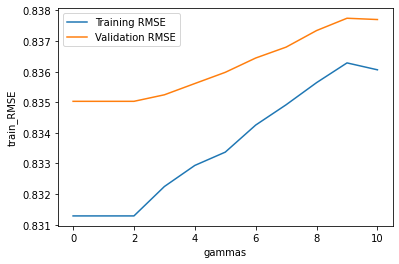

In [246]:
import seaborn as sns
sns.lineplot(x=scores["gammas"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["gammas"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

In [250]:
import pandas as pd
from sklearn.metrics import mean_squared_error

scores = pd.DataFrame(columns=["max_depth", "train_RMSE", "test_RMSE"])

# max_depth values
num_boost_round = 200

params = {
    'max_depth':2, 
    'eta':0.4, 
    'booster':'dart',
    'reg':'squarederror'
    }

max_depths = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

i = 0
                      
# train the model
for max_depth in max_depths:
    
    print(max_depth)
    scores.at[i,"max_depths"] = max_depth         
    params["max_depth"] = max_depth
                      
    model = xgb.train(dtrain=dtrain, params=params, num_boost_round=num_boost_round, evals=[(dtest, "Test")])
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

0
[20:43:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:4.26102
[1]	Test-rmse:2.64730
[2]	Test-rmse:1.73256
[3]	Test-rmse:1.25044
[4]	Test-rmse:1.02388
[5]	Test-rmse:0.92970
[6]	Test-rmse:0.89386
[7]	Test-rmse:0.88091
[8]	Test-rmse:0.87639
[9]	Test-rmse:0.87486
[10]	Test-rmse:0.87438
[11]	Test-rmse:0.87425
[12]	Test-rmse:0.87422
[13]	Test-rmse:0.87423
[14]	Test-rmse:0.87424
[15]	Test-rmse:0.87425
[16]	Test-rmse:0.87425
[17]	Test-rmse:0.87426
[18]	Test-rmse:0.87426
[19]	Test-rmse:0.87426
[20]	Test-rmse:0.87426
[21]	Test-rmse:0.87426
[22]	Test-rmse:0.87426
[23]	Test-rmse:0.87426
[24]	Test-rmse:0.87426
[25]	Test-rmse:0.87426
[26]	Test-rmse:0.87426
[27]	Test-rmse:0.87426
[28]	Test-r

[121]	Test-rmse:0.84171
[122]	Test-rmse:0.84167
[123]	Test-rmse:0.84165
[124]	Test-rmse:0.84160
[125]	Test-rmse:0.84158
[126]	Test-rmse:0.84155
[127]	Test-rmse:0.84152
[128]	Test-rmse:0.84154
[129]	Test-rmse:0.84150
[130]	Test-rmse:0.84147
[131]	Test-rmse:0.84142
[132]	Test-rmse:0.84143
[133]	Test-rmse:0.84138
[134]	Test-rmse:0.84137
[135]	Test-rmse:0.84132
[136]	Test-rmse:0.84129
[137]	Test-rmse:0.84126
[138]	Test-rmse:0.84121
[139]	Test-rmse:0.84122
[140]	Test-rmse:0.84117
[141]	Test-rmse:0.84115
[142]	Test-rmse:0.84113
[143]	Test-rmse:0.84108
[144]	Test-rmse:0.84104
[145]	Test-rmse:0.84101
[146]	Test-rmse:0.84097
[147]	Test-rmse:0.84098
[148]	Test-rmse:0.84096
[149]	Test-rmse:0.84094
[150]	Test-rmse:0.84091
[151]	Test-rmse:0.84091
[152]	Test-rmse:0.84089
[153]	Test-rmse:0.84085
[154]	Test-rmse:0.84085
[155]	Test-rmse:0.84082
[156]	Test-rmse:0.84076
[157]	Test-rmse:0.84073
[158]	Test-rmse:0.84073
[159]	Test-rmse:0.84071
[160]	Test-rmse:0.84070
[161]	Test-rmse:0.84066
[162]	Test-rmse:

[40]	Test-rmse:0.83893
[41]	Test-rmse:0.83883
[42]	Test-rmse:0.83874
[43]	Test-rmse:0.83866
[44]	Test-rmse:0.83854
[45]	Test-rmse:0.83850
[46]	Test-rmse:0.83837
[47]	Test-rmse:0.83829
[48]	Test-rmse:0.83824
[49]	Test-rmse:0.83796
[50]	Test-rmse:0.83784
[51]	Test-rmse:0.83777
[52]	Test-rmse:0.83767
[53]	Test-rmse:0.83757
[54]	Test-rmse:0.83748
[55]	Test-rmse:0.83743
[56]	Test-rmse:0.83736
[57]	Test-rmse:0.83733
[58]	Test-rmse:0.83731
[59]	Test-rmse:0.83727
[60]	Test-rmse:0.83723
[61]	Test-rmse:0.83719
[62]	Test-rmse:0.83710
[63]	Test-rmse:0.83702
[64]	Test-rmse:0.83701
[65]	Test-rmse:0.83688
[66]	Test-rmse:0.83677
[67]	Test-rmse:0.83667
[68]	Test-rmse:0.83668
[69]	Test-rmse:0.83664
[70]	Test-rmse:0.83659
[71]	Test-rmse:0.83659
[72]	Test-rmse:0.83649
[73]	Test-rmse:0.83646
[74]	Test-rmse:0.83647
[75]	Test-rmse:0.83649
[76]	Test-rmse:0.83640
[77]	Test-rmse:0.83640
[78]	Test-rmse:0.83637
[79]	Test-rmse:0.83635
[80]	Test-rmse:0.83633
[81]	Test-rmse:0.83634
[82]	Test-rmse:0.83628
[83]	Test-r

[174]	Test-rmse:0.83773
[175]	Test-rmse:0.83772
[176]	Test-rmse:0.83772
[177]	Test-rmse:0.83774
[178]	Test-rmse:0.83776
[179]	Test-rmse:0.83778
[180]	Test-rmse:0.83774
[181]	Test-rmse:0.83778
[182]	Test-rmse:0.83779
[183]	Test-rmse:0.83779
[184]	Test-rmse:0.83780
[185]	Test-rmse:0.83780
[186]	Test-rmse:0.83783
[187]	Test-rmse:0.83783
[188]	Test-rmse:0.83783
[189]	Test-rmse:0.83783
[190]	Test-rmse:0.83788
[191]	Test-rmse:0.83787
[192]	Test-rmse:0.83789
[193]	Test-rmse:0.83792
[194]	Test-rmse:0.83794
[195]	Test-rmse:0.83797
[196]	Test-rmse:0.83798
[197]	Test-rmse:0.83798
[198]	Test-rmse:0.83797
[199]	Test-rmse:0.83797
5
[20:45:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:4.25969

[95]	Test-rmse:0.84238
[96]	Test-rmse:0.84244
[97]	Test-rmse:0.84246
[98]	Test-rmse:0.84249
[99]	Test-rmse:0.84253
[100]	Test-rmse:0.84253
[101]	Test-rmse:0.84262
[102]	Test-rmse:0.84283
[103]	Test-rmse:0.84288
[104]	Test-rmse:0.84292
[105]	Test-rmse:0.84291
[106]	Test-rmse:0.84297
[107]	Test-rmse:0.84315
[108]	Test-rmse:0.84336
[109]	Test-rmse:0.84336
[110]	Test-rmse:0.84344
[111]	Test-rmse:0.84360
[112]	Test-rmse:0.84364
[113]	Test-rmse:0.84373
[114]	Test-rmse:0.84379
[115]	Test-rmse:0.84381
[116]	Test-rmse:0.84391
[117]	Test-rmse:0.84390
[118]	Test-rmse:0.84396
[119]	Test-rmse:0.84408
[120]	Test-rmse:0.84414
[121]	Test-rmse:0.84422
[122]	Test-rmse:0.84432
[123]	Test-rmse:0.84435
[124]	Test-rmse:0.84449
[125]	Test-rmse:0.84448
[126]	Test-rmse:0.84457
[127]	Test-rmse:0.84460
[128]	Test-rmse:0.84471
[129]	Test-rmse:0.84475
[130]	Test-rmse:0.84471
[131]	Test-rmse:0.84480
[132]	Test-rmse:0.84483
[133]	Test-rmse:0.84484
[134]	Test-rmse:0.84487
[135]	Test-rmse:0.84497
[136]	Test-rmse:0.845

[13]	Test-rmse:0.84264
[14]	Test-rmse:0.84255
[15]	Test-rmse:0.84245
[16]	Test-rmse:0.84237
[17]	Test-rmse:0.84250
[18]	Test-rmse:0.84259
[19]	Test-rmse:0.84291
[20]	Test-rmse:0.84299
[21]	Test-rmse:0.84311
[22]	Test-rmse:0.84331
[23]	Test-rmse:0.84343
[24]	Test-rmse:0.84357
[25]	Test-rmse:0.84366
[26]	Test-rmse:0.84402
[27]	Test-rmse:0.84417
[28]	Test-rmse:0.84427
[29]	Test-rmse:0.84439
[30]	Test-rmse:0.84466
[31]	Test-rmse:0.84474
[32]	Test-rmse:0.84481
[33]	Test-rmse:0.84501
[34]	Test-rmse:0.84501
[35]	Test-rmse:0.84521
[36]	Test-rmse:0.84545
[37]	Test-rmse:0.84561
[38]	Test-rmse:0.84570
[39]	Test-rmse:0.84588
[40]	Test-rmse:0.84607
[41]	Test-rmse:0.84618
[42]	Test-rmse:0.84624
[43]	Test-rmse:0.84638
[44]	Test-rmse:0.84634
[45]	Test-rmse:0.84654
[46]	Test-rmse:0.84682
[47]	Test-rmse:0.84694
[48]	Test-rmse:0.84711
[49]	Test-rmse:0.84721
[50]	Test-rmse:0.84734
[51]	Test-rmse:0.84741
[52]	Test-rmse:0.84750
[53]	Test-rmse:0.84756
[54]	Test-rmse:0.84770
[55]	Test-rmse:0.84787
[56]	Test-r

[148]	Test-rmse:0.86770
[149]	Test-rmse:0.86773
[150]	Test-rmse:0.86804
[151]	Test-rmse:0.86816
[152]	Test-rmse:0.86832
[153]	Test-rmse:0.86840
[154]	Test-rmse:0.86857
[155]	Test-rmse:0.86867
[156]	Test-rmse:0.86880
[157]	Test-rmse:0.86888
[158]	Test-rmse:0.86894
[159]	Test-rmse:0.86908
[160]	Test-rmse:0.86925
[161]	Test-rmse:0.86942
[162]	Test-rmse:0.86944
[163]	Test-rmse:0.86951
[164]	Test-rmse:0.86974
[165]	Test-rmse:0.86981
[166]	Test-rmse:0.86986
[167]	Test-rmse:0.86988
[168]	Test-rmse:0.87010
[169]	Test-rmse:0.87022
[170]	Test-rmse:0.87029
[171]	Test-rmse:0.87033
[172]	Test-rmse:0.87033
[173]	Test-rmse:0.87043
[174]	Test-rmse:0.87072
[175]	Test-rmse:0.87077
[176]	Test-rmse:0.87087
[177]	Test-rmse:0.87109
[178]	Test-rmse:0.87117
[179]	Test-rmse:0.87125
[180]	Test-rmse:0.87130
[181]	Test-rmse:0.87146
[182]	Test-rmse:0.87144
[183]	Test-rmse:0.87149
[184]	Test-rmse:0.87156
[185]	Test-rmse:0.87170
[186]	Test-rmse:0.87175
[187]	Test-rmse:0.87194
[188]	Test-rmse:0.87197
[189]	Test-rmse:

<AxesSubplot:xlabel='max_depths', ylabel='train_RMSE'>

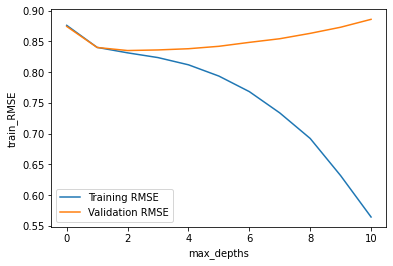

In [251]:
import seaborn as sns
sns.lineplot(x=scores["max_depths"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["max_depths"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

In [258]:
import pandas as pd
from sklearn.metrics import mean_squared_error

scores = pd.DataFrame(columns=["colsample_bytrees", "train_RMSE", "test_RMSE"])

# colsample_bytree
num_boost_round = 200

params = {
    'max_depth':1, 
    'eta':0.4, 
    'booster':'dart',
    'reg':'squarederror'
    }

colsample_bytrees = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

i = 0
                      
# train the model
for colsample_bytree in colsample_bytrees:
    
    print(colsample_bytree)
    scores.at[i,"colsample_bytrees"] = colsample_bytree         
    params["colsample_bytree"] = colsample_bytree
                      
    %time model = xgb.train(dtrain=dtrain, params=params, num_boost_round=num_boost_round, evals=[(dtest, "Test")])
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

0.1
[21:08:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:4.26096
[1]	Test-rmse:2.64676
[2]	Test-rmse:1.73034
[3]	Test-rmse:1.24497
[4]	Test-rmse:1.01602
[5]	Test-rmse:0.92041
[6]	Test-rmse:0.88392
[7]	Test-rmse:0.87014
[8]	Test-rmse:0.86428
[9]	Test-rmse:0.86193
[10]	Test-rmse:0.86076
[11]	Test-rmse:0.86032
[12]	Test-rmse:0.85978
[13]	Test-rmse:0.85910
[14]	Test-rmse:0.85850
[15]	Test-rmse:0.85751
[16]	Test-rmse:0.85727
[17]	Test-rmse:0.85699
[18]	Test-rmse:0.85670
[19]	Test-rmse:0.85605
[20]	Test-rmse:0.85543
[21]	Test-rmse:0.85504
[22]	Test-rmse:0.85474
[23]	Test-rmse:0.85411
[24]	Test-rmse:0.85358
[25]	Test-rmse:0.85332
[26]	Test-rmse:0.85271
[27]	Test-rmse:0.85245
[28]	Test

[118]	Test-rmse:0.84203
[119]	Test-rmse:0.84197
[120]	Test-rmse:0.84191
[121]	Test-rmse:0.84189
[122]	Test-rmse:0.84183
[123]	Test-rmse:0.84179
[124]	Test-rmse:0.84176
[125]	Test-rmse:0.84170
[126]	Test-rmse:0.84164
[127]	Test-rmse:0.84163
[128]	Test-rmse:0.84165
[129]	Test-rmse:0.84162
[130]	Test-rmse:0.84161
[131]	Test-rmse:0.84155
[132]	Test-rmse:0.84154
[133]	Test-rmse:0.84152
[134]	Test-rmse:0.84151
[135]	Test-rmse:0.84147
[136]	Test-rmse:0.84145
[137]	Test-rmse:0.84143
[138]	Test-rmse:0.84139
[139]	Test-rmse:0.84136
[140]	Test-rmse:0.84134
[141]	Test-rmse:0.84135
[142]	Test-rmse:0.84132
[143]	Test-rmse:0.84127
[144]	Test-rmse:0.84125
[145]	Test-rmse:0.84123
[146]	Test-rmse:0.84118
[147]	Test-rmse:0.84115
[148]	Test-rmse:0.84113
[149]	Test-rmse:0.84108
[150]	Test-rmse:0.84106
[151]	Test-rmse:0.84102
[152]	Test-rmse:0.84097
[153]	Test-rmse:0.84094
[154]	Test-rmse:0.84095
[155]	Test-rmse:0.84095
[156]	Test-rmse:0.84093
[157]	Test-rmse:0.84091
[158]	Test-rmse:0.84089
[159]	Test-rmse:

[30]	Test-rmse:0.85020
[31]	Test-rmse:0.84999
[32]	Test-rmse:0.84974
[33]	Test-rmse:0.84952
[34]	Test-rmse:0.84923
[35]	Test-rmse:0.84896
[36]	Test-rmse:0.84869
[37]	Test-rmse:0.84848
[38]	Test-rmse:0.84823
[39]	Test-rmse:0.84798
[40]	Test-rmse:0.84782
[41]	Test-rmse:0.84768
[42]	Test-rmse:0.84750
[43]	Test-rmse:0.84735
[44]	Test-rmse:0.84715
[45]	Test-rmse:0.84701
[46]	Test-rmse:0.84693
[47]	Test-rmse:0.84677
[48]	Test-rmse:0.84656
[49]	Test-rmse:0.84645
[50]	Test-rmse:0.84627
[51]	Test-rmse:0.84620
[52]	Test-rmse:0.84607
[53]	Test-rmse:0.84596
[54]	Test-rmse:0.84579
[55]	Test-rmse:0.84566
[56]	Test-rmse:0.84558
[57]	Test-rmse:0.84546
[58]	Test-rmse:0.84534
[59]	Test-rmse:0.84518
[60]	Test-rmse:0.84510
[61]	Test-rmse:0.84501
[62]	Test-rmse:0.84486
[63]	Test-rmse:0.84477
[64]	Test-rmse:0.84466
[65]	Test-rmse:0.84458
[66]	Test-rmse:0.84445
[67]	Test-rmse:0.84442
[68]	Test-rmse:0.84435
[69]	Test-rmse:0.84423
[70]	Test-rmse:0.84417
[71]	Test-rmse:0.84407
[72]	Test-rmse:0.84398
[73]	Test-r

[162]	Test-rmse:0.84062
[163]	Test-rmse:0.84059
[164]	Test-rmse:0.84060
[165]	Test-rmse:0.84055
[166]	Test-rmse:0.84053
[167]	Test-rmse:0.84050
[168]	Test-rmse:0.84048
[169]	Test-rmse:0.84047
[170]	Test-rmse:0.84044
[171]	Test-rmse:0.84042
[172]	Test-rmse:0.84040
[173]	Test-rmse:0.84036
[174]	Test-rmse:0.84037
[175]	Test-rmse:0.84035
[176]	Test-rmse:0.84034
[177]	Test-rmse:0.84033
[178]	Test-rmse:0.84031
[179]	Test-rmse:0.84032
[180]	Test-rmse:0.84030
[181]	Test-rmse:0.84027
[182]	Test-rmse:0.84025
[183]	Test-rmse:0.84025
[184]	Test-rmse:0.84024
[185]	Test-rmse:0.84022
[186]	Test-rmse:0.84018
[187]	Test-rmse:0.84015
[188]	Test-rmse:0.84014
[189]	Test-rmse:0.84015
[190]	Test-rmse:0.84013
[191]	Test-rmse:0.84009
[192]	Test-rmse:0.84006
[193]	Test-rmse:0.84006
[194]	Test-rmse:0.84004
[195]	Test-rmse:0.84002
[196]	Test-rmse:0.83999
[197]	Test-rmse:0.83995
[198]	Test-rmse:0.83993
[199]	Test-rmse:0.83991
CPU times: user 3min 6s, sys: 1.65 s, total: 3min 8s
Wall time: 17.2 s
0.6
[21:09:22] WA

[76]	Test-rmse:0.84383
[77]	Test-rmse:0.84372
[78]	Test-rmse:0.84367
[79]	Test-rmse:0.84358
[80]	Test-rmse:0.84352
[81]	Test-rmse:0.84343
[82]	Test-rmse:0.84340
[83]	Test-rmse:0.84333
[84]	Test-rmse:0.84329
[85]	Test-rmse:0.84323
[86]	Test-rmse:0.84319
[87]	Test-rmse:0.84312
[88]	Test-rmse:0.84310
[89]	Test-rmse:0.84304
[90]	Test-rmse:0.84301
[91]	Test-rmse:0.84297
[92]	Test-rmse:0.84288
[93]	Test-rmse:0.84284
[94]	Test-rmse:0.84276
[95]	Test-rmse:0.84273
[96]	Test-rmse:0.84271
[97]	Test-rmse:0.84266
[98]	Test-rmse:0.84262
[99]	Test-rmse:0.84261
[100]	Test-rmse:0.84254
[101]	Test-rmse:0.84247
[102]	Test-rmse:0.84239
[103]	Test-rmse:0.84232
[104]	Test-rmse:0.84227
[105]	Test-rmse:0.84223
[106]	Test-rmse:0.84218
[107]	Test-rmse:0.84216
[108]	Test-rmse:0.84215
[109]	Test-rmse:0.84211
[110]	Test-rmse:0.84208
[111]	Test-rmse:0.84207
[112]	Test-rmse:0.84204
[113]	Test-rmse:0.84202
[114]	Test-rmse:0.84196
[115]	Test-rmse:0.84194
[116]	Test-rmse:0.84190
[117]	Test-rmse:0.84186
[118]	Test-rmse:

[1]	Test-rmse:2.64560
[2]	Test-rmse:1.72927
[3]	Test-rmse:1.24477
[4]	Test-rmse:1.01578
[5]	Test-rmse:0.91979
[6]	Test-rmse:0.88226
[7]	Test-rmse:0.86814
[8]	Test-rmse:0.86268
[9]	Test-rmse:0.86047
[10]	Test-rmse:0.85936
[11]	Test-rmse:0.85845
[12]	Test-rmse:0.85784
[13]	Test-rmse:0.85714
[14]	Test-rmse:0.85647
[15]	Test-rmse:0.85591
[16]	Test-rmse:0.85529
[17]	Test-rmse:0.85466
[18]	Test-rmse:0.85414
[19]	Test-rmse:0.85353
[20]	Test-rmse:0.85297
[21]	Test-rmse:0.85270
[22]	Test-rmse:0.85231
[23]	Test-rmse:0.85205
[24]	Test-rmse:0.85178
[25]	Test-rmse:0.85151
[26]	Test-rmse:0.85132
[27]	Test-rmse:0.85092
[28]	Test-rmse:0.85062
[29]	Test-rmse:0.85035
[30]	Test-rmse:0.85008
[31]	Test-rmse:0.84980
[32]	Test-rmse:0.84959
[33]	Test-rmse:0.84940
[34]	Test-rmse:0.84923
[35]	Test-rmse:0.84897
[36]	Test-rmse:0.84866
[37]	Test-rmse:0.84842
[38]	Test-rmse:0.84830
[39]	Test-rmse:0.84804
[40]	Test-rmse:0.84780
[41]	Test-rmse:0.84762
[42]	Test-rmse:0.84743
[43]	Test-rmse:0.84723
[44]	Test-rmse:0.847

<AxesSubplot:xlabel='colsample_bytrees', ylabel='train_RMSE'>

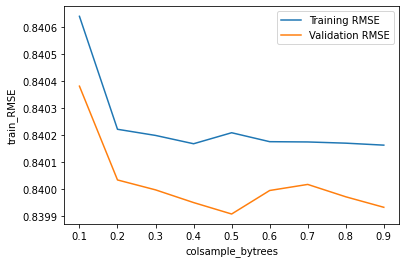

In [259]:
import seaborn as sns
sns.lineplot(x=scores["colsample_bytrees"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["colsample_bytrees"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

In [279]:
import pandas as pd
from sklearn.metrics import mean_squared_error

scores = pd.DataFrame(columns=["rate_drops", "train_RMSE", "test_RMSE"])

# skip_drop
num_boost_round = 200

params = {
    'max_depth':1, 
    'eta':0.4, 
    'booster':'dart',
    'reg':'squarederror',
    }

rate_drops = [0, 0.1, 0.3, 0.6, 0.8, 1]

i = 0
                      
# train the model
for rate_drop in rate_drops:
    
    print(rate_drop)
    scores.at[i,"rate_drops"] = rate_drop         
    params["rate_drop"] = rate_drop
                      
    %time model = xgb.train(dtrain=dtrain, params=params, num_boost_round=num_boost_round, evals=[(dtest, "Test")])
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

0
[22:06:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:4.26052
[1]	Test-rmse:2.64560
[2]	Test-rmse:1.72927
[3]	Test-rmse:1.24477
[4]	Test-rmse:1.01578
[5]	Test-rmse:0.91979
[6]	Test-rmse:0.88226
[7]	Test-rmse:0.86814
[8]	Test-rmse:0.86268
[9]	Test-rmse:0.86047
[10]	Test-rmse:0.85919
[11]	Test-rmse:0.85845
[12]	Test-rmse:0.85784
[13]	Test-rmse:0.85714
[14]	Test-rmse:0.85648
[15]	Test-rmse:0.85585
[16]	Test-rmse:0.85529
[17]	Test-rmse:0.85466
[18]	Test-rmse:0.85407
[19]	Test-rmse:0.85348
[20]	Test-rmse:0.85296
[21]	Test-rmse:0.85268
[22]	Test-rmse:0.85230
[23]	Test-rmse:0.85204
[24]	Test-rmse:0.85177
[25]	Test-rmse:0.85150
[26]	Test-rmse:0.85131
[27]	Test-rmse:0.85093
[28]	Test-r

[118]	Test-rmse:0.85357
[119]	Test-rmse:0.85358
[120]	Test-rmse:0.85357
[121]	Test-rmse:0.85355
[122]	Test-rmse:0.85354
[123]	Test-rmse:0.85355
[124]	Test-rmse:0.85356
[125]	Test-rmse:0.85357
[126]	Test-rmse:0.85357
[127]	Test-rmse:0.85355
[128]	Test-rmse:0.85357
[129]	Test-rmse:0.85358
[130]	Test-rmse:0.85359
[131]	Test-rmse:0.85358
[132]	Test-rmse:0.85359
[133]	Test-rmse:0.85361
[134]	Test-rmse:0.85361
[135]	Test-rmse:0.85362
[136]	Test-rmse:0.85361
[137]	Test-rmse:0.85362
[138]	Test-rmse:0.85362
[139]	Test-rmse:0.85363
[140]	Test-rmse:0.85364
[141]	Test-rmse:0.85364
[142]	Test-rmse:0.85364
[143]	Test-rmse:0.85366
[144]	Test-rmse:0.85367
[145]	Test-rmse:0.85367
[146]	Test-rmse:0.85367
[147]	Test-rmse:0.85367
[148]	Test-rmse:0.85369
[149]	Test-rmse:0.85371
[150]	Test-rmse:0.85371
[151]	Test-rmse:0.85373
[152]	Test-rmse:0.85374
[153]	Test-rmse:0.85374
[154]	Test-rmse:0.85376
[155]	Test-rmse:0.85378
[156]	Test-rmse:0.85375
[157]	Test-rmse:0.85376
[158]	Test-rmse:0.85375
[159]	Test-rmse:

[30]	Test-rmse:0.90379
[31]	Test-rmse:0.90255
[32]	Test-rmse:0.90111
[33]	Test-rmse:0.89950
[34]	Test-rmse:0.89835
[35]	Test-rmse:0.89691
[36]	Test-rmse:0.89587
[37]	Test-rmse:0.89496
[38]	Test-rmse:0.89396
[39]	Test-rmse:0.89309
[40]	Test-rmse:0.89223
[41]	Test-rmse:0.89134
[42]	Test-rmse:0.89053
[43]	Test-rmse:0.88982
[44]	Test-rmse:0.88918
[45]	Test-rmse:0.88850
[46]	Test-rmse:0.88781
[47]	Test-rmse:0.88721
[48]	Test-rmse:0.88634
[49]	Test-rmse:0.88579
[50]	Test-rmse:0.88520
[51]	Test-rmse:0.88457
[52]	Test-rmse:0.88397
[53]	Test-rmse:0.88352
[54]	Test-rmse:0.88307
[55]	Test-rmse:0.88255
[56]	Test-rmse:0.88218
[57]	Test-rmse:0.88176
[58]	Test-rmse:0.88146
[59]	Test-rmse:0.88103
[60]	Test-rmse:0.88067
[61]	Test-rmse:0.88034
[62]	Test-rmse:0.87999
[63]	Test-rmse:0.87971
[64]	Test-rmse:0.87945
[65]	Test-rmse:0.87916
[66]	Test-rmse:0.87889
[67]	Test-rmse:0.87859
[68]	Test-rmse:0.87833
[69]	Test-rmse:0.87810
[70]	Test-rmse:0.87789
[71]	Test-rmse:0.87765
[72]	Test-rmse:0.87744
[73]	Test-r

[162]	Test-rmse:0.89175
[163]	Test-rmse:0.89160
[164]	Test-rmse:0.89145
[165]	Test-rmse:0.89128
[166]	Test-rmse:0.89113
[167]	Test-rmse:0.89098
[168]	Test-rmse:0.89084
[169]	Test-rmse:0.89070
[170]	Test-rmse:0.89057
[171]	Test-rmse:0.89041
[172]	Test-rmse:0.89027
[173]	Test-rmse:0.89013
[174]	Test-rmse:0.89000
[175]	Test-rmse:0.88987
[176]	Test-rmse:0.88973
[177]	Test-rmse:0.88961
[178]	Test-rmse:0.88949
[179]	Test-rmse:0.88935
[180]	Test-rmse:0.88923
[181]	Test-rmse:0.88909
[182]	Test-rmse:0.88896
[183]	Test-rmse:0.88884
[184]	Test-rmse:0.88871
[185]	Test-rmse:0.88859
[186]	Test-rmse:0.88847
[187]	Test-rmse:0.88834
[188]	Test-rmse:0.88823
[189]	Test-rmse:0.88809
[190]	Test-rmse:0.88798
[191]	Test-rmse:0.88787
[192]	Test-rmse:0.88776
[193]	Test-rmse:0.88764
[194]	Test-rmse:0.88754
[195]	Test-rmse:0.88743
[196]	Test-rmse:0.88732
[197]	Test-rmse:0.88722
[198]	Test-rmse:0.88710
[199]	Test-rmse:0.88700
CPU times: user 3min 55s, sys: 1.64 s, total: 3min 57s
Wall time: 21.6 s
1
[22:08:07] WA

<AxesSubplot:xlabel='rate_drops', ylabel='train_RMSE'>

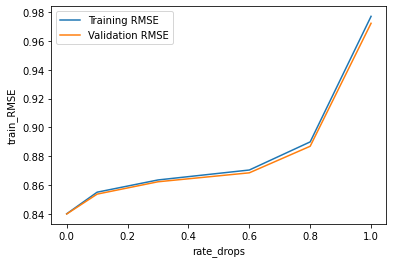

In [280]:
import seaborn as sns
sns.lineplot(x=scores["rate_drops"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["rate_drops"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

In [285]:
#final model

import pandas as pd
from sklearn.metrics import mean_squared_error

num_boost_round = 200

params = {
    'max_depth':1, 
    'eta':0.4, 
    'booster':'dart',
    'reg':'squarederror',
    'colsample_bytree':0.5
    }

i = 0
                      
xgb.train(dtrain=dtrain, params=params, num_boost_round=num_boost_round, evals=[(dtest, "Test")])
                      
print("train_RMSE " + str(mean_squared_error(y_train, model.predict(dtrain), squared=False)))
print("test_RMSE " + str(mean_squared_error(y_test, model.predict(dtest), squared=False)))

[22:26:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { reg } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-rmse:4.26052
[1]	Test-rmse:2.64560
[2]	Test-rmse:1.72927
[3]	Test-rmse:1.24499
[4]	Test-rmse:1.01593
[5]	Test-rmse:0.91965
[6]	Test-rmse:0.88250
[7]	Test-rmse:0.86837
[8]	Test-rmse:0.86278
[9]	Test-rmse:0.86058
[10]	Test-rmse:0.85947
[11]	Test-rmse:0.85857
[12]	Test-rmse:0.85784
[13]	Test-rmse:0.85714
[14]	Test-rmse:0.85660
[15]	Test-rmse:0.85593
[16]	Test-rmse:0.85525
[17]	Test-rmse:0.85470
[18]	Test-rmse:0.85406
[19]	Test-rmse:0.85348
[20]	Test-rmse:0.85323
[21]	Test-rmse:0.85284
[22]	Test-rmse:0.85239
[23]	Test-rmse:0.85211
[24]	Test-rmse:0.85185
[25]	Test-rmse:0.85159
[26]	Test-rmse:0.85132
[27]	Test-rmse:0.85094
[28]	Test-rms

In [ ]:
xgb.DMatrix(X_train, label=y_train, enable_categorical=True)

In [290]:
import datetime as datetime

X_submit_pre = preprocessor.transform(pd.read_csv("input/test.csv"))
y_submit = model.predict(xgb.DMatrix(X_submit_pre))

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/xgboost_dart_tuned_{name_add}.csv", index=False)

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [291]:
params

{'max_depth': 1,
 'eta': 0.4,
 'booster': 'dart',
 'reg': 'squarederror',
 'colsample_bytree': 0.5}

### XGBoost Part 3

In [296]:
# preprocess before XGBoost

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

import pandas as pd
train = pd.read_csv("input/train.csv")
y = train["target"]
X = train.drop(columns=["id", "target"])
X_pre = preprocessor.fit_transform(X)

In [297]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.4, shuffle=True, random_state=0)

In [298]:
import xgboost as xgb

# convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

In [299]:
# baseline model

params = {
    'eval_metric':'rmse',
    'objective':'reg:squarederror'
}

num_boost_round = 300

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:4.95026
[1]	Test-rmse:3.52127
[2]	Test-rmse:2.54223
[3]	Test-rmse:1.88418
[4]	Test-rmse:1.45613
[5]	Test-rmse:1.19048
[6]	Test-rmse:1.03490
[7]	Test-rmse:0.94900
[8]	Test-rmse:0.90316
[9]	Test-rmse:0.87915
[10]	Test-rmse:0.86700
[11]	Test-rmse:0.86055
[12]	Test-rmse:0.85696
[13]	Test-rmse:0.85501
[14]	Test-rmse:0.85407
[15]	Test-rmse:0.85301
[16]	Test-rmse:0.85242
[17]	Test-rmse:0.85209
[18]	Test-rmse:0.85175
[19]	Test-rmse:0.85151
[20]	Test-rmse:0.85129
[21]	Test-rmse:0.85120
[22]	Test-rmse:0.85110
[23]	Test-rmse:0.85102
[24]	Test-rmse:0.85073
[25]	Test-rmse:0.85061
[26]	Test-rmse:0.85038
[27]	Test-rmse:0.85034
[28]	Test-rmse:0.85009
[29]	Test-rmse:0.85002
[30]	Test-rmse:0.84991
[31]	Test-rmse:0.84998
[32]	Test-rmse:0.84993
[33]	Test-rmse:0.84981
[34]	Test-rmse:0.84974
[35]	Test-rmse:0.84966
[36]	Test-rmse:0.84959
[37]	Test-rmse:0.84944
[38]	Test-rmse:0.84920
[39]	Test-rmse:0.84913
[40]	Test-rmse:0.84911
[41]	Test-rmse:0.84910
[42]	Test-rmse:0.84911
[43]	Test-rmse:0.8491

In [300]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          4.947481        0.000280        4.947625       0.001772
1          3.518362        0.000150        3.518745       0.001838
2          2.539107        0.000096        2.539861       0.001747
3          1.880772        0.000097        1.882173       0.001682
4          1.452168        0.000201        1.454399       0.001504
5          1.185887        0.000183        1.189299       0.001164
6          1.029700        0.000222        1.034214       0.000961
7          0.942821        0.000324        0.948622       0.000886
8          0.896366        0.000322        0.903136       0.000765
9          0.871982        0.000171        0.879703       0.000874
10         0.858844        0.000189        0.867368       0.000954
11         0.851528        0.000214        0.861100       0.001078
12         0.847393        0.000148        0.857882       0.001153
13         0.844644        0.000352        0.856068       0.001154
14         0.842683        0.000309        0.854887       0.001168
15         0.841234        0.000299        0.854188       0.001277
16         0.839821        0.000346        0.853604       0.001221
17         0.838698        0.000429        0.853114       0.001177
18         0.837523        0.000307        0.852766       0.001285
19         0.836433        0.000356        0.852477       0.001269
20         0.835485        0.000180        0.852272       0.001259
21         0.834536        0.000240        0.852073       0.001235
22         0.833613        0.000191        0.851895       0.001188
23         0.832591        0.000255        0.851697       0.001260
24         0.831610        0.000188        0.851558       0.001236
25         0.830629        0.000333        0.851323       0.001175
26         0.829773        0.000362        0.851262       0.001210
27         0.828914        0.000214        0.851204       0.001150
28         0.828210        0.000262        0.851130       0.001109
29         0.827449        0.000296        0.851025       0.001062
30         0.826618        0.000382        0.850800       0.001097
31         0.825883        0.000286        0.850731       0.001086
32         0.825098        0.000334        0.850700       0.001009
33         0.824322        0.000395        0.850618       0.001003
34         0.823614        0.000476        0.850576       0.001031
35         0.822969        0.000516        0.850539       0.001052

<AxesSubplot:ylabel='train-rmse-mean'>

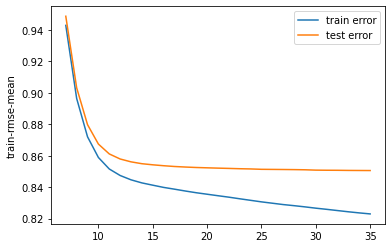

In [301]:
# plot Curve
import seaborn as sns
temp = cv_results[cv_results["train-rmse-mean"]<1]
sns.lineplot(data=temp, x=temp.index, y="train-rmse-mean", label="train error")
sns.lineplot(data=temp, x=temp.index, y="test-rmse-mean", label="test error")

In [304]:
print("Train RMSE: " + str(mean_squared_error(y_train, model.predict(dtrain), squared=False)))
print("Test RMSE: " + str(mean_squared_error(y_test, model.predict(dtest), squared=False)))

Train RMSE: 0.8176702392775351
Test RMSE: 0.8494094054529735


#### Parameters to test:
{'max_depth': 2,
 'min_child_weight': 2,
 'eta': 0.3,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'eval_metric': 'rmse',
 'objective': 'reg:squarederror'}

In [306]:
import pandas as pd
from sklearn.metrics import mean_squared_error

num_boost_round = 200

params = {
    'eval_metric':'rmse',
    'objective':'reg:squarederror'
}

num_boost_round = 300

# max_depth
scores = pd.DataFrame(columns=["max_depths", "train_RMSE", "test_RMSE"])
max_depths = [1,2,3,4,5,6,7,8,9,10]

i = 0
                      
# train the model
for max_depth in max_depths:
    
    print(max_depth)
    scores.at[i,"max_depths"] = max_depth         
    params["max_depth"] = max_depth
                      
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

1
[0]	Test-rmse:4.95098
[1]	Test-rmse:3.52287
[2]	Test-rmse:2.54530
[3]	Test-rmse:1.88943
[4]	Test-rmse:1.46385
[5]	Test-rmse:1.20090
[6]	Test-rmse:1.04765
[7]	Test-rmse:0.96327
[8]	Test-rmse:0.91849
[9]	Test-rmse:0.89543
[10]	Test-rmse:0.88367
[11]	Test-rmse:0.87738
[12]	Test-rmse:0.87397
[13]	Test-rmse:0.87203
[14]	Test-rmse:0.87081
[15]	Test-rmse:0.86993
[16]	Test-rmse:0.86923
[17]	Test-rmse:0.86863
[18]	Test-rmse:0.86807
[19]	Test-rmse:0.86756
[20]	Test-rmse:0.86698
[21]	Test-rmse:0.86657
[22]	Test-rmse:0.86612
[23]	Test-rmse:0.86585
[24]	Test-rmse:0.86547
[25]	Test-rmse:0.86518
[26]	Test-rmse:0.86486
[27]	Test-rmse:0.86459
[28]	Test-rmse:0.86430
[29]	Test-rmse:0.86398
[30]	Test-rmse:0.86372
[31]	Test-rmse:0.86348
[32]	Test-rmse:0.86318
[33]	Test-rmse:0.86288
[34]	Test-rmse:0.86259
[35]	Test-rmse:0.86230
[36]	Test-rmse:0.86208
[37]	Test-rmse:0.86189
[38]	Test-rmse:0.86168
[39]	Test-rmse:0.86148
[40]	Test-rmse:0.86126
[41]	Test-rmse:0.86107
[42]	Test-rmse:0.86086
[43]	Test-rmse:0.86

[49]	Test-rmse:0.85274
[50]	Test-rmse:0.85267
[51]	Test-rmse:0.85260
[52]	Test-rmse:0.85255
[53]	Test-rmse:0.85238
[54]	Test-rmse:0.85227
[55]	Test-rmse:0.85220
[56]	Test-rmse:0.85219
[57]	Test-rmse:0.85213
[58]	Test-rmse:0.85205
[59]	Test-rmse:0.85191
[60]	Test-rmse:0.85184
[61]	Test-rmse:0.85177
[62]	Test-rmse:0.85165
[63]	Test-rmse:0.85150
[64]	Test-rmse:0.85145
[65]	Test-rmse:0.85140
[66]	Test-rmse:0.85135
[67]	Test-rmse:0.85122
[68]	Test-rmse:0.85116
[69]	Test-rmse:0.85105
[70]	Test-rmse:0.85089
[71]	Test-rmse:0.85074
[72]	Test-rmse:0.85069
[73]	Test-rmse:0.85066
[74]	Test-rmse:0.85057
[75]	Test-rmse:0.85053
[76]	Test-rmse:0.85045
[77]	Test-rmse:0.85023
[78]	Test-rmse:0.85003
[79]	Test-rmse:0.84986
[80]	Test-rmse:0.84982
[81]	Test-rmse:0.84980
[82]	Test-rmse:0.84978
[83]	Test-rmse:0.84972
[84]	Test-rmse:0.84974
[85]	Test-rmse:0.84970
[86]	Test-rmse:0.84966
[87]	Test-rmse:0.84943
[88]	Test-rmse:0.84935
[89]	Test-rmse:0.84925
[90]	Test-rmse:0.84920
[91]	Test-rmse:0.84916
[92]	Test-r

[91]	Test-rmse:0.84610
[92]	Test-rmse:0.84603
[93]	Test-rmse:0.84605
[94]	Test-rmse:0.84608
[95]	Test-rmse:0.84609
[96]	Test-rmse:0.84610
[97]	Test-rmse:0.84612
[98]	Test-rmse:0.84611
[99]	Test-rmse:0.84613
[100]	Test-rmse:0.84613
[101]	Test-rmse:0.84608
[102]	Test-rmse:0.84609
5
[0]	Test-rmse:4.95029
[1]	Test-rmse:3.52133
[2]	Test-rmse:2.54251
[3]	Test-rmse:1.88470
[4]	Test-rmse:1.45668
[5]	Test-rmse:1.19156
[6]	Test-rmse:1.03608
[7]	Test-rmse:0.94981
[8]	Test-rmse:0.90433
[9]	Test-rmse:0.88050
[10]	Test-rmse:0.86826
[11]	Test-rmse:0.86164
[12]	Test-rmse:0.85808
[13]	Test-rmse:0.85624
[14]	Test-rmse:0.85497
[15]	Test-rmse:0.85375
[16]	Test-rmse:0.85321
[17]	Test-rmse:0.85268
[18]	Test-rmse:0.85241
[19]	Test-rmse:0.85207
[20]	Test-rmse:0.85152
[21]	Test-rmse:0.85138
[22]	Test-rmse:0.85117
[23]	Test-rmse:0.85080
[24]	Test-rmse:0.85008
[25]	Test-rmse:0.84985
[26]	Test-rmse:0.84960
[27]	Test-rmse:0.84942
[28]	Test-rmse:0.84933
[29]	Test-rmse:0.84908
[30]	Test-rmse:0.84889
[31]	Test-rmse:0

<AxesSubplot:xlabel='max_depths', ylabel='train_RMSE'>

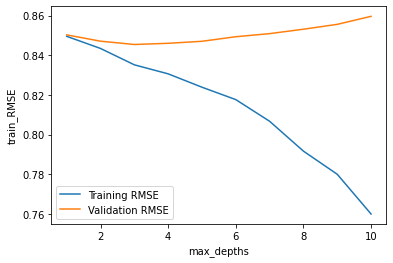

In [307]:
import seaborn as sns
sns.lineplot(x=scores["max_depths"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["max_depths"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

0.01
[0]	Test-rmse:6.94530
[1]	Test-rmse:6.87699
[2]	Test-rmse:6.80937
[3]	Test-rmse:6.74244
[4]	Test-rmse:6.67619
[5]	Test-rmse:6.61061
[6]	Test-rmse:6.54570
[7]	Test-rmse:6.48145
[8]	Test-rmse:6.41785
[9]	Test-rmse:6.35491
[10]	Test-rmse:6.29260
[11]	Test-rmse:6.23093
[12]	Test-rmse:6.16988
[13]	Test-rmse:6.10946
[14]	Test-rmse:6.04966
[15]	Test-rmse:5.99047
[16]	Test-rmse:5.93188
[17]	Test-rmse:5.87388
[18]	Test-rmse:5.81649
[19]	Test-rmse:5.75968
[20]	Test-rmse:5.70345
[21]	Test-rmse:5.64779
[22]	Test-rmse:5.59271
[23]	Test-rmse:5.53819
[24]	Test-rmse:5.48423
[25]	Test-rmse:5.43082
[26]	Test-rmse:5.37796
[27]	Test-rmse:5.32564
[28]	Test-rmse:5.27386
[29]	Test-rmse:5.22262
[30]	Test-rmse:5.17189
[31]	Test-rmse:5.12169
[32]	Test-rmse:5.07201
[33]	Test-rmse:5.02284
[34]	Test-rmse:4.97417
[35]	Test-rmse:4.92601
[36]	Test-rmse:4.87834
[37]	Test-rmse:4.83116
[38]	Test-rmse:4.78447
[39]	Test-rmse:4.73827
[40]	Test-rmse:4.69254
[41]	Test-rmse:4.64729
[42]	Test-rmse:4.60250
[43]	Test-rmse:4

[48]	Test-rmse:1.49714
[49]	Test-rmse:1.46273
[50]	Test-rmse:1.42992
[51]	Test-rmse:1.39870
[52]	Test-rmse:1.36896
[53]	Test-rmse:1.34065
[54]	Test-rmse:1.31375
[55]	Test-rmse:1.28818
[56]	Test-rmse:1.26389
[57]	Test-rmse:1.24084
[58]	Test-rmse:1.21898
[59]	Test-rmse:1.19825
[60]	Test-rmse:1.17861
[61]	Test-rmse:1.15999
[62]	Test-rmse:1.14238
[63]	Test-rmse:1.12574
[64]	Test-rmse:1.11001
[65]	Test-rmse:1.09515
[66]	Test-rmse:1.08111
[67]	Test-rmse:1.06787
[68]	Test-rmse:1.05538
[69]	Test-rmse:1.04361
[70]	Test-rmse:1.03252
[71]	Test-rmse:1.02207
[72]	Test-rmse:1.01223
[73]	Test-rmse:1.00297
[74]	Test-rmse:0.99426
[75]	Test-rmse:0.98609
[76]	Test-rmse:0.97839
[77]	Test-rmse:0.97118
[78]	Test-rmse:0.96440
[79]	Test-rmse:0.95803
[80]	Test-rmse:0.95204
[81]	Test-rmse:0.94644
[82]	Test-rmse:0.94118
[83]	Test-rmse:0.93626
[84]	Test-rmse:0.93163
[85]	Test-rmse:0.92726
[86]	Test-rmse:0.92321
[87]	Test-rmse:0.91941
[88]	Test-rmse:0.91585
[89]	Test-rmse:0.91250
[90]	Test-rmse:0.90937
[91]	Test-r

[96]	Test-rmse:0.86124
[97]	Test-rmse:0.86112
[98]	Test-rmse:0.86101
[99]	Test-rmse:0.86089
[100]	Test-rmse:0.86077
[101]	Test-rmse:0.86062
[102]	Test-rmse:0.86051
[103]	Test-rmse:0.86040
[104]	Test-rmse:0.86030
[105]	Test-rmse:0.86021
[106]	Test-rmse:0.86013
[107]	Test-rmse:0.86004
[108]	Test-rmse:0.85996
[109]	Test-rmse:0.85989
[110]	Test-rmse:0.85979
[111]	Test-rmse:0.85969
[112]	Test-rmse:0.85959
[113]	Test-rmse:0.85950
[114]	Test-rmse:0.85943
[115]	Test-rmse:0.85935
[116]	Test-rmse:0.85923
[117]	Test-rmse:0.85915
[118]	Test-rmse:0.85907
[119]	Test-rmse:0.85901
[120]	Test-rmse:0.85891
[121]	Test-rmse:0.85884
[122]	Test-rmse:0.85876
[123]	Test-rmse:0.85867
[124]	Test-rmse:0.85859
[125]	Test-rmse:0.85851
[126]	Test-rmse:0.85845
[127]	Test-rmse:0.85839
[128]	Test-rmse:0.85833
[129]	Test-rmse:0.85826
[130]	Test-rmse:0.85820
[131]	Test-rmse:0.85814
[132]	Test-rmse:0.85807
[133]	Test-rmse:0.85801
[134]	Test-rmse:0.85795
[135]	Test-rmse:0.85786
[136]	Test-rmse:0.85779
[137]	Test-rmse:0.85

[142]	Test-rmse:0.85459
[143]	Test-rmse:0.85451
[144]	Test-rmse:0.85447
[145]	Test-rmse:0.85444
[146]	Test-rmse:0.85440
[147]	Test-rmse:0.85437
[148]	Test-rmse:0.85433
[149]	Test-rmse:0.85428
[150]	Test-rmse:0.85424
[151]	Test-rmse:0.85421
[152]	Test-rmse:0.85417
[153]	Test-rmse:0.85413
[154]	Test-rmse:0.85407
[155]	Test-rmse:0.85402
[156]	Test-rmse:0.85397
[157]	Test-rmse:0.85394
[158]	Test-rmse:0.85389
[159]	Test-rmse:0.85387
[160]	Test-rmse:0.85381
[161]	Test-rmse:0.85378
[162]	Test-rmse:0.85372
[163]	Test-rmse:0.85370
[164]	Test-rmse:0.85367
[165]	Test-rmse:0.85363
[166]	Test-rmse:0.85361
[167]	Test-rmse:0.85357
[168]	Test-rmse:0.85353
[169]	Test-rmse:0.85349
[170]	Test-rmse:0.85347
[171]	Test-rmse:0.85343
[172]	Test-rmse:0.85338
[173]	Test-rmse:0.85335
[174]	Test-rmse:0.85333
[175]	Test-rmse:0.85330
[176]	Test-rmse:0.85328
[177]	Test-rmse:0.85325
[178]	Test-rmse:0.85321
[179]	Test-rmse:0.85318
[180]	Test-rmse:0.85316
[181]	Test-rmse:0.85310
[182]	Test-rmse:0.85307
[183]	Test-rmse:

[188]	Test-rmse:0.85118
[189]	Test-rmse:0.85115
[190]	Test-rmse:0.85110
[191]	Test-rmse:0.85108
[192]	Test-rmse:0.85106
[193]	Test-rmse:0.85105
[194]	Test-rmse:0.85103
[195]	Test-rmse:0.85099
[196]	Test-rmse:0.85096
[197]	Test-rmse:0.85092
[198]	Test-rmse:0.85089
[199]	Test-rmse:0.85088
[200]	Test-rmse:0.85085
[201]	Test-rmse:0.85081
[202]	Test-rmse:0.85069
[203]	Test-rmse:0.85064
[204]	Test-rmse:0.85062
[205]	Test-rmse:0.85061
[206]	Test-rmse:0.85053
[207]	Test-rmse:0.85052
[208]	Test-rmse:0.85050
[209]	Test-rmse:0.85045
[210]	Test-rmse:0.85038
[211]	Test-rmse:0.85035
[212]	Test-rmse:0.85033
[213]	Test-rmse:0.85031
[214]	Test-rmse:0.85030
[215]	Test-rmse:0.85028
[216]	Test-rmse:0.85026
[217]	Test-rmse:0.85024
[218]	Test-rmse:0.85021
[219]	Test-rmse:0.85017
[220]	Test-rmse:0.85012
[221]	Test-rmse:0.85011
[222]	Test-rmse:0.85010
[223]	Test-rmse:0.85009
[224]	Test-rmse:0.85004
[225]	Test-rmse:0.85002
[226]	Test-rmse:0.84994
[227]	Test-rmse:0.84992
[228]	Test-rmse:0.84991
[229]	Test-rmse:

[234]	Test-rmse:0.84859
[235]	Test-rmse:0.84858
[236]	Test-rmse:0.84852
[237]	Test-rmse:0.84849
[238]	Test-rmse:0.84847
[239]	Test-rmse:0.84846
[240]	Test-rmse:0.84843
[241]	Test-rmse:0.84840
[242]	Test-rmse:0.84840
[243]	Test-rmse:0.84839
[244]	Test-rmse:0.84838
[245]	Test-rmse:0.84837
[246]	Test-rmse:0.84832
[247]	Test-rmse:0.84829
[248]	Test-rmse:0.84828
[249]	Test-rmse:0.84827
[250]	Test-rmse:0.84822
[251]	Test-rmse:0.84820
[252]	Test-rmse:0.84816
[253]	Test-rmse:0.84816
[254]	Test-rmse:0.84815
[255]	Test-rmse:0.84813
[256]	Test-rmse:0.84813
[257]	Test-rmse:0.84812
[258]	Test-rmse:0.84811
[259]	Test-rmse:0.84808
[260]	Test-rmse:0.84806
[261]	Test-rmse:0.84803
[262]	Test-rmse:0.84796
[263]	Test-rmse:0.84793
[264]	Test-rmse:0.84790
[265]	Test-rmse:0.84784
[266]	Test-rmse:0.84782
[267]	Test-rmse:0.84781
[268]	Test-rmse:0.84780
[269]	Test-rmse:0.84779
[270]	Test-rmse:0.84780
[271]	Test-rmse:0.84778
[272]	Test-rmse:0.84777
[273]	Test-rmse:0.84777
[274]	Test-rmse:0.84776
[275]	Test-rmse:

[280]	Test-rmse:0.84677
[281]	Test-rmse:0.84670
[282]	Test-rmse:0.84670
[283]	Test-rmse:0.84670
[284]	Test-rmse:0.84670
[285]	Test-rmse:0.84668
[286]	Test-rmse:0.84664
[287]	Test-rmse:0.84663
[288]	Test-rmse:0.84662
[289]	Test-rmse:0.84661
[290]	Test-rmse:0.84661
[291]	Test-rmse:0.84658
[292]	Test-rmse:0.84659
[293]	Test-rmse:0.84658
[294]	Test-rmse:0.84657
[295]	Test-rmse:0.84656
[296]	Test-rmse:0.84655
[297]	Test-rmse:0.84654
[298]	Test-rmse:0.84651
[299]	Test-rmse:0.84651
0.18500000000000003
[0]	Test-rmse:5.73971
[1]	Test-rmse:4.70580
[2]	Test-rmse:3.86915
[3]	Test-rmse:3.19443
[4]	Test-rmse:2.65270
[5]	Test-rmse:2.22079
[6]	Test-rmse:1.87957
[7]	Test-rmse:1.61345
[8]	Test-rmse:1.40883
[9]	Test-rmse:1.25434
[10]	Test-rmse:1.14003
[11]	Test-rmse:1.05700
[12]	Test-rmse:0.99781
[13]	Test-rmse:0.95613
[14]	Test-rmse:0.92715
[15]	Test-rmse:0.90720
[16]	Test-rmse:0.89339
[17]	Test-rmse:0.88400
[18]	Test-rmse:0.87763
[19]	Test-rmse:0.87317
[20]	Test-rmse:0.87005
[21]	Test-rmse:0.86784
[22]

[26]	Test-rmse:0.86077
[27]	Test-rmse:0.86043
[28]	Test-rmse:0.86007
[29]	Test-rmse:0.85965
[30]	Test-rmse:0.85933
[31]	Test-rmse:0.85912
[32]	Test-rmse:0.85884
[33]	Test-rmse:0.85854
[34]	Test-rmse:0.85827
[35]	Test-rmse:0.85797
[36]	Test-rmse:0.85775
[37]	Test-rmse:0.85756
[38]	Test-rmse:0.85733
[39]	Test-rmse:0.85714
[40]	Test-rmse:0.85697
[41]	Test-rmse:0.85677
[42]	Test-rmse:0.85662
[43]	Test-rmse:0.85641
[44]	Test-rmse:0.85620
[45]	Test-rmse:0.85601
[46]	Test-rmse:0.85590
[47]	Test-rmse:0.85577
[48]	Test-rmse:0.85561
[49]	Test-rmse:0.85539
[50]	Test-rmse:0.85528
[51]	Test-rmse:0.85513
[52]	Test-rmse:0.85497
[53]	Test-rmse:0.85481
[54]	Test-rmse:0.85466
[55]	Test-rmse:0.85450
[56]	Test-rmse:0.85438
[57]	Test-rmse:0.85429
[58]	Test-rmse:0.85420
[59]	Test-rmse:0.85409
[60]	Test-rmse:0.85395
[61]	Test-rmse:0.85389
[62]	Test-rmse:0.85381
[63]	Test-rmse:0.85370
[64]	Test-rmse:0.85361
[65]	Test-rmse:0.85342
[66]	Test-rmse:0.85331
[67]	Test-rmse:0.85325
[68]	Test-rmse:0.85320
[69]	Test-r

[74]	Test-rmse:0.85240
[75]	Test-rmse:0.85234
[76]	Test-rmse:0.85217
[77]	Test-rmse:0.85208
[78]	Test-rmse:0.85204
[79]	Test-rmse:0.85197
[80]	Test-rmse:0.85188
[81]	Test-rmse:0.85182
[82]	Test-rmse:0.85178
[83]	Test-rmse:0.85163
[84]	Test-rmse:0.85155
[85]	Test-rmse:0.85144
[86]	Test-rmse:0.85132
[87]	Test-rmse:0.85111
[88]	Test-rmse:0.85102
[89]	Test-rmse:0.85093
[90]	Test-rmse:0.85080
[91]	Test-rmse:0.85076
[92]	Test-rmse:0.85074
[93]	Test-rmse:0.85073
[94]	Test-rmse:0.85069
[95]	Test-rmse:0.85067
[96]	Test-rmse:0.85063
[97]	Test-rmse:0.85053
[98]	Test-rmse:0.85047
[99]	Test-rmse:0.85044
[100]	Test-rmse:0.85038
[101]	Test-rmse:0.85035
[102]	Test-rmse:0.85032
[103]	Test-rmse:0.85024
[104]	Test-rmse:0.85020
[105]	Test-rmse:0.85011
[106]	Test-rmse:0.85009
[107]	Test-rmse:0.85007
[108]	Test-rmse:0.85003
[109]	Test-rmse:0.84997
[110]	Test-rmse:0.84989
[111]	Test-rmse:0.84984
[112]	Test-rmse:0.84979
[113]	Test-rmse:0.84965
[114]	Test-rmse:0.84955
[115]	Test-rmse:0.84950
[116]	Test-rmse:0.

[121]	Test-rmse:0.84851
[122]	Test-rmse:0.84851
[123]	Test-rmse:0.84849
[124]	Test-rmse:0.84847
[125]	Test-rmse:0.84841
[126]	Test-rmse:0.84838
[127]	Test-rmse:0.84836
[128]	Test-rmse:0.84826
[129]	Test-rmse:0.84824
[130]	Test-rmse:0.84823
[131]	Test-rmse:0.84820
[132]	Test-rmse:0.84818
[133]	Test-rmse:0.84819
[134]	Test-rmse:0.84818
[135]	Test-rmse:0.84818
[136]	Test-rmse:0.84816
[137]	Test-rmse:0.84811
[138]	Test-rmse:0.84799
[139]	Test-rmse:0.84798
[140]	Test-rmse:0.84797
[141]	Test-rmse:0.84797
[142]	Test-rmse:0.84789
[143]	Test-rmse:0.84785
[144]	Test-rmse:0.84783
[145]	Test-rmse:0.84783
[146]	Test-rmse:0.84779
[147]	Test-rmse:0.84773
[148]	Test-rmse:0.84769
[149]	Test-rmse:0.84764
[150]	Test-rmse:0.84759
[151]	Test-rmse:0.84756
[152]	Test-rmse:0.84753
[153]	Test-rmse:0.84746
[154]	Test-rmse:0.84734
[155]	Test-rmse:0.84734
[156]	Test-rmse:0.84732
[157]	Test-rmse:0.84728
[158]	Test-rmse:0.84728
[159]	Test-rmse:0.84728
[160]	Test-rmse:0.84726
[161]	Test-rmse:0.84713
[162]	Test-rmse:

[175]	Test-rmse:0.84661
[176]	Test-rmse:0.84660
[177]	Test-rmse:0.84660
[178]	Test-rmse:0.84660
[179]	Test-rmse:0.84659
[180]	Test-rmse:0.84658
[181]	Test-rmse:0.84659
[182]	Test-rmse:0.84654
[183]	Test-rmse:0.84649
[184]	Test-rmse:0.84646
[185]	Test-rmse:0.84645
[186]	Test-rmse:0.84644
[187]	Test-rmse:0.84643
[188]	Test-rmse:0.84643
[189]	Test-rmse:0.84642
[190]	Test-rmse:0.84633
[191]	Test-rmse:0.84631
[192]	Test-rmse:0.84627
[193]	Test-rmse:0.84627
[194]	Test-rmse:0.84625
[195]	Test-rmse:0.84625
[196]	Test-rmse:0.84626
[197]	Test-rmse:0.84626
[198]	Test-rmse:0.84627
[199]	Test-rmse:0.84623
[200]	Test-rmse:0.84623
[201]	Test-rmse:0.84623
[202]	Test-rmse:0.84623
[203]	Test-rmse:0.84620
[204]	Test-rmse:0.84619
[205]	Test-rmse:0.84618
[206]	Test-rmse:0.84615
[207]	Test-rmse:0.84610
[208]	Test-rmse:0.84609
[209]	Test-rmse:0.84604
[210]	Test-rmse:0.84597
[211]	Test-rmse:0.84591
[212]	Test-rmse:0.84588
[213]	Test-rmse:0.84589
[214]	Test-rmse:0.84586
[215]	Test-rmse:0.84586
[216]	Test-rmse:

[221]	Test-rmse:0.84542
[222]	Test-rmse:0.84542
[223]	Test-rmse:0.84538
[224]	Test-rmse:0.84538
[225]	Test-rmse:0.84537
[226]	Test-rmse:0.84535
[227]	Test-rmse:0.84535
[228]	Test-rmse:0.84535
[229]	Test-rmse:0.84536
[230]	Test-rmse:0.84535
[231]	Test-rmse:0.84537
[232]	Test-rmse:0.84536
[233]	Test-rmse:0.84536
[234]	Test-rmse:0.84536
[235]	Test-rmse:0.84536
[236]	Test-rmse:0.84533
[237]	Test-rmse:0.84529
[238]	Test-rmse:0.84530
[239]	Test-rmse:0.84529
[240]	Test-rmse:0.84523
[241]	Test-rmse:0.84523
[242]	Test-rmse:0.84524
[243]	Test-rmse:0.84524
[244]	Test-rmse:0.84524
[245]	Test-rmse:0.84523
[246]	Test-rmse:0.84524
[247]	Test-rmse:0.84522
[248]	Test-rmse:0.84521
[249]	Test-rmse:0.84517
[250]	Test-rmse:0.84515
[251]	Test-rmse:0.84513
[252]	Test-rmse:0.84511
[253]	Test-rmse:0.84508
[254]	Test-rmse:0.84510
[255]	Test-rmse:0.84510
[256]	Test-rmse:0.84510
[257]	Test-rmse:0.84509
[258]	Test-rmse:0.84507
[259]	Test-rmse:0.84507
[260]	Test-rmse:0.84509
[261]	Test-rmse:0.84509
[262]	Test-rmse:

[78]	Test-rmse:0.84935
[79]	Test-rmse:0.84930
[80]	Test-rmse:0.84921
[81]	Test-rmse:0.84907
[82]	Test-rmse:0.84904
[83]	Test-rmse:0.84902
[84]	Test-rmse:0.84905
[85]	Test-rmse:0.84897
[86]	Test-rmse:0.84894
[87]	Test-rmse:0.84885
[88]	Test-rmse:0.84880
[89]	Test-rmse:0.84876
[90]	Test-rmse:0.84875
[91]	Test-rmse:0.84864
[92]	Test-rmse:0.84859
[93]	Test-rmse:0.84858
[94]	Test-rmse:0.84857
[95]	Test-rmse:0.84855
[96]	Test-rmse:0.84850
[97]	Test-rmse:0.84848
[98]	Test-rmse:0.84850
[99]	Test-rmse:0.84849
[100]	Test-rmse:0.84842
[101]	Test-rmse:0.84842
[102]	Test-rmse:0.84837
[103]	Test-rmse:0.84835
[104]	Test-rmse:0.84833
[105]	Test-rmse:0.84829
[106]	Test-rmse:0.84822
[107]	Test-rmse:0.84811
[108]	Test-rmse:0.84811
[109]	Test-rmse:0.84805
[110]	Test-rmse:0.84805
[111]	Test-rmse:0.84802
[112]	Test-rmse:0.84796
[113]	Test-rmse:0.84783
[114]	Test-rmse:0.84782
[115]	Test-rmse:0.84778
[116]	Test-rmse:0.84777
[117]	Test-rmse:0.84777
[118]	Test-rmse:0.84778
[119]	Test-rmse:0.84772
[120]	Test-rms

[216]	Test-rmse:0.84585
[217]	Test-rmse:0.84584
[218]	Test-rmse:0.84584
[219]	Test-rmse:0.84584
[220]	Test-rmse:0.84583
[221]	Test-rmse:0.84585
[222]	Test-rmse:0.84587
[223]	Test-rmse:0.84587
[224]	Test-rmse:0.84587
0.41000000000000003
[0]	Test-rmse:4.19966
[1]	Test-rmse:2.57774
[2]	Test-rmse:1.67731
[3]	Test-rmse:1.21465
[4]	Test-rmse:1.00391
[5]	Test-rmse:0.91790
[6]	Test-rmse:0.88519
[7]	Test-rmse:0.87247
[8]	Test-rmse:0.86715
[9]	Test-rmse:0.86404
[10]	Test-rmse:0.86254
[11]	Test-rmse:0.86160
[12]	Test-rmse:0.86095
[13]	Test-rmse:0.86031
[14]	Test-rmse:0.85968
[15]	Test-rmse:0.85899
[16]	Test-rmse:0.85859
[17]	Test-rmse:0.85807
[18]	Test-rmse:0.85771
[19]	Test-rmse:0.85730
[20]	Test-rmse:0.85689
[21]	Test-rmse:0.85664
[22]	Test-rmse:0.85644
[23]	Test-rmse:0.85623
[24]	Test-rmse:0.85588
[25]	Test-rmse:0.85555
[26]	Test-rmse:0.85531
[27]	Test-rmse:0.85497
[28]	Test-rmse:0.85473
[29]	Test-rmse:0.85460
[30]	Test-rmse:0.85428
[31]	Test-rmse:0.85411
[32]	Test-rmse:0.85402
[33]	Test-rmse:

[29]	Test-rmse:0.85369
[30]	Test-rmse:0.85359
[31]	Test-rmse:0.85341
[32]	Test-rmse:0.85318
[33]	Test-rmse:0.85297
[34]	Test-rmse:0.85284
[35]	Test-rmse:0.85254
[36]	Test-rmse:0.85238
[37]	Test-rmse:0.85232
[38]	Test-rmse:0.85224
[39]	Test-rmse:0.85215
[40]	Test-rmse:0.85196
[41]	Test-rmse:0.85176
[42]	Test-rmse:0.85155
[43]	Test-rmse:0.85128
[44]	Test-rmse:0.85122
[45]	Test-rmse:0.85118
[46]	Test-rmse:0.85097
[47]	Test-rmse:0.85083
[48]	Test-rmse:0.85078
[49]	Test-rmse:0.85070
[50]	Test-rmse:0.85055
[51]	Test-rmse:0.85047
[52]	Test-rmse:0.85033
[53]	Test-rmse:0.85015
[54]	Test-rmse:0.85000
[55]	Test-rmse:0.84998
[56]	Test-rmse:0.84977
[57]	Test-rmse:0.84962
[58]	Test-rmse:0.84935
[59]	Test-rmse:0.84935
[60]	Test-rmse:0.84931
[61]	Test-rmse:0.84925
[62]	Test-rmse:0.84923
[63]	Test-rmse:0.84916
[64]	Test-rmse:0.84899
[65]	Test-rmse:0.84871
[66]	Test-rmse:0.84869
[67]	Test-rmse:0.84860
[68]	Test-rmse:0.84854
[69]	Test-rmse:0.84843
[70]	Test-rmse:0.84836
[71]	Test-rmse:0.84823
[72]	Test-r

[181]	Test-rmse:0.84577
[182]	Test-rmse:0.84577
[183]	Test-rmse:0.84579
[184]	Test-rmse:0.84580
[185]	Test-rmse:0.84580
[186]	Test-rmse:0.84577
[187]	Test-rmse:0.84576
[188]	Test-rmse:0.84575
[189]	Test-rmse:0.84576
[190]	Test-rmse:0.84575
[191]	Test-rmse:0.84574
[192]	Test-rmse:0.84574
[193]	Test-rmse:0.84576
[194]	Test-rmse:0.84577
[195]	Test-rmse:0.84576
[196]	Test-rmse:0.84578
[197]	Test-rmse:0.84580
[198]	Test-rmse:0.84579
[199]	Test-rmse:0.84579
[200]	Test-rmse:0.84580


<AxesSubplot:xlabel='etas', ylabel='train_RMSE'>

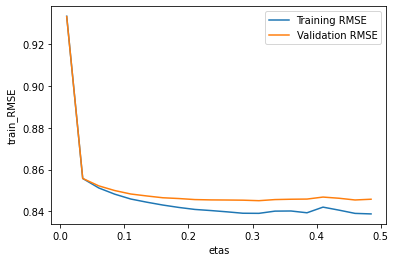

In [310]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

num_boost_round = 200

params = {
    'eval_metric':'rmse',
    'objective':'reg:squarederror',
    'max_depth': 2
}

num_boost_round = 300

# etas
scores = pd.DataFrame(columns=["etas", "train_RMSE", "test_RMSE"])
etas = np.arange(0.01, 0.5, 0.025)

i = 0
                      
# train the model
for eta in etas:
    
    print(eta)
    scores.at[i,"etas"] = eta         
    params["eta"] = eta
                      
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

import seaborn as sns
sns.lineplot(x=scores["etas"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["etas"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

0.1
[0]	Test-rmse:4.94705
[1]	Test-rmse:3.52351
[2]	Test-rmse:2.54686
[3]	Test-rmse:1.88943
[4]	Test-rmse:1.46450
[5]	Test-rmse:1.19911
[6]	Test-rmse:1.04402
[7]	Test-rmse:0.95897
[8]	Test-rmse:0.91266
[9]	Test-rmse:0.88889
[10]	Test-rmse:0.87621
[11]	Test-rmse:0.87017
[12]	Test-rmse:0.86642
[13]	Test-rmse:0.86405
[14]	Test-rmse:0.86253
[15]	Test-rmse:0.86177
[16]	Test-rmse:0.86108
[17]	Test-rmse:0.86055
[18]	Test-rmse:0.86013
[19]	Test-rmse:0.85973
[20]	Test-rmse:0.85942
[21]	Test-rmse:0.85904
[22]	Test-rmse:0.85867
[23]	Test-rmse:0.85825
[24]	Test-rmse:0.85795
[25]	Test-rmse:0.85772
[26]	Test-rmse:0.85734
[27]	Test-rmse:0.85703
[28]	Test-rmse:0.85664
[29]	Test-rmse:0.85606
[30]	Test-rmse:0.85599
[31]	Test-rmse:0.85567
[32]	Test-rmse:0.85553
[33]	Test-rmse:0.85534
[34]	Test-rmse:0.85521
[35]	Test-rmse:0.85505
[36]	Test-rmse:0.85498
[37]	Test-rmse:0.85470
[38]	Test-rmse:0.85467
[39]	Test-rmse:0.85471
[40]	Test-rmse:0.85465
[41]	Test-rmse:0.85461
[42]	Test-rmse:0.85442
[43]	Test-rmse:0.

[129]	Test-rmse:0.84814
[130]	Test-rmse:0.84817
[131]	Test-rmse:0.84816
[132]	Test-rmse:0.84804
[133]	Test-rmse:0.84793
[134]	Test-rmse:0.84782
[135]	Test-rmse:0.84780
[136]	Test-rmse:0.84771
[137]	Test-rmse:0.84770
[138]	Test-rmse:0.84771
[139]	Test-rmse:0.84771
[140]	Test-rmse:0.84768
[141]	Test-rmse:0.84762
[142]	Test-rmse:0.84761
[143]	Test-rmse:0.84762
[144]	Test-rmse:0.84755
[145]	Test-rmse:0.84754
[146]	Test-rmse:0.84753
[147]	Test-rmse:0.84753
[148]	Test-rmse:0.84749
[149]	Test-rmse:0.84742
[150]	Test-rmse:0.84743
[151]	Test-rmse:0.84740
[152]	Test-rmse:0.84741
[153]	Test-rmse:0.84739
[154]	Test-rmse:0.84743
[155]	Test-rmse:0.84742
[156]	Test-rmse:0.84740
[157]	Test-rmse:0.84739
[158]	Test-rmse:0.84738
[159]	Test-rmse:0.84739
[160]	Test-rmse:0.84742
[161]	Test-rmse:0.84737
[162]	Test-rmse:0.84737
[163]	Test-rmse:0.84733
[164]	Test-rmse:0.84739
[165]	Test-rmse:0.84740
[166]	Test-rmse:0.84739
[167]	Test-rmse:0.84735
[168]	Test-rmse:0.84734
[169]	Test-rmse:0.84727
[170]	Test-rmse:

[65]	Test-rmse:0.85088
[66]	Test-rmse:0.85081
[67]	Test-rmse:0.85064
[68]	Test-rmse:0.85060
[69]	Test-rmse:0.85060
[70]	Test-rmse:0.85042
[71]	Test-rmse:0.85030
[72]	Test-rmse:0.85025
[73]	Test-rmse:0.85025
[74]	Test-rmse:0.85019
[75]	Test-rmse:0.84995
[76]	Test-rmse:0.84992
[77]	Test-rmse:0.84982
[78]	Test-rmse:0.84969
[79]	Test-rmse:0.84966
[80]	Test-rmse:0.84951
[81]	Test-rmse:0.84944
[82]	Test-rmse:0.84934
[83]	Test-rmse:0.84932
[84]	Test-rmse:0.84931
[85]	Test-rmse:0.84929
[86]	Test-rmse:0.84918
[87]	Test-rmse:0.84914
[88]	Test-rmse:0.84905
[89]	Test-rmse:0.84899
[90]	Test-rmse:0.84896
[91]	Test-rmse:0.84888
[92]	Test-rmse:0.84887
[93]	Test-rmse:0.84886
[94]	Test-rmse:0.84886
[95]	Test-rmse:0.84880
[96]	Test-rmse:0.84879
[97]	Test-rmse:0.84877
[98]	Test-rmse:0.84869
[99]	Test-rmse:0.84858
[100]	Test-rmse:0.84853
[101]	Test-rmse:0.84851
[102]	Test-rmse:0.84848
[103]	Test-rmse:0.84827
[104]	Test-rmse:0.84826
[105]	Test-rmse:0.84816
[106]	Test-rmse:0.84817
[107]	Test-rmse:0.84814
[10

[194]	Test-rmse:0.84629
[195]	Test-rmse:0.84630
[196]	Test-rmse:0.84628
[197]	Test-rmse:0.84625
[198]	Test-rmse:0.84622
[199]	Test-rmse:0.84621
[200]	Test-rmse:0.84622
[201]	Test-rmse:0.84621
[202]	Test-rmse:0.84623
[203]	Test-rmse:0.84625
[204]	Test-rmse:0.84622
[205]	Test-rmse:0.84619
[206]	Test-rmse:0.84620
[207]	Test-rmse:0.84618
[208]	Test-rmse:0.84618
[209]	Test-rmse:0.84618
[210]	Test-rmse:0.84617
[211]	Test-rmse:0.84612
[212]	Test-rmse:0.84612
[213]	Test-rmse:0.84613
[214]	Test-rmse:0.84613
[215]	Test-rmse:0.84614
[216]	Test-rmse:0.84608
[217]	Test-rmse:0.84607
[218]	Test-rmse:0.84604
[219]	Test-rmse:0.84600
[220]	Test-rmse:0.84597
[221]	Test-rmse:0.84598
[222]	Test-rmse:0.84599
[223]	Test-rmse:0.84599
[224]	Test-rmse:0.84598
[225]	Test-rmse:0.84598
[226]	Test-rmse:0.84599
[227]	Test-rmse:0.84594
[228]	Test-rmse:0.84593
[229]	Test-rmse:0.84597
[230]	Test-rmse:0.84598
[231]	Test-rmse:0.84597
[232]	Test-rmse:0.84598
[233]	Test-rmse:0.84598
[234]	Test-rmse:0.84597
[235]	Test-rmse:

[103]	Test-rmse:0.84845
[104]	Test-rmse:0.84846
[105]	Test-rmse:0.84841
[106]	Test-rmse:0.84837
[107]	Test-rmse:0.84826
[108]	Test-rmse:0.84818
[109]	Test-rmse:0.84808
[110]	Test-rmse:0.84806
[111]	Test-rmse:0.84806
[112]	Test-rmse:0.84801
[113]	Test-rmse:0.84801
[114]	Test-rmse:0.84792
[115]	Test-rmse:0.84789
[116]	Test-rmse:0.84773
[117]	Test-rmse:0.84771
[118]	Test-rmse:0.84765
[119]	Test-rmse:0.84762
[120]	Test-rmse:0.84764
[121]	Test-rmse:0.84760
[122]	Test-rmse:0.84761
[123]	Test-rmse:0.84757
[124]	Test-rmse:0.84759
[125]	Test-rmse:0.84761
[126]	Test-rmse:0.84757
[127]	Test-rmse:0.84756
[128]	Test-rmse:0.84749
[129]	Test-rmse:0.84750
[130]	Test-rmse:0.84742
[131]	Test-rmse:0.84737
[132]	Test-rmse:0.84733
[133]	Test-rmse:0.84734
[134]	Test-rmse:0.84732
[135]	Test-rmse:0.84735
[136]	Test-rmse:0.84734
[137]	Test-rmse:0.84735
[138]	Test-rmse:0.84732
[139]	Test-rmse:0.84732
[140]	Test-rmse:0.84723
[141]	Test-rmse:0.84722
[142]	Test-rmse:0.84721
[143]	Test-rmse:0.84718
[144]	Test-rmse:

[149]	Test-rmse:0.84684
[150]	Test-rmse:0.84683
[151]	Test-rmse:0.84683
[152]	Test-rmse:0.84678
[153]	Test-rmse:0.84670
[154]	Test-rmse:0.84667
[155]	Test-rmse:0.84663
[156]	Test-rmse:0.84662
[157]	Test-rmse:0.84662
[158]	Test-rmse:0.84661
[159]	Test-rmse:0.84661
[160]	Test-rmse:0.84661
[161]	Test-rmse:0.84662
[162]	Test-rmse:0.84660
[163]	Test-rmse:0.84660
[164]	Test-rmse:0.84661
[165]	Test-rmse:0.84660
[166]	Test-rmse:0.84657
[167]	Test-rmse:0.84655
[168]	Test-rmse:0.84654
[169]	Test-rmse:0.84655
[170]	Test-rmse:0.84656
[171]	Test-rmse:0.84655
[172]	Test-rmse:0.84651
[173]	Test-rmse:0.84651
[174]	Test-rmse:0.84645
[175]	Test-rmse:0.84645
[176]	Test-rmse:0.84644
[177]	Test-rmse:0.84640
[178]	Test-rmse:0.84639
[179]	Test-rmse:0.84631
[180]	Test-rmse:0.84632
[181]	Test-rmse:0.84626
[182]	Test-rmse:0.84622
[183]	Test-rmse:0.84622
[184]	Test-rmse:0.84619
[185]	Test-rmse:0.84619
[186]	Test-rmse:0.84620
[187]	Test-rmse:0.84619
[188]	Test-rmse:0.84619
[189]	Test-rmse:0.84616
[190]	Test-rmse:

<AxesSubplot:xlabel='subsample', ylabel='train_RMSE'>

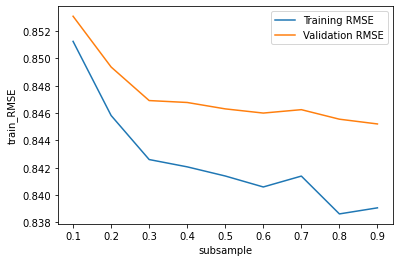

In [312]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

num_boost_round = 1000

params = {
    'eval_metric':'rmse',
    'objective':'reg:squarederror',
    'max_depth': 2
}

num_boost_round = 300

# subsample
scores = pd.DataFrame(columns=["subsample", "train_RMSE", "test_RMSE"])
subsamples = np.arange(0.1, 1, 0.1)

i = 0
                      
# train the model
for subsample in subsamples:
    
    print(subsample)
    scores.at[i,"subsample"] = subsample         
    params["subsample"] = subsample
                      
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

import seaborn as sns
sns.lineplot(x=scores["subsample"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["subsample"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

0.1
[0]	Test-rmse:5.12263
[1]	Test-rmse:3.76443
[2]	Test-rmse:2.79642
[3]	Test-rmse:2.11667
[4]	Test-rmse:1.65014
[5]	Test-rmse:1.34110
[6]	Test-rmse:1.14484
[7]	Test-rmse:1.02648
[8]	Test-rmse:0.95740
[9]	Test-rmse:0.91878
[10]	Test-rmse:0.89490
[11]	Test-rmse:0.88349
[12]	Test-rmse:0.87681
[13]	Test-rmse:0.87277
[14]	Test-rmse:0.87073
[15]	Test-rmse:0.86840
[16]	Test-rmse:0.86686
[17]	Test-rmse:0.86597
[18]	Test-rmse:0.86562
[19]	Test-rmse:0.86516
[20]	Test-rmse:0.86470
[21]	Test-rmse:0.86455
[22]	Test-rmse:0.86371
[23]	Test-rmse:0.86325
[24]	Test-rmse:0.86292
[25]	Test-rmse:0.86234
[26]	Test-rmse:0.86142
[27]	Test-rmse:0.86092
[28]	Test-rmse:0.86055
[29]	Test-rmse:0.85963
[30]	Test-rmse:0.85947
[31]	Test-rmse:0.85930
[32]	Test-rmse:0.85882
[33]	Test-rmse:0.85851
[34]	Test-rmse:0.85831
[35]	Test-rmse:0.85801
[36]	Test-rmse:0.85788
[37]	Test-rmse:0.85758
[38]	Test-rmse:0.85731
[39]	Test-rmse:0.85709
[40]	Test-rmse:0.85698
[41]	Test-rmse:0.85667
[42]	Test-rmse:0.85633
[43]	Test-rmse:0.

[38]	Test-rmse:0.85522
[39]	Test-rmse:0.85509
[40]	Test-rmse:0.85497
[41]	Test-rmse:0.85479
[42]	Test-rmse:0.85465
[43]	Test-rmse:0.85449
[44]	Test-rmse:0.85434
[45]	Test-rmse:0.85419
[46]	Test-rmse:0.85406
[47]	Test-rmse:0.85393
[48]	Test-rmse:0.85380
[49]	Test-rmse:0.85362
[50]	Test-rmse:0.85354
[51]	Test-rmse:0.85346
[52]	Test-rmse:0.85332
[53]	Test-rmse:0.85319
[54]	Test-rmse:0.85302
[55]	Test-rmse:0.85292
[56]	Test-rmse:0.85284
[57]	Test-rmse:0.85279
[58]	Test-rmse:0.85261
[59]	Test-rmse:0.85248
[60]	Test-rmse:0.85245
[61]	Test-rmse:0.85239
[62]	Test-rmse:0.85231
[63]	Test-rmse:0.85228
[64]	Test-rmse:0.85223
[65]	Test-rmse:0.85216
[66]	Test-rmse:0.85211
[67]	Test-rmse:0.85198
[68]	Test-rmse:0.85192
[69]	Test-rmse:0.85186
[70]	Test-rmse:0.85173
[71]	Test-rmse:0.85160
[72]	Test-rmse:0.85154
[73]	Test-rmse:0.85144
[74]	Test-rmse:0.85134
[75]	Test-rmse:0.85129
[76]	Test-rmse:0.85125
[77]	Test-rmse:0.85118
[78]	Test-rmse:0.85104
[79]	Test-rmse:0.85101
[80]	Test-rmse:0.85080
[81]	Test-r

[382]	Test-rmse:0.84477
[383]	Test-rmse:0.84477
[384]	Test-rmse:0.84478
[385]	Test-rmse:0.84478
[386]	Test-rmse:0.84477
[387]	Test-rmse:0.84478
[388]	Test-rmse:0.84478
[389]	Test-rmse:0.84477
[390]	Test-rmse:0.84476
[391]	Test-rmse:0.84475
[392]	Test-rmse:0.84474
[393]	Test-rmse:0.84475
[394]	Test-rmse:0.84474
[395]	Test-rmse:0.84474
[396]	Test-rmse:0.84474
[397]	Test-rmse:0.84473
[398]	Test-rmse:0.84472
[399]	Test-rmse:0.84472
[400]	Test-rmse:0.84472
[401]	Test-rmse:0.84474
[402]	Test-rmse:0.84474
[403]	Test-rmse:0.84474
[404]	Test-rmse:0.84475
[405]	Test-rmse:0.84473
[406]	Test-rmse:0.84474
[407]	Test-rmse:0.84473
[408]	Test-rmse:0.84471
[409]	Test-rmse:0.84471
[410]	Test-rmse:0.84472
[411]	Test-rmse:0.84472
[412]	Test-rmse:0.84472
[413]	Test-rmse:0.84472
[414]	Test-rmse:0.84472
[415]	Test-rmse:0.84470
[416]	Test-rmse:0.84471
[417]	Test-rmse:0.84472
[418]	Test-rmse:0.84472
[419]	Test-rmse:0.84472
[420]	Test-rmse:0.84472
[421]	Test-rmse:0.84472
[422]	Test-rmse:0.84472
[423]	Test-rmse:

[302]	Test-rmse:0.84525
[303]	Test-rmse:0.84526
0.4
[0]	Test-rmse:5.12208
[1]	Test-rmse:3.76330
[2]	Test-rmse:2.79467
[3]	Test-rmse:2.11441
[4]	Test-rmse:1.64682
[5]	Test-rmse:1.33651
[6]	Test-rmse:1.13969
[7]	Test-rmse:1.02043
[8]	Test-rmse:0.95123
[9]	Test-rmse:0.91233
[10]	Test-rmse:0.89082
[11]	Test-rmse:0.87884
[12]	Test-rmse:0.87219
[13]	Test-rmse:0.86789
[14]	Test-rmse:0.86563
[15]	Test-rmse:0.86414
[16]	Test-rmse:0.86313
[17]	Test-rmse:0.86230
[18]	Test-rmse:0.86176
[19]	Test-rmse:0.86115
[20]	Test-rmse:0.86071
[21]	Test-rmse:0.86037
[22]	Test-rmse:0.85993
[23]	Test-rmse:0.85946
[24]	Test-rmse:0.85906
[25]	Test-rmse:0.85867
[26]	Test-rmse:0.85831
[27]	Test-rmse:0.85804
[28]	Test-rmse:0.85779
[29]	Test-rmse:0.85755
[30]	Test-rmse:0.85730
[31]	Test-rmse:0.85704
[32]	Test-rmse:0.85677
[33]	Test-rmse:0.85639
[34]	Test-rmse:0.85613
[35]	Test-rmse:0.85596
[36]	Test-rmse:0.85578
[37]	Test-rmse:0.85557
[38]	Test-rmse:0.85544
[39]	Test-rmse:0.85521
[40]	Test-rmse:0.85504
[41]	Test-rmse:

[71]	Test-rmse:0.85148
[72]	Test-rmse:0.85144
[73]	Test-rmse:0.85140
[74]	Test-rmse:0.85110
[75]	Test-rmse:0.85106
[76]	Test-rmse:0.85098
[77]	Test-rmse:0.85087
[78]	Test-rmse:0.85076
[79]	Test-rmse:0.85071
[80]	Test-rmse:0.85061
[81]	Test-rmse:0.85054
[82]	Test-rmse:0.85053
[83]	Test-rmse:0.85041
[84]	Test-rmse:0.85018
[85]	Test-rmse:0.85010
[86]	Test-rmse:0.85005
[87]	Test-rmse:0.84992
[88]	Test-rmse:0.84980
[89]	Test-rmse:0.84960
[90]	Test-rmse:0.84951
[91]	Test-rmse:0.84943
[92]	Test-rmse:0.84939
[93]	Test-rmse:0.84933
[94]	Test-rmse:0.84930
[95]	Test-rmse:0.84922
[96]	Test-rmse:0.84917
[97]	Test-rmse:0.84915
[98]	Test-rmse:0.84912
[99]	Test-rmse:0.84904
[100]	Test-rmse:0.84899
[101]	Test-rmse:0.84897
[102]	Test-rmse:0.84895
[103]	Test-rmse:0.84890
[104]	Test-rmse:0.84883
[105]	Test-rmse:0.84881
[106]	Test-rmse:0.84873
[107]	Test-rmse:0.84873
[108]	Test-rmse:0.84871
[109]	Test-rmse:0.84869
[110]	Test-rmse:0.84865
[111]	Test-rmse:0.84855
[112]	Test-rmse:0.84847
[113]	Test-rmse:0.848

[199]	Test-rmse:0.84600
[200]	Test-rmse:0.84598
[201]	Test-rmse:0.84596
[202]	Test-rmse:0.84597
[203]	Test-rmse:0.84593
[204]	Test-rmse:0.84593
[205]	Test-rmse:0.84586
[206]	Test-rmse:0.84586
[207]	Test-rmse:0.84583
[208]	Test-rmse:0.84583
[209]	Test-rmse:0.84583
[210]	Test-rmse:0.84578
[211]	Test-rmse:0.84574
[212]	Test-rmse:0.84574
[213]	Test-rmse:0.84574
[214]	Test-rmse:0.84573
[215]	Test-rmse:0.84573
[216]	Test-rmse:0.84573
[217]	Test-rmse:0.84575
[218]	Test-rmse:0.84576
[219]	Test-rmse:0.84576
[220]	Test-rmse:0.84578
[221]	Test-rmse:0.84578
[222]	Test-rmse:0.84579
[223]	Test-rmse:0.84578
0.7
[0]	Test-rmse:5.12186
[1]	Test-rmse:3.76272
[2]	Test-rmse:2.79456
[3]	Test-rmse:2.11427
[4]	Test-rmse:1.64679
[5]	Test-rmse:1.33664
[6]	Test-rmse:1.13953
[7]	Test-rmse:1.02041
[8]	Test-rmse:0.95124
[9]	Test-rmse:0.91224
[10]	Test-rmse:0.89037
[11]	Test-rmse:0.87843
[12]	Test-rmse:0.87163
[13]	Test-rmse:0.86774
[14]	Test-rmse:0.86549
[15]	Test-rmse:0.86397
[16]	Test-rmse:0.86289
[17]	Test-rmse:

[97]	Test-rmse:0.84979
[98]	Test-rmse:0.84972
[99]	Test-rmse:0.84968
[100]	Test-rmse:0.84958
[101]	Test-rmse:0.84954
[102]	Test-rmse:0.84953
[103]	Test-rmse:0.84950
[104]	Test-rmse:0.84937
[105]	Test-rmse:0.84936
[106]	Test-rmse:0.84928
[107]	Test-rmse:0.84921
[108]	Test-rmse:0.84914
[109]	Test-rmse:0.84912
[110]	Test-rmse:0.84908
[111]	Test-rmse:0.84888
[112]	Test-rmse:0.84886
[113]	Test-rmse:0.84872
[114]	Test-rmse:0.84860
[115]	Test-rmse:0.84857
[116]	Test-rmse:0.84848
[117]	Test-rmse:0.84845
[118]	Test-rmse:0.84840
[119]	Test-rmse:0.84834
[120]	Test-rmse:0.84829
[121]	Test-rmse:0.84820
[122]	Test-rmse:0.84815
[123]	Test-rmse:0.84813
[124]	Test-rmse:0.84813
[125]	Test-rmse:0.84811
[126]	Test-rmse:0.84810
[127]	Test-rmse:0.84803
[128]	Test-rmse:0.84801
[129]	Test-rmse:0.84802
[130]	Test-rmse:0.84790
[131]	Test-rmse:0.84783
[132]	Test-rmse:0.84784
[133]	Test-rmse:0.84783
[134]	Test-rmse:0.84767
[135]	Test-rmse:0.84766
[136]	Test-rmse:0.84765
[137]	Test-rmse:0.84767
[138]	Test-rmse:0.8

[212]	Test-rmse:0.84604
[213]	Test-rmse:0.84600
[214]	Test-rmse:0.84601
[215]	Test-rmse:0.84601
[216]	Test-rmse:0.84600
[217]	Test-rmse:0.84597
[218]	Test-rmse:0.84589
[219]	Test-rmse:0.84586
[220]	Test-rmse:0.84586
[221]	Test-rmse:0.84583
[222]	Test-rmse:0.84581
[223]	Test-rmse:0.84579
[224]	Test-rmse:0.84573
[225]	Test-rmse:0.84569
[226]	Test-rmse:0.84570
[227]	Test-rmse:0.84570
[228]	Test-rmse:0.84569
[229]	Test-rmse:0.84571
[230]	Test-rmse:0.84571
[231]	Test-rmse:0.84570
[232]	Test-rmse:0.84571
[233]	Test-rmse:0.84570
[234]	Test-rmse:0.84571
[235]	Test-rmse:0.84568
[236]	Test-rmse:0.84566
[237]	Test-rmse:0.84562
[238]	Test-rmse:0.84562
[239]	Test-rmse:0.84563
[240]	Test-rmse:0.84562
[241]	Test-rmse:0.84561
[242]	Test-rmse:0.84561
[243]	Test-rmse:0.84561
[244]	Test-rmse:0.84561
[245]	Test-rmse:0.84562
[246]	Test-rmse:0.84560
[247]	Test-rmse:0.84557
[248]	Test-rmse:0.84555
[249]	Test-rmse:0.84555
[250]	Test-rmse:0.84556
[251]	Test-rmse:0.84557
[252]	Test-rmse:0.84553
[253]	Test-rmse:

<AxesSubplot:xlabel='colsample_bytrees', ylabel='train_RMSE'>

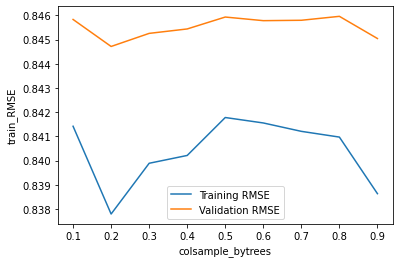

In [313]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

num_boost_round = 1000

params = {
    'eval_metric':'rmse',
    'eta':0.275,
    'objective':'reg:squarederror',
    'max_depth': 2
}


# colsample_bytree
scores = pd.DataFrame(columns=["colsample_bytrees", "train_RMSE", "test_RMSE"])
colsample_bytree = np.arange(0.1, 1, 0.1)

i = 0
                      
# train the model
for colsample_bytree in colsample_bytrees:
    
    print(colsample_bytree)
    scores.at[i,"colsample_bytrees"] = colsample_bytree         
    params["colsample_bytree"] = colsample_bytree
                      
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

import seaborn as sns
sns.lineplot(x=scores["colsample_bytrees"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["colsample_bytrees"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

0
[0]	Test-rmse:5.12226
[1]	Test-rmse:3.76352
[2]	Test-rmse:2.79503
[3]	Test-rmse:2.11471
[4]	Test-rmse:1.64714
[5]	Test-rmse:1.33683
[6]	Test-rmse:1.13990
[7]	Test-rmse:1.02060
[8]	Test-rmse:0.95140
[9]	Test-rmse:0.91270
[10]	Test-rmse:0.89107
[11]	Test-rmse:0.87915
[12]	Test-rmse:0.87239
[13]	Test-rmse:0.86833
[14]	Test-rmse:0.86620
[15]	Test-rmse:0.86458
[16]	Test-rmse:0.86356
[17]	Test-rmse:0.86269
[18]	Test-rmse:0.86198
[19]	Test-rmse:0.86152
[20]	Test-rmse:0.86101
[21]	Test-rmse:0.86061
[22]	Test-rmse:0.86024
[23]	Test-rmse:0.85987
[24]	Test-rmse:0.85948
[25]	Test-rmse:0.85912
[26]	Test-rmse:0.85863
[27]	Test-rmse:0.85826
[28]	Test-rmse:0.85799
[29]	Test-rmse:0.85779
[30]	Test-rmse:0.85755
[31]	Test-rmse:0.85730
[32]	Test-rmse:0.85684
[33]	Test-rmse:0.85657
[34]	Test-rmse:0.85638
[35]	Test-rmse:0.85601
[36]	Test-rmse:0.85573
[37]	Test-rmse:0.85542
[38]	Test-rmse:0.85522
[39]	Test-rmse:0.85509
[40]	Test-rmse:0.85497
[41]	Test-rmse:0.85479
[42]	Test-rmse:0.85465
[43]	Test-rmse:0.85

[346]	Test-rmse:0.84498
[347]	Test-rmse:0.84496
[348]	Test-rmse:0.84494
[349]	Test-rmse:0.84494
[350]	Test-rmse:0.84494
[351]	Test-rmse:0.84493
[352]	Test-rmse:0.84493
[353]	Test-rmse:0.84493
[354]	Test-rmse:0.84491
[355]	Test-rmse:0.84488
[356]	Test-rmse:0.84487
[357]	Test-rmse:0.84487
[358]	Test-rmse:0.84485
[359]	Test-rmse:0.84485
[360]	Test-rmse:0.84482
[361]	Test-rmse:0.84482
[362]	Test-rmse:0.84482
[363]	Test-rmse:0.84481
[364]	Test-rmse:0.84481
[365]	Test-rmse:0.84483
[366]	Test-rmse:0.84482
[367]	Test-rmse:0.84483
[368]	Test-rmse:0.84482
[369]	Test-rmse:0.84479
[370]	Test-rmse:0.84479
[371]	Test-rmse:0.84479
[372]	Test-rmse:0.84480
[373]	Test-rmse:0.84481
[374]	Test-rmse:0.84481
[375]	Test-rmse:0.84479
[376]	Test-rmse:0.84479
[377]	Test-rmse:0.84479
[378]	Test-rmse:0.84481
[379]	Test-rmse:0.84480
[380]	Test-rmse:0.84477
[381]	Test-rmse:0.84478
[382]	Test-rmse:0.84477
[383]	Test-rmse:0.84477
[384]	Test-rmse:0.84478
[385]	Test-rmse:0.84478
[386]	Test-rmse:0.84477
[387]	Test-rmse:

[267]	Test-rmse:0.84535
[268]	Test-rmse:0.84530
[269]	Test-rmse:0.84527
[270]	Test-rmse:0.84528
[271]	Test-rmse:0.84527
[272]	Test-rmse:0.84527
[273]	Test-rmse:0.84528
[274]	Test-rmse:0.84527
[275]	Test-rmse:0.84524
[276]	Test-rmse:0.84524
[277]	Test-rmse:0.84521
[278]	Test-rmse:0.84519
[279]	Test-rmse:0.84520
[280]	Test-rmse:0.84520
[281]	Test-rmse:0.84519
[282]	Test-rmse:0.84517
[283]	Test-rmse:0.84518
[284]	Test-rmse:0.84518
[285]	Test-rmse:0.84511
[286]	Test-rmse:0.84511
[287]	Test-rmse:0.84513
[288]	Test-rmse:0.84512
[289]	Test-rmse:0.84511
[290]	Test-rmse:0.84511
[291]	Test-rmse:0.84511
[292]	Test-rmse:0.84511
[293]	Test-rmse:0.84511
[294]	Test-rmse:0.84511
[295]	Test-rmse:0.84510
[296]	Test-rmse:0.84510
[297]	Test-rmse:0.84510
[298]	Test-rmse:0.84509
[299]	Test-rmse:0.84510
[300]	Test-rmse:0.84510
[301]	Test-rmse:0.84511
[302]	Test-rmse:0.84509
[303]	Test-rmse:0.84508
[304]	Test-rmse:0.84509
[305]	Test-rmse:0.84510
[306]	Test-rmse:0.84509
[307]	Test-rmse:0.84507
[308]	Test-rmse:

[188]	Test-rmse:0.84629
[189]	Test-rmse:0.84626
[190]	Test-rmse:0.84626
[191]	Test-rmse:0.84625
[192]	Test-rmse:0.84622
[193]	Test-rmse:0.84622
[194]	Test-rmse:0.84616
[195]	Test-rmse:0.84618
[196]	Test-rmse:0.84613
[197]	Test-rmse:0.84614
[198]	Test-rmse:0.84614
[199]	Test-rmse:0.84613
[200]	Test-rmse:0.84614
[201]	Test-rmse:0.84611
[202]	Test-rmse:0.84610
[203]	Test-rmse:0.84607
[204]	Test-rmse:0.84608
[205]	Test-rmse:0.84604
[206]	Test-rmse:0.84605
[207]	Test-rmse:0.84605
[208]	Test-rmse:0.84606
[209]	Test-rmse:0.84604
[210]	Test-rmse:0.84604
[211]	Test-rmse:0.84604
[212]	Test-rmse:0.84602
[213]	Test-rmse:0.84598
[214]	Test-rmse:0.84598
[215]	Test-rmse:0.84597
[216]	Test-rmse:0.84600
[217]	Test-rmse:0.84593
[218]	Test-rmse:0.84593
[219]	Test-rmse:0.84592
[220]	Test-rmse:0.84593
[221]	Test-rmse:0.84592
[222]	Test-rmse:0.84589
[223]	Test-rmse:0.84588
[224]	Test-rmse:0.84587
[225]	Test-rmse:0.84586
[226]	Test-rmse:0.84585
[227]	Test-rmse:0.84586
[228]	Test-rmse:0.84580
[229]	Test-rmse:

[258]	Test-rmse:0.84550
[259]	Test-rmse:0.84551
[260]	Test-rmse:0.84550
[261]	Test-rmse:0.84548
[262]	Test-rmse:0.84549
[263]	Test-rmse:0.84544
[264]	Test-rmse:0.84544
[265]	Test-rmse:0.84545
[266]	Test-rmse:0.84544
[267]	Test-rmse:0.84545
[268]	Test-rmse:0.84545
[269]	Test-rmse:0.84538
[270]	Test-rmse:0.84539
[271]	Test-rmse:0.84539
[272]	Test-rmse:0.84538
[273]	Test-rmse:0.84539
[274]	Test-rmse:0.84537
[275]	Test-rmse:0.84538
[276]	Test-rmse:0.84538
[277]	Test-rmse:0.84538
[278]	Test-rmse:0.84535
[279]	Test-rmse:0.84533
[280]	Test-rmse:0.84532
[281]	Test-rmse:0.84532
[282]	Test-rmse:0.84532
[283]	Test-rmse:0.84530
[284]	Test-rmse:0.84530
[285]	Test-rmse:0.84528
[286]	Test-rmse:0.84528
[287]	Test-rmse:0.84527
[288]	Test-rmse:0.84527
[289]	Test-rmse:0.84528
[290]	Test-rmse:0.84529
[291]	Test-rmse:0.84529
[292]	Test-rmse:0.84530
[293]	Test-rmse:0.84530
[294]	Test-rmse:0.84531
[295]	Test-rmse:0.84531
[296]	Test-rmse:0.84531
[297]	Test-rmse:0.84532
4
[0]	Test-rmse:5.12226
[1]	Test-rmse:3.

[38]	Test-rmse:0.85522
[39]	Test-rmse:0.85509
[40]	Test-rmse:0.85497
[41]	Test-rmse:0.85479
[42]	Test-rmse:0.85465
[43]	Test-rmse:0.85449
[44]	Test-rmse:0.85434
[45]	Test-rmse:0.85419
[46]	Test-rmse:0.85406
[47]	Test-rmse:0.85393
[48]	Test-rmse:0.85380
[49]	Test-rmse:0.85362
[50]	Test-rmse:0.85354
[51]	Test-rmse:0.85346
[52]	Test-rmse:0.85332
[53]	Test-rmse:0.85319
[54]	Test-rmse:0.85302
[55]	Test-rmse:0.85292
[56]	Test-rmse:0.85284
[57]	Test-rmse:0.85279
[58]	Test-rmse:0.85261
[59]	Test-rmse:0.85248
[60]	Test-rmse:0.85245
[61]	Test-rmse:0.85239
[62]	Test-rmse:0.85231
[63]	Test-rmse:0.85228
[64]	Test-rmse:0.85223
[65]	Test-rmse:0.85216
[66]	Test-rmse:0.85211
[67]	Test-rmse:0.85198
[68]	Test-rmse:0.85192
[69]	Test-rmse:0.85186
[70]	Test-rmse:0.85173
[71]	Test-rmse:0.85160
[72]	Test-rmse:0.85154
[73]	Test-rmse:0.85144
[74]	Test-rmse:0.85134
[75]	Test-rmse:0.85129
[76]	Test-rmse:0.85125
[77]	Test-rmse:0.85118
[78]	Test-rmse:0.85104
[79]	Test-rmse:0.85101
[80]	Test-rmse:0.85080
[81]	Test-r

[75]	Test-rmse:0.85129
[76]	Test-rmse:0.85125
[77]	Test-rmse:0.85118
[78]	Test-rmse:0.85104
[79]	Test-rmse:0.85101
[80]	Test-rmse:0.85080
[81]	Test-rmse:0.85068
[82]	Test-rmse:0.85064
[83]	Test-rmse:0.85057
[84]	Test-rmse:0.85046
[85]	Test-rmse:0.85042
[86]	Test-rmse:0.85025
[87]	Test-rmse:0.85019
[88]	Test-rmse:0.85012
[89]	Test-rmse:0.85006
[90]	Test-rmse:0.84995
[91]	Test-rmse:0.84992
[92]	Test-rmse:0.84988
[93]	Test-rmse:0.84975
[94]	Test-rmse:0.84966
[95]	Test-rmse:0.84960
[96]	Test-rmse:0.84958
[97]	Test-rmse:0.84956
[98]	Test-rmse:0.84953
[99]	Test-rmse:0.84952
[100]	Test-rmse:0.84949
[101]	Test-rmse:0.84947
[102]	Test-rmse:0.84931
[103]	Test-rmse:0.84929
[104]	Test-rmse:0.84925
[105]	Test-rmse:0.84919
[106]	Test-rmse:0.84907
[107]	Test-rmse:0.84905
[108]	Test-rmse:0.84905
[109]	Test-rmse:0.84894
[110]	Test-rmse:0.84877
[111]	Test-rmse:0.84873
[112]	Test-rmse:0.84870
[113]	Test-rmse:0.84862
[114]	Test-rmse:0.84853
[115]	Test-rmse:0.84849
[116]	Test-rmse:0.84846
[117]	Test-rmse:0

[143]	Test-rmse:0.84734
[144]	Test-rmse:0.84733
[145]	Test-rmse:0.84731
[146]	Test-rmse:0.84728
[147]	Test-rmse:0.84714
[148]	Test-rmse:0.84713
[149]	Test-rmse:0.84708
[150]	Test-rmse:0.84710
[151]	Test-rmse:0.84710
[152]	Test-rmse:0.84706
[153]	Test-rmse:0.84700
[154]	Test-rmse:0.84697
[155]	Test-rmse:0.84693
[156]	Test-rmse:0.84692
[157]	Test-rmse:0.84690
[158]	Test-rmse:0.84691
[159]	Test-rmse:0.84690
[160]	Test-rmse:0.84688
[161]	Test-rmse:0.84684
[162]	Test-rmse:0.84680
[163]	Test-rmse:0.84679
[164]	Test-rmse:0.84676
[165]	Test-rmse:0.84675
[166]	Test-rmse:0.84672
[167]	Test-rmse:0.84671
[168]	Test-rmse:0.84672
[169]	Test-rmse:0.84671
[170]	Test-rmse:0.84669
[171]	Test-rmse:0.84670
[172]	Test-rmse:0.84667
[173]	Test-rmse:0.84664
[174]	Test-rmse:0.84658
[175]	Test-rmse:0.84659
[176]	Test-rmse:0.84649
[177]	Test-rmse:0.84648
[178]	Test-rmse:0.84644
[179]	Test-rmse:0.84644
[180]	Test-rmse:0.84640
[181]	Test-rmse:0.84639
[182]	Test-rmse:0.84640
[183]	Test-rmse:0.84640
[184]	Test-rmse:

[209]	Test-rmse:0.84599
[210]	Test-rmse:0.84595
[211]	Test-rmse:0.84590
[212]	Test-rmse:0.84590
[213]	Test-rmse:0.84591
[214]	Test-rmse:0.84589
[215]	Test-rmse:0.84587
[216]	Test-rmse:0.84583
[217]	Test-rmse:0.84583
[218]	Test-rmse:0.84581
[219]	Test-rmse:0.84576
[220]	Test-rmse:0.84576
[221]	Test-rmse:0.84576
[222]	Test-rmse:0.84578
[223]	Test-rmse:0.84577
[224]	Test-rmse:0.84575
[225]	Test-rmse:0.84573
[226]	Test-rmse:0.84574
[227]	Test-rmse:0.84575
[228]	Test-rmse:0.84574
[229]	Test-rmse:0.84575
[230]	Test-rmse:0.84573
[231]	Test-rmse:0.84571
[232]	Test-rmse:0.84571
[233]	Test-rmse:0.84571
[234]	Test-rmse:0.84567
[235]	Test-rmse:0.84565
[236]	Test-rmse:0.84563
[237]	Test-rmse:0.84562
[238]	Test-rmse:0.84562
[239]	Test-rmse:0.84562
[240]	Test-rmse:0.84561
[241]	Test-rmse:0.84556
[242]	Test-rmse:0.84557
[243]	Test-rmse:0.84557
[244]	Test-rmse:0.84556
[245]	Test-rmse:0.84552
[246]	Test-rmse:0.84552
[247]	Test-rmse:0.84551
[248]	Test-rmse:0.84551
[249]	Test-rmse:0.84551
[250]	Test-rmse:

[274]	Test-rmse:0.84546
[275]	Test-rmse:0.84547
[276]	Test-rmse:0.84547
[277]	Test-rmse:0.84547


<AxesSubplot:xlabel='min_child_weights', ylabel='train_RMSE'>

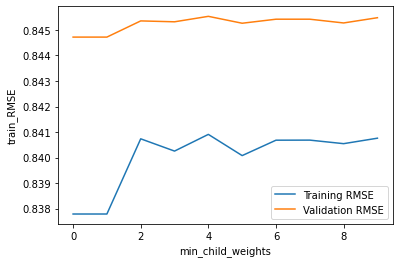

In [315]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

num_boost_round = 1000

params = {
    'eval_metric':'rmse',
    'eta':0.275,
    'objective':'reg:squarederror',
    'max_depth': 2,
    'colsample_bytree':0.2
}


# min_child_weight
scores = pd.DataFrame(columns=["min_child_weights", "train_RMSE", "test_RMSE"])
min_child_weights = np.arange(0, 10, 1)

i = 0
                      
# train the model
for min_child_weight in min_child_weights:
    
    print(min_child_weight)
    scores.at[i,"min_child_weights"] = min_child_weight         
    params["min_child_weight"] = min_child_weight
                      
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )
                      
    scores.at[i,"train_RMSE"] = mean_squared_error(y_train, model.predict(dtrain), squared=False) 
    scores.at[i,"test_RMSE"] = mean_squared_error(y_test, model.predict(dtest), squared=False)
    
    i=i+1

import seaborn as sns
sns.lineplot(x=scores["min_child_weights"], y=scores["train_RMSE"].astype(float), label="Training RMSE")
sns.lineplot(x=scores["min_child_weights"], y=scores["test_RMSE"].astype(float), label="Validation RMSE")

In [317]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

num_boost_round = 1000

params = {
    'eval_metric':'rmse',
    'eta':0.275,
    'objective':'reg:squarederror',
    'max_depth': 2,
    'colsample_bytree':0.2,
    'tree_method':'exact'
}

model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )

print("Train RMSE: " + str(mean_squared_error(y_train, model.predict(dtrain), squared=False)))
print("Test RMSE: " + str(mean_squared_error(y_test, model.predict(dtest), squared=False)))
                      



[0]	Test-rmse:5.12226
[1]	Test-rmse:3.76352
[2]	Test-rmse:2.79503
[3]	Test-rmse:2.11471
[4]	Test-rmse:1.64714
[5]	Test-rmse:1.33683
[6]	Test-rmse:1.13990
[7]	Test-rmse:1.02060
[8]	Test-rmse:0.95140
[9]	Test-rmse:0.91270
[10]	Test-rmse:0.89107
[11]	Test-rmse:0.87915
[12]	Test-rmse:0.87239
[13]	Test-rmse:0.86833
[14]	Test-rmse:0.86620
[15]	Test-rmse:0.86458
[16]	Test-rmse:0.86356
[17]	Test-rmse:0.86269
[18]	Test-rmse:0.86198
[19]	Test-rmse:0.86152
[20]	Test-rmse:0.86101
[21]	Test-rmse:0.86061
[22]	Test-rmse:0.86024
[23]	Test-rmse:0.85987
[24]	Test-rmse:0.85948
[25]	Test-rmse:0.85912
[26]	Test-rmse:0.85863
[27]	Test-rmse:0.85826
[28]	Test-rmse:0.85799
[29]	Test-rmse:0.85779
[30]	Test-rmse:0.85755
[31]	Test-rmse:0.85730
[32]	Test-rmse:0.85684
[33]	Test-rmse:0.85657
[34]	Test-rmse:0.85638
[35]	Test-rmse:0.85601
[36]	Test-rmse:0.85573
[37]	Test-rmse:0.85542
[38]	Test-rmse:0.85522
[39]	Test-rmse:0.85509
[40]	Test-rmse:0.85497
[41]	Test-rmse:0.85479
[42]	Test-rmse:0.85465
[43]	Test-rmse:0.8544

[346]	Test-rmse:0.84498
[347]	Test-rmse:0.84496
[348]	Test-rmse:0.84494
[349]	Test-rmse:0.84494
[350]	Test-rmse:0.84494
[351]	Test-rmse:0.84493
[352]	Test-rmse:0.84493
[353]	Test-rmse:0.84493
[354]	Test-rmse:0.84491
[355]	Test-rmse:0.84488
[356]	Test-rmse:0.84487
[357]	Test-rmse:0.84487
[358]	Test-rmse:0.84485
[359]	Test-rmse:0.84485
[360]	Test-rmse:0.84482
[361]	Test-rmse:0.84482
[362]	Test-rmse:0.84482
[363]	Test-rmse:0.84481
[364]	Test-rmse:0.84481
[365]	Test-rmse:0.84483
[366]	Test-rmse:0.84482
[367]	Test-rmse:0.84483
[368]	Test-rmse:0.84482
[369]	Test-rmse:0.84479
[370]	Test-rmse:0.84479
[371]	Test-rmse:0.84479
[372]	Test-rmse:0.84480
[373]	Test-rmse:0.84481
[374]	Test-rmse:0.84481
[375]	Test-rmse:0.84479
[376]	Test-rmse:0.84479
[377]	Test-rmse:0.84479
[378]	Test-rmse:0.84481
[379]	Test-rmse:0.84480
[380]	Test-rmse:0.84477
[381]	Test-rmse:0.84478
[382]	Test-rmse:0.84477
[383]	Test-rmse:0.84477
[384]	Test-rmse:0.84478
[385]	Test-rmse:0.84478
[386]	Test-rmse:0.84477
[387]	Test-rmse:

In [318]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

num_boost_round = 1000

params = {
    'eval_metric':'rmse',
    'eta':0.275,
    'objective':'reg:squarederror',
    'max_depth': 2,
    'colsample_bytree':0.2,
    'tree_method':'hist'
}

model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )

print("Train RMSE: " + str(mean_squared_error(y_train, model.predict(dtrain), squared=False)))
print("Test RMSE: " + str(mean_squared_error(y_test, model.predict(dtest), squared=False)))
                      


[0]	Test-rmse:5.12226
[1]	Test-rmse:3.76361
[2]	Test-rmse:2.79596
[3]	Test-rmse:2.11570
[4]	Test-rmse:1.64789
[5]	Test-rmse:1.33773
[6]	Test-rmse:1.14092
[7]	Test-rmse:1.02179
[8]	Test-rmse:0.95250
[9]	Test-rmse:0.91343
[10]	Test-rmse:0.89191
[11]	Test-rmse:0.87995
[12]	Test-rmse:0.87293
[13]	Test-rmse:0.86884
[14]	Test-rmse:0.86650
[15]	Test-rmse:0.86510
[16]	Test-rmse:0.86380
[17]	Test-rmse:0.86301
[18]	Test-rmse:0.86242
[19]	Test-rmse:0.86192
[20]	Test-rmse:0.86143
[21]	Test-rmse:0.86102
[22]	Test-rmse:0.86050
[23]	Test-rmse:0.86008
[24]	Test-rmse:0.85985
[25]	Test-rmse:0.85930
[26]	Test-rmse:0.85889
[27]	Test-rmse:0.85859
[28]	Test-rmse:0.85823
[29]	Test-rmse:0.85803
[30]	Test-rmse:0.85780
[31]	Test-rmse:0.85762
[32]	Test-rmse:0.85738
[33]	Test-rmse:0.85712
[34]	Test-rmse:0.85700
[35]	Test-rmse:0.85679
[36]	Test-rmse:0.85642
[37]	Test-rmse:0.85617
[38]	Test-rmse:0.85599
[39]	Test-rmse:0.85581
[40]	Test-rmse:0.85566
[41]	Test-rmse:0.85557
[42]	Test-rmse:0.85536
[43]	Test-rmse:0.8551

[346]	Test-rmse:0.84471
[347]	Test-rmse:0.84471
[348]	Test-rmse:0.84472
[349]	Test-rmse:0.84472
[350]	Test-rmse:0.84470
[351]	Test-rmse:0.84470
[352]	Test-rmse:0.84470
[353]	Test-rmse:0.84469
[354]	Test-rmse:0.84469
[355]	Test-rmse:0.84468
[356]	Test-rmse:0.84468
[357]	Test-rmse:0.84467
[358]	Test-rmse:0.84468
[359]	Test-rmse:0.84467
[360]	Test-rmse:0.84466
[361]	Test-rmse:0.84464
[362]	Test-rmse:0.84464
[363]	Test-rmse:0.84462
[364]	Test-rmse:0.84462
[365]	Test-rmse:0.84462
[366]	Test-rmse:0.84461
[367]	Test-rmse:0.84461
[368]	Test-rmse:0.84461
[369]	Test-rmse:0.84459
[370]	Test-rmse:0.84458
[371]	Test-rmse:0.84458
[372]	Test-rmse:0.84459
[373]	Test-rmse:0.84458
[374]	Test-rmse:0.84458
[375]	Test-rmse:0.84456
[376]	Test-rmse:0.84456
[377]	Test-rmse:0.84457
[378]	Test-rmse:0.84457
[379]	Test-rmse:0.84457
[380]	Test-rmse:0.84457
[381]	Test-rmse:0.84457
[382]	Test-rmse:0.84458
[383]	Test-rmse:0.84458
[384]	Test-rmse:0.84458
[385]	Test-rmse:0.84456
Train RMSE: 0.8401671257661171
Test RMSE

In [319]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

num_boost_round = 1000

params = {
    'eval_metric':'rmse',
    'eta':0.275,
    'objective':'reg:squarederror',
    'max_depth': 2,
    'colsample_bytree':0.2,
    'tree_method':'approx'
}

model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )

print("Train RMSE: " + str(mean_squared_error(y_train, model.predict(dtrain), squared=False)))
print("Test RMSE: " + str(mean_squared_error(y_test, model.predict(dtest), squared=False)))
                      



[0]	Test-rmse:5.12218
[1]	Test-rmse:3.76361
[2]	Test-rmse:2.79599
[3]	Test-rmse:2.11635
[4]	Test-rmse:1.64796
[5]	Test-rmse:1.33772
[6]	Test-rmse:1.14094
[7]	Test-rmse:1.02125
[8]	Test-rmse:0.95196
[9]	Test-rmse:0.91312
[10]	Test-rmse:0.89196
[11]	Test-rmse:0.87990
[12]	Test-rmse:0.87333
[13]	Test-rmse:0.86926
[14]	Test-rmse:0.86657
[15]	Test-rmse:0.86498
[16]	Test-rmse:0.86403
[17]	Test-rmse:0.86318
[18]	Test-rmse:0.86259
[19]	Test-rmse:0.86191
[20]	Test-rmse:0.86135
[21]	Test-rmse:0.86104
[22]	Test-rmse:0.86073
[23]	Test-rmse:0.86018
[24]	Test-rmse:0.85986
[25]	Test-rmse:0.85952
[26]	Test-rmse:0.85920
[27]	Test-rmse:0.85853
[28]	Test-rmse:0.85836
[29]	Test-rmse:0.85815
[30]	Test-rmse:0.85801
[31]	Test-rmse:0.85733
[32]	Test-rmse:0.85693
[33]	Test-rmse:0.85668
[34]	Test-rmse:0.85646
[35]	Test-rmse:0.85624
[36]	Test-rmse:0.85602
[37]	Test-rmse:0.85581
[38]	Test-rmse:0.85566
[39]	Test-rmse:0.85553
[40]	Test-rmse:0.85541
[41]	Test-rmse:0.85528
[42]	Test-rmse:0.85518
[43]	Test-rmse:0.8549

[346]	Test-rmse:0.84491
[347]	Test-rmse:0.84491
[348]	Test-rmse:0.84489
[349]	Test-rmse:0.84489
[350]	Test-rmse:0.84488
[351]	Test-rmse:0.84486
[352]	Test-rmse:0.84486
[353]	Test-rmse:0.84485
[354]	Test-rmse:0.84484
[355]	Test-rmse:0.84485
[356]	Test-rmse:0.84483
[357]	Test-rmse:0.84483
[358]	Test-rmse:0.84483
[359]	Test-rmse:0.84484
[360]	Test-rmse:0.84483
[361]	Test-rmse:0.84482
[362]	Test-rmse:0.84481
[363]	Test-rmse:0.84481
[364]	Test-rmse:0.84481
[365]	Test-rmse:0.84481
[366]	Test-rmse:0.84481
[367]	Test-rmse:0.84480
[368]	Test-rmse:0.84480
[369]	Test-rmse:0.84479
[370]	Test-rmse:0.84479
[371]	Test-rmse:0.84478
[372]	Test-rmse:0.84478
[373]	Test-rmse:0.84478
[374]	Test-rmse:0.84476
[375]	Test-rmse:0.84476
[376]	Test-rmse:0.84476
[377]	Test-rmse:0.84475
[378]	Test-rmse:0.84477
[379]	Test-rmse:0.84477
[380]	Test-rmse:0.84476
[381]	Test-rmse:0.84476
[382]	Test-rmse:0.84476
[383]	Test-rmse:0.84476
[384]	Test-rmse:0.84476
[385]	Test-rmse:0.84476
[386]	Test-rmse:0.84476
[387]	Test-rmse:

In [320]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

num_boost_round = 1000

params = {
    'eval_metric':'rmse',
    'eta':0.275,
    'objective':'reg:squarederror',
    'max_depth': 2,
    'colsample_bytree':0.2,
    'tree_method':'hist'
}

model = xgb.train(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10
    )


    
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10,
)

cv_results

[0]	Test-rmse:5.12226
[1]	Test-rmse:3.76361
[2]	Test-rmse:2.79596
[3]	Test-rmse:2.11570
[4]	Test-rmse:1.64789
[5]	Test-rmse:1.33773
[6]	Test-rmse:1.14092
[7]	Test-rmse:1.02179
[8]	Test-rmse:0.95250
[9]	Test-rmse:0.91343
[10]	Test-rmse:0.89191
[11]	Test-rmse:0.87995
[12]	Test-rmse:0.87293
[13]	Test-rmse:0.86884
[14]	Test-rmse:0.86650
[15]	Test-rmse:0.86510
[16]	Test-rmse:0.86380
[17]	Test-rmse:0.86301
[18]	Test-rmse:0.86242
[19]	Test-rmse:0.86192
[20]	Test-rmse:0.86143
[21]	Test-rmse:0.86102
[22]	Test-rmse:0.86050
[23]	Test-rmse:0.86008
[24]	Test-rmse:0.85985
[25]	Test-rmse:0.85930
[26]	Test-rmse:0.85889
[27]	Test-rmse:0.85859
[28]	Test-rmse:0.85823
[29]	Test-rmse:0.85803
[30]	Test-rmse:0.85780
[31]	Test-rmse:0.85762
[32]	Test-rmse:0.85738
[33]	Test-rmse:0.85712
[34]	Test-rmse:0.85700
[35]	Test-rmse:0.85679
[36]	Test-rmse:0.85642
[37]	Test-rmse:0.85617
[38]	Test-rmse:0.85599
[39]	Test-rmse:0.85581
[40]	Test-rmse:0.85566
[41]	Test-rmse:0.85557
[42]	Test-rmse:0.85536
[43]	Test-rmse:0.8551

[346]	Test-rmse:0.84471
[347]	Test-rmse:0.84471
[348]	Test-rmse:0.84472
[349]	Test-rmse:0.84472
[350]	Test-rmse:0.84470
[351]	Test-rmse:0.84470
[352]	Test-rmse:0.84470
[353]	Test-rmse:0.84469
[354]	Test-rmse:0.84469
[355]	Test-rmse:0.84468
[356]	Test-rmse:0.84468
[357]	Test-rmse:0.84467
[358]	Test-rmse:0.84468
[359]	Test-rmse:0.84467
[360]	Test-rmse:0.84466
[361]	Test-rmse:0.84464
[362]	Test-rmse:0.84464
[363]	Test-rmse:0.84462
[364]	Test-rmse:0.84462
[365]	Test-rmse:0.84462
[366]	Test-rmse:0.84461
[367]	Test-rmse:0.84461
[368]	Test-rmse:0.84461
[369]	Test-rmse:0.84459
[370]	Test-rmse:0.84458
[371]	Test-rmse:0.84458
[372]	Test-rmse:0.84459
[373]	Test-rmse:0.84458
[374]	Test-rmse:0.84458
[375]	Test-rmse:0.84456
[376]	Test-rmse:0.84456
[377]	Test-rmse:0.84457
[378]	Test-rmse:0.84457
[379]	Test-rmse:0.84457
[380]	Test-rmse:0.84457
[381]	Test-rmse:0.84457
[382]	Test-rmse:0.84458
[383]	Test-rmse:0.84458
[384]	Test-rmse:0.84458
[385]	Test-rmse:0.84456


train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0           5.119539        0.000292        5.119541       0.001947
1           3.761075        0.000191        3.761076       0.001930
2           2.793733        0.000139        2.793789       0.001830
3           2.113970        0.000134        2.114039       0.001737
4           1.646543        0.000175        1.646629       0.001566
..               ...             ...             ...            ...
482         0.837878        0.000210        0.845107       0.000852
483         0.837863        0.000211        0.845108       0.000856
484         0.837850        0.000211        0.845105       0.000854
485         0.837839        0.000214        0.845102       0.000853
486         0.837825        0.000214        0.845098       0.000854

[487 rows x 4 columns]

In [321]:
# final parameter
params

{'eval_metric': 'rmse',
 'eta': 0.275,
 'objective': 'reg:squarederror',
 'max_depth': 2,
 'colsample_bytree': 0.2,
 'tree_method': 'hist'}

In [322]:
final_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best RMSE: {:.2f} in {} rounds".format(final_model.best_score, final_model.best_iteration+1))

[0]	Test-rmse:5.12226
[1]	Test-rmse:3.76361
[2]	Test-rmse:2.79596
[3]	Test-rmse:2.11570
[4]	Test-rmse:1.64789
[5]	Test-rmse:1.33773
[6]	Test-rmse:1.14092
[7]	Test-rmse:1.02179
[8]	Test-rmse:0.95250
[9]	Test-rmse:0.91343
[10]	Test-rmse:0.89191
[11]	Test-rmse:0.87995
[12]	Test-rmse:0.87293
[13]	Test-rmse:0.86884
[14]	Test-rmse:0.86650
[15]	Test-rmse:0.86510
[16]	Test-rmse:0.86380
[17]	Test-rmse:0.86301
[18]	Test-rmse:0.86242
[19]	Test-rmse:0.86192
[20]	Test-rmse:0.86143
[21]	Test-rmse:0.86102
[22]	Test-rmse:0.86050
[23]	Test-rmse:0.86008
[24]	Test-rmse:0.85985
[25]	Test-rmse:0.85930
[26]	Test-rmse:0.85889
[27]	Test-rmse:0.85859
[28]	Test-rmse:0.85823
[29]	Test-rmse:0.85803
[30]	Test-rmse:0.85780
[31]	Test-rmse:0.85762
[32]	Test-rmse:0.85738
[33]	Test-rmse:0.85712
[34]	Test-rmse:0.85700
[35]	Test-rmse:0.85679
[36]	Test-rmse:0.85642
[37]	Test-rmse:0.85617
[38]	Test-rmse:0.85599
[39]	Test-rmse:0.85581
[40]	Test-rmse:0.85566
[41]	Test-rmse:0.85557
[42]	Test-rmse:0.85536
[43]	Test-rmse:0.8551

[346]	Test-rmse:0.84471
[347]	Test-rmse:0.84471
[348]	Test-rmse:0.84472
[349]	Test-rmse:0.84472
[350]	Test-rmse:0.84470
[351]	Test-rmse:0.84470
[352]	Test-rmse:0.84470
[353]	Test-rmse:0.84469
[354]	Test-rmse:0.84469
[355]	Test-rmse:0.84468
[356]	Test-rmse:0.84468
[357]	Test-rmse:0.84467
[358]	Test-rmse:0.84468
[359]	Test-rmse:0.84467
[360]	Test-rmse:0.84466
[361]	Test-rmse:0.84464
[362]	Test-rmse:0.84464
[363]	Test-rmse:0.84462
[364]	Test-rmse:0.84462
[365]	Test-rmse:0.84462
[366]	Test-rmse:0.84461
[367]	Test-rmse:0.84461
[368]	Test-rmse:0.84461
[369]	Test-rmse:0.84459
[370]	Test-rmse:0.84458
[371]	Test-rmse:0.84458
[372]	Test-rmse:0.84459
[373]	Test-rmse:0.84458
[374]	Test-rmse:0.84458
[375]	Test-rmse:0.84456
[376]	Test-rmse:0.84456
[377]	Test-rmse:0.84457
[378]	Test-rmse:0.84457
[379]	Test-rmse:0.84457
[380]	Test-rmse:0.84457
[381]	Test-rmse:0.84457
[382]	Test-rmse:0.84458
[383]	Test-rmse:0.84458
[384]	Test-rmse:0.84458
[385]	Test-rmse:0.84456
Best RMSE: 0.84 in 377 rounds


In [323]:
# prediction with final_model
X_submit_pre = preprocessor.transform(X_submit)

y_submit = final_model.predict(xgb.DMatrix(X_submit_pre))
y_submit

array([7.582399 , 7.6957426, 7.532951 , ..., 7.560401 , 7.435389 ,
       7.3493814], dtype=float32)

In [324]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/xgboost_tuned_3_{name_add}.csv", index=False)

In [325]:
# save the model to disk
import pickle
filename = f"output/xgboost_tuned_3_{name_add}.sav"
pickle.dump(model, open(filename, 'wb'))

### Non-Linear SVR

In [1]:
# preprocess before XGBoost

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

features_num = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
                'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
                'cont13']

features_cat = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 
                'cat7', 'cat8', 'cat9']

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat)])

import pandas as pd
train = pd.read_csv("input/train.csv")
y = train["target"]
X = train.drop(columns=["id", "target"])
X_pre = preprocessor.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.4, shuffle=True, random_state=0)

In [8]:
X_train.shape

(180000, 70)

In [21]:
# sample
X_train_sample = X_train[:10000,]
y_train_sample = y_train[:10000]

In [20]:
from sklearn.svm import LinearSVR

svr_reg = LinearSVR(C=10,
                   verbose=3,
                   max_iter=100000)

%time svr_reg.fit(X_train_sample, y_train_sample)
print("training score: " + str(svr_reg.score(X_train_sample, y_train_sample)))
print("test score: " + str(svr_reg.score(X_test, y_test)))

[LibLinear]CPU times: user 31.9 s, sys: 48.3 ms, total: 31.9 s
Wall time: 31.9 s
training score: 0.04233704701082719
test score: 0.03781357588341083


In [29]:
from sklearn.svm import LinearSVR

svr_reg = LinearSVR(C=10,
                   verbose=3,
                   max_iter=100000)

%time svr_reg.fit(X_train, y_train)
print("training score: " + str(svr_reg.score(X_train, y_train)))
print("test score: " + str(svr_reg.score(X_test, y_test)))

[LibLinear]CPU times: user 1min 21s, sys: 112 ms, total: 1min 21s
Wall time: 1min 21s
training score: 0.04167062329674476
test score: 0.03880755968989513


In [40]:
from sklearn.svm import LinearSVR
import numpy as np
import pandas as pd

scores = pd.DataFrame(columns=["C", "train_score", "test_score"])

i = 0

C = np.arange(0.1,10,0.2)

for C_temp in C:
    print(C_temp)
    svr_reg = LinearSVR(C=C_temp,
                       verbose=3,
                       max_iter=100000)

    %time svr_reg.fit(X_train, y_train)
    
    
    
    scores.at[i, "C"] = C_temp
    scores.at[i, "train_score"] = svr_reg.score(X_train, y_train)
    scores.at[i, "test_score"] = svr_reg.score(X_test, y_test)
    
    i=i+1

0.1
[LibLinear]CPU times: user 1.96 s, sys: 11.1 ms, total: 1.97 s
Wall time: 1.97 s
0.30000000000000004
[LibLinear]CPU times: user 5.05 s, sys: 27.9 ms, total: 5.08 s
Wall time: 4.12 s
0.5000000000000001
[LibLinear]CPU times: user 6.56 s, sys: 13.5 ms, total: 6.57 s
Wall time: 5.59 s
0.7000000000000001
[LibLinear]CPU times: user 8.6 s, sys: 20.9 ms, total: 8.62 s
Wall time: 7.65 s
0.9000000000000001
[LibLinear]CPU times: user 11.3 s, sys: 32.7 ms, total: 11.3 s
Wall time: 10.4 s
1.1000000000000003
[LibLinear]CPU times: user 12.8 s, sys: 33.5 ms, total: 12.9 s
Wall time: 11.9 s
1.3000000000000003
[LibLinear]CPU times: user 15.4 s, sys: 69.3 ms, total: 15.4 s
Wall time: 14.5 s
1.5000000000000004
[LibLinear]CPU times: user 17.2 s, sys: 71.4 ms, total: 17.3 s
Wall time: 16.3 s
1.7000000000000004
[LibLinear]CPU times: user 18.8 s, sys: 39.3 ms, total: 18.8 s
Wall time: 17.9 s
1.9000000000000004
[LibLinear]CPU times: user 20.5 s, sys: 42.1 ms, total: 20.5 s
Wall time: 19.5 s
2.1000000000000

<AxesSubplot:xlabel='C', ylabel='train_score'>

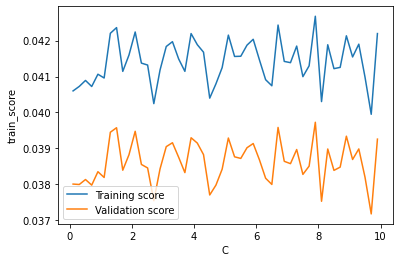

In [41]:
import seaborn as sns
sns.lineplot(x=scores["C"], y=scores["train_score"].astype(float), label="Training score")
sns.lineplot(x=scores["C"], y=scores["test_score"].astype(float), label="Validation score")

In [42]:
scores.at[np.argmax(scores["test_score"]),"C"]

7.900000000000001

In [43]:
from sklearn.svm import LinearSVR

svr_reg = LinearSVR(C=7.9,
                   verbose=3,
                   max_iter=100000)

%time svr_reg.fit(X_train, y_train)
print("training score: " + str(svr_reg.score(X_train, y_train)))
print("test score: " + str(svr_reg.score(X_test, y_test)))

[LibLinear]CPU times: user 1min 3s, sys: 76.8 ms, total: 1min 3s
Wall time: 1min 3s
training score: 0.04171660016097456
test score: 0.03887757006990511


In [45]:
from sklearn.metrics import mean_squared_error
print("Train RMSE: " + str(mean_squared_error(y_train, svr_reg.predict(X_train), squared=False)))
print("Test RMSE: " + str(mean_squared_error(y_test, svr_reg.predict(X_test), squared=False)))

Train RMSE: 0.8694376973383362
Test RMSE: 0.8685940892457251


In [54]:
import datetime as datetime

X_submit = pd.read_csv("input/test.csv").drop(columns=["id"])
X_submit_pre = preprocessor.transform(X_submit)
y_submit = svr_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/svr_{name_add}.csv", index=False)

## Linear Multiple Regression

In [67]:
from sklearn.linear_model import Ridge

# define model with alpha=1
ridge_reg = Ridge(alpha=1.0)

# fit ridge model
ridge_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
print("Train RMSE: " + str(mean_squared_error(y_train, ridge_reg.predict(X_train), squared=False)))
print("Test RMSE: " + str(mean_squared_error(y_test, ridge_reg.predict(X_test), squared=False)))

Train RMSE: 0.8639340882756152
Test RMSE: 0.8630792322218237


In [69]:
from sklearn.linear_model import Ridge

# define model with alpha=1
ridge_reg = Ridge(alpha=1000)

# fit ridge model
ridge_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
print("Train RMSE: " + str(mean_squared_error(y_train, ridge_reg.predict(X_train), squared=False)))
print("Test RMSE: " + str(mean_squared_error(y_test, ridge_reg.predict(X_test), squared=False)))

Train RMSE: 0.864075194064811
Test RMSE: 0.8630676822186554


In [63]:
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

scores = pd.DataFrame(columns=["alphas", "train_RMSE", "test_RMSE"])

i = 0

alphas = np.arange(0.1,200,1)

for alpha in alphas:
    
    print(alpha)
    
    ridge_reg = Ridge(alpha=alpha)
    %time ridge_reg.fit(X_train, y_train)
    
    
    scores.at[i, "alphas"] = alpha
    scores.at[i, "train_RMSE"] = mean_squared_error(y_train, ridge_reg.predict(X_train), squared=False)
    scores.at[i, "test_RMSE"] = mean_squared_error(y_test, ridge_reg.predict(X_test), squared=False)
    
    i=i+1

scores

0.1
CPU times: user 166 ms, sys: 7.8 ms, total: 174 ms
Wall time: 74 ms
1.1
CPU times: user 415 ms, sys: 8.91 ms, total: 423 ms
Wall time: 70.7 ms
2.1
CPU times: user 413 ms, sys: 9.39 ms, total: 422 ms
Wall time: 70.3 ms
3.1
CPU times: user 410 ms, sys: 9.79 ms, total: 420 ms
Wall time: 70 ms
4.1
CPU times: user 417 ms, sys: 9.69 ms, total: 426 ms
Wall time: 71.1 ms
5.1
CPU times: user 411 ms, sys: 10.1 ms, total: 421 ms
Wall time: 70.2 ms
6.1
CPU times: user 445 ms, sys: 11.2 ms, total: 456 ms
Wall time: 76.2 ms
7.1
CPU times: user 395 ms, sys: 8.38 ms, total: 404 ms
Wall time: 67.3 ms
8.1
CPU times: user 402 ms, sys: 9.67 ms, total: 411 ms
Wall time: 68.5 ms
9.1
CPU times: user 390 ms, sys: 8.2 ms, total: 399 ms
Wall time: 66.5 ms
10.1
CPU times: user 407 ms, sys: 9.47 ms, total: 417 ms
Wall time: 69.5 ms
11.1
CPU times: user 391 ms, sys: 9 ms, total: 400 ms
Wall time: 66.6 ms
12.1
CPU times: user 419 ms, sys: 10.6 ms, total: 430 ms
Wall time: 71.7 ms
13.1
CPU times: user 389 ms, sy

CPU times: user 452 ms, sys: 11.8 ms, total: 464 ms
Wall time: 77.3 ms
111.1
CPU times: user 395 ms, sys: 7.61 ms, total: 403 ms
Wall time: 67.2 ms
112.1
CPU times: user 384 ms, sys: 7.41 ms, total: 391 ms
Wall time: 65.2 ms
113.1
CPU times: user 452 ms, sys: 10.5 ms, total: 463 ms
Wall time: 77.2 ms
114.1
CPU times: user 391 ms, sys: 7.51 ms, total: 399 ms
Wall time: 66.5 ms
115.1
CPU times: user 394 ms, sys: 8.16 ms, total: 402 ms
Wall time: 67.1 ms
116.1
CPU times: user 429 ms, sys: 10.4 ms, total: 440 ms
Wall time: 73.4 ms
117.1
CPU times: user 395 ms, sys: 7.86 ms, total: 402 ms
Wall time: 67.1 ms
118.1
CPU times: user 388 ms, sys: 7.49 ms, total: 396 ms
Wall time: 66 ms
119.1
CPU times: user 428 ms, sys: 8.94 ms, total: 437 ms
Wall time: 72.9 ms
120.1
CPU times: user 398 ms, sys: 7.69 ms, total: 406 ms
Wall time: 67.6 ms
121.1
CPU times: user 388 ms, sys: 7.36 ms, total: 395 ms
Wall time: 65.9 ms
122.1
CPU times: user 445 ms, sys: 10.2 ms, total: 455 ms
Wall time: 75.9 ms
123.1
C

alphas train_RMSE test_RMSE
0      0.1   0.863933  0.863090
1      1.1   0.863934  0.863078
2      2.1   0.863936  0.863071
3      3.1   0.863937  0.863066
4      4.1   0.863938  0.863063
..     ...        ...       ...
195  195.1   0.863976  0.863027
196  196.1   0.863976  0.863027
197  197.1   0.863976  0.863027
198  198.1   0.863976  0.863027
199  199.1   0.863976  0.863027

[200 rows x 3 columns]

<AxesSubplot:xlabel='alphas', ylabel='train_RMSE'>

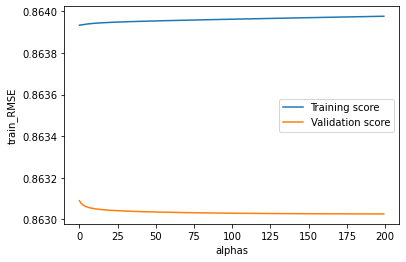

In [64]:
import seaborn as sns
sns.lineplot(x=scores["alphas"], y=scores["train_RMSE"].astype(float), label="Training score")
sns.lineplot(x=scores["alphas"], y=scores["test_RMSE"].astype(float), label="Validation score")

In [66]:
scores.at[np.argmin(scores["test_RMSE"]),"alphas"]

199.1

In [68]:
import datetime as datetime

X_submit = pd.read_csv("input/test.csv").drop(columns=["id"])
X_submit_pre = preprocessor.transform(X_submit)
y_submit = ridge_reg.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/ridge_reg_{name_add}.csv", index=False)

## Voting Models

In [88]:
# load models
import pickle

gbrt_tuned_2 = pickle.load(open(r"output/gbrt_tuned_2_date_2021-2-19_time_20-27.sav", 'rb'))

xgboost_tuned_3 = pickle.load(open(r"output/xgboost_tuned_3_date_2021-2-23_time_20-46.sav", 'rb'))

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)

from sklearn.svm import LinearSVR

svr_reg = LinearSVR(C=7.9, max_iter=100000)

svr_reg.fit(X_train, y_train)

[LibLinear]

LinearSVR(C=7.9, max_iter=100000, verbose=3)

In [89]:
from sklearn.ensemble import VotingRegressor
# Voting model
voting_model = VotingRegressor([('gbrt_tuned_2', gbrt_tuned_2), 
                                ('svr_reg', svr_reg),
                               ('ridge_reg', ridge_reg)])

voting_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
print("Train RMSE: " + str(mean_squared_error(y_train, voting_model.predict(X_train), squared=False)))
print("Test RMSE: " + str(mean_squared_error(y_test, voting_model.predict(X_test), squared=False)))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

      Iter       Train Loss   Remaining Time 
         1           0.7799            4.86m
         2           0.7748            4.83m
         3           0.7726            4.86m
         4           0.7701            5.20m
         5           0.7676            5.17m
         6           0.7653            5.18m
         7           0.7636            5.22m
         8           0.7617            5.16m
         9           0.7601            5.25m
        10           0.7585            5.23m
        20           0.7460            5.15m
        30           0.7397            5.03m
        40           0.7355            4.95m
        50           0.7327            4.88m
        60           0.7307            4.85m
        70           0.7291            4.79m
        80           0.7279            4.76m
        90           0.7268            4.69m
       100           0.7259            4.64m
       200           0.7205            4.25m
       300           0.7177            3.73m
       40

In [90]:
import datetime as datetime

X_submit = pd.read_csv("input/test.csv").drop(columns=["id"])
X_submit_pre = preprocessor.transform(X_submit)
y_submit = voting_model.predict(X_submit_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/voting_1_{name_add}.csv", index=False)